In [2]:

#AnomaData: Automated Anomaly Detection for Predictive Maintenance

In [92]:

#1. Introduction
#Predictive maintenance is crucial for various industries to minimize risks and enhance operational efficiency by predicting
#equipment failures and performing maintenance proactively. This project aims to develop a machine learning model to identify
#anomalies in the data, indicating potential machine breakdowns.

In [94]:
#The objective of this project is to develop an automated anomaly detection system for predictive maintenance. 
#The goal is to predict machine breakdowns by identifying anomalies in the provided dataset. This involves various tasks
#including data collection, exploratory data analysis, preprocessing, model selection, training, evaluation, hyperparameter 
#tuning, and deployment planning. The success metrics include achieving an accuracy of over 75% on the test dataset, 
#implementing hyperparameter tuning methods, performing model validation.

In [93]:
# 1 Importing libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [91]:
# Loading the dataset from the Excel file
df = pd.read_excel('AnomaData.xlsx')

In [4]:
#let's have a look to our data set and try to understand 
df

time  y        x1        x2        x3          x4  \
0     1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756   13.497687   
1     1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359   16.230659   
2     1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147   14.127997   
3     1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612   13.161566   
4     1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150   15.267340   
...                   ... ..       ...       ...       ...         ...   
18393 1999-05-28 23:58:00  0 -0.877441  0.786430  0.406426  135.301215   
18394 1999-05-29 00:00:00  0 -0.843988  0.633086  0.561918  133.228949   
18395 1999-05-29 00:02:00  0 -0.826547  0.450126  0.334582  134.977973   
18396 1999-05-29 00:04:00  0 -0.822843  0.419383  0.387263  135.658942   
18397 1999-05-29 00:06:00  0 -0.840981  0.582710  0.593416  136.339880   

             x5         x6        x7        x8  ...        x51        x52  \
0     -0.118830 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721   
1     -0.128733 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871   
2     -0.138636 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265   
3     -0.148142 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660   
4     -0.155314 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054   
...         ...        ...       ...       ...  ...        ...        ...   
18393  0.112295  26.300392 -0.159185  0.058823  ...  29.984624  -0.773514   
18394  0.141332  25.678597 -0.159185  0.058823  ...  29.984624  -0.773514   
18395  0.170370  25.056801 -0.159185  0.048752  ...  29.984624  -0.773514   
18396  0.199422  24.435005 -0.159185  0.048752  ...  29.984624  -0.773514   
18397  0.228460  24.712960 -0.159185  0.048752  ...  29.984624  -0.773514   

            x54        x55        x56       x57       x58       x59       x60  \
0     -4.936434 -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076   
1     -4.937179 -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083   
2     -4.937924 -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090   
3     -4.938669 -35.954281  21.672449  3.986095  0.033721  2.554880  0.006097   
4     -4.939414 -37.724789  21.907251  3.601573  0.033777  1.410494  0.006105   
...         ...        ...        ...       ...       ...       ...       ...   
18393  2.682413   6.944644 -37.795661 -0.860218  0.010220  0.895685 -0.011242   
18394  2.683338   0.507755 -39.357199 -0.915698  0.010620  0.175348 -0.011235   
18395  2.684263   2.809146 -39.357199 -1.409596  0.013323  0.621020 -0.011228   
18396  2.685189   2.164859 -39.357199 -0.860218  0.012888  1.390902 -0.011221   
18397  2.686114   1.416690 -39.357199 -0.732044  0.012453  0.418993 -0.011214   

       y.1  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
18393    0  
18394    0  
18395    0  
18396    0  
18397    0  

[18398 rows x 62 columns]

In [95]:
#Dataset
#The dataset consists of 18398 rows collected over several days. The column 'y' contains binary labels indicating anomalies
#(0 for anomaly, 1 for Non-anomaly). The remaining columns are predictors.The dataset appears to have 62 columns in total, 
#with 'y' being the primary target variable.

In [96]:
# Initial Inspection of the data

In [97]:
# Getting basic information about the dataset
(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [98]:
#Check for Duplicates 
df.duplicated().sum()

0

In [99]:
# Check for missing values
(df.isnull().sum())


time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [100]:
#summary statistics to understand the distribution of numerical features of the data set
(df.describe())


time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     -3.537054   -111.378372     -0.446787    -24.345268   
50%       -0.075505     -0.190683    -14.881585     -0.120745     10.528435   
75%        2.319297      3.421223     92.199134      0.325152     32.172974   
max       16.742105     15.900116    334.694098      4.239385     96.060768   
std        4.939762      5.937178    131.033712      0.634054     37.104012   

                 x7            x8  ...           x51           x52  \
count  18398.000000  18398.000000  ...  18398.000000  18398.000000   
mean       0.001647     -0.004125  ...     -3.357339      0.380519   
min       -0.429273     -0.451141  ...  -3652.989000   -187.943440   
25%       -0.058520     -0.051043  ...     29.984624     -3.672684   
50%       -0.009338     -0.000993  ...     29.984624      0.294846   
75%        0.060515      0.038986  ...     29.984624      5.109543   
max        1.705590      0.788826  ...     40.152348     14.180588   
std        0.108870      0.075460  ...    348.256716      6.211598   

                x54           x55           x56           x57           x58  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.173708      2.379154      9.234953      0.233493     -0.001861   
min       -8.210370   -230.574030   -269.039500    -12.640370     -0.149790   
25%        0.487780    -40.050046    -45.519149     -1.598804      0.000470   
50%        0.702299     17.471317      1.438806      0.085826      0.012888   
75%        2.675751     44.093387     63.209681      2.222118      0.020991   
max        6.637265    287.252017    252.147455      6.922008      0.067249   
std        3.029516     67.940694     81.274103      2.326838      0.048732   

                x59           x60           y.1  
count  18398.000000  18398.000000  18398.000000  
mean      -0.061522      0.001258      0.001033  
min     -100.810500     -0.012229      0.000000  
25%        0.295023     -0.001805      0.000000  
50%        0.734591      0.000710      0.000000  
75%        1.266506      0.004087      0.000000  
max        6.985460      0.020510      1.000000  
std       10.394085      0.004721      0.032120  

[8 rows x 62 columns]

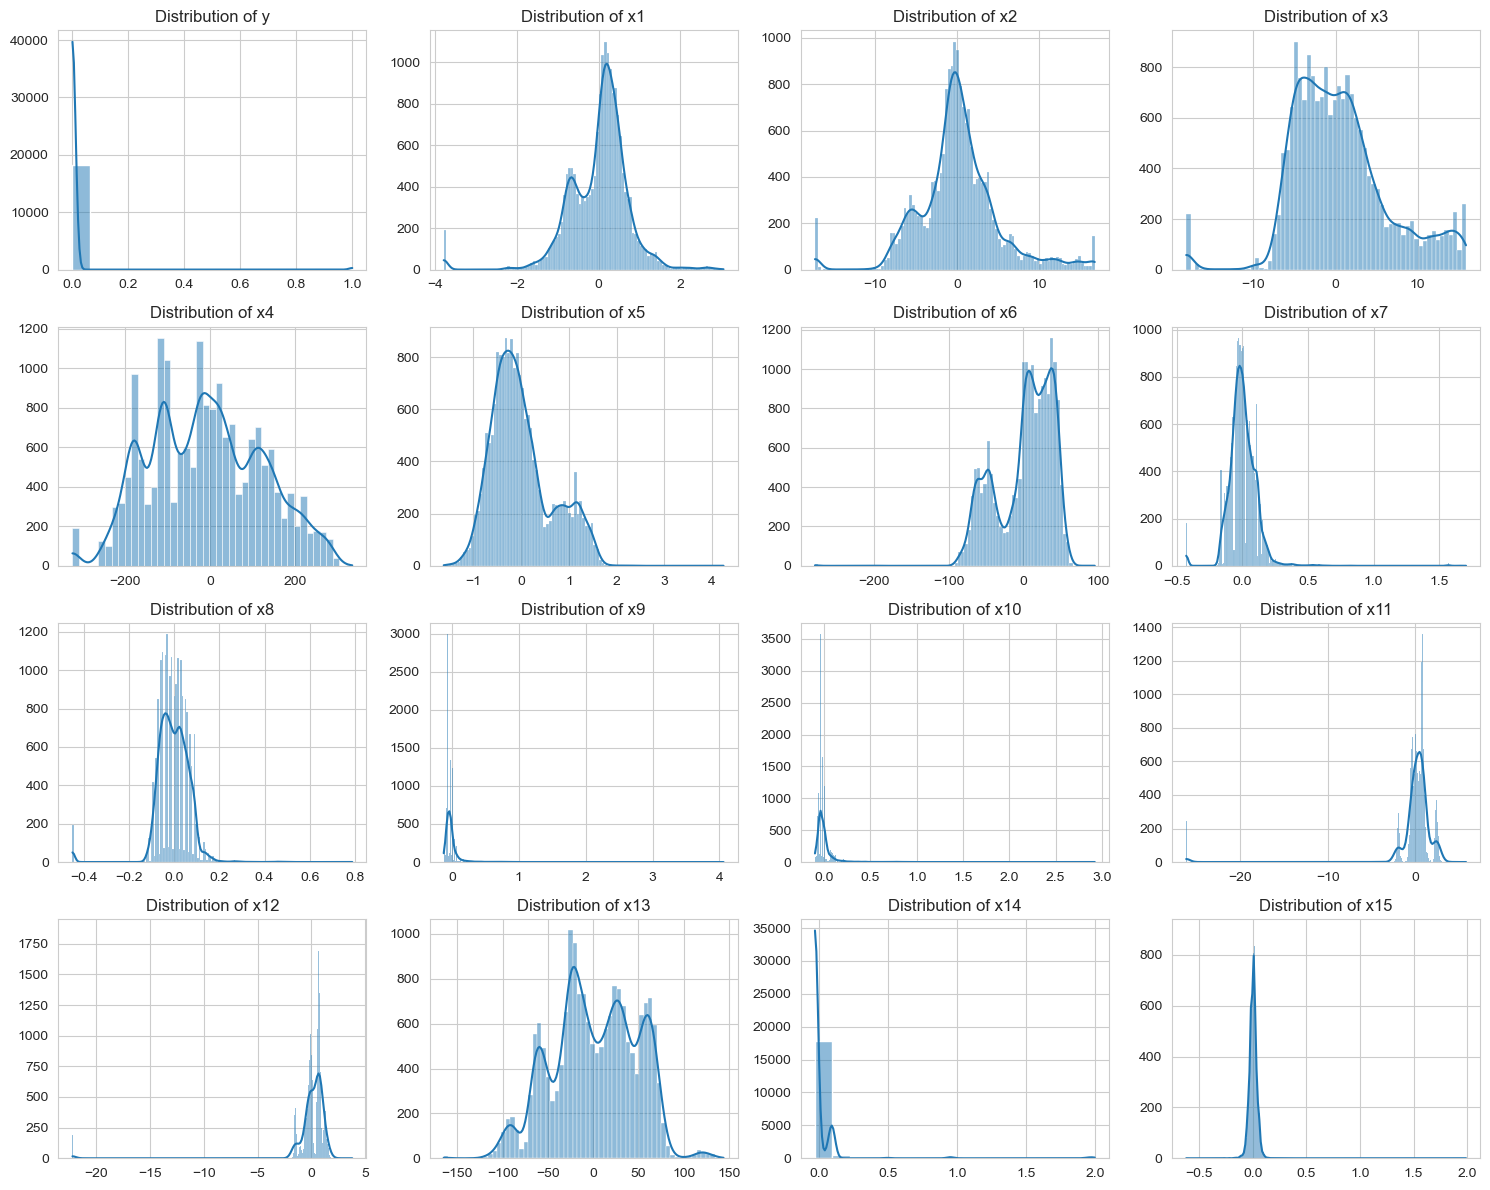

In [101]:
# Analyze and understand the data to identify patterns, relationships, and trends in the data by  Visualizations
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms and density plots for numerical features
plt.figure(figsize=(15, 12))
num_plots = min(len(numerical_features), 16)  
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1

for i, feature in enumerate(numerical_features[:num_plots]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


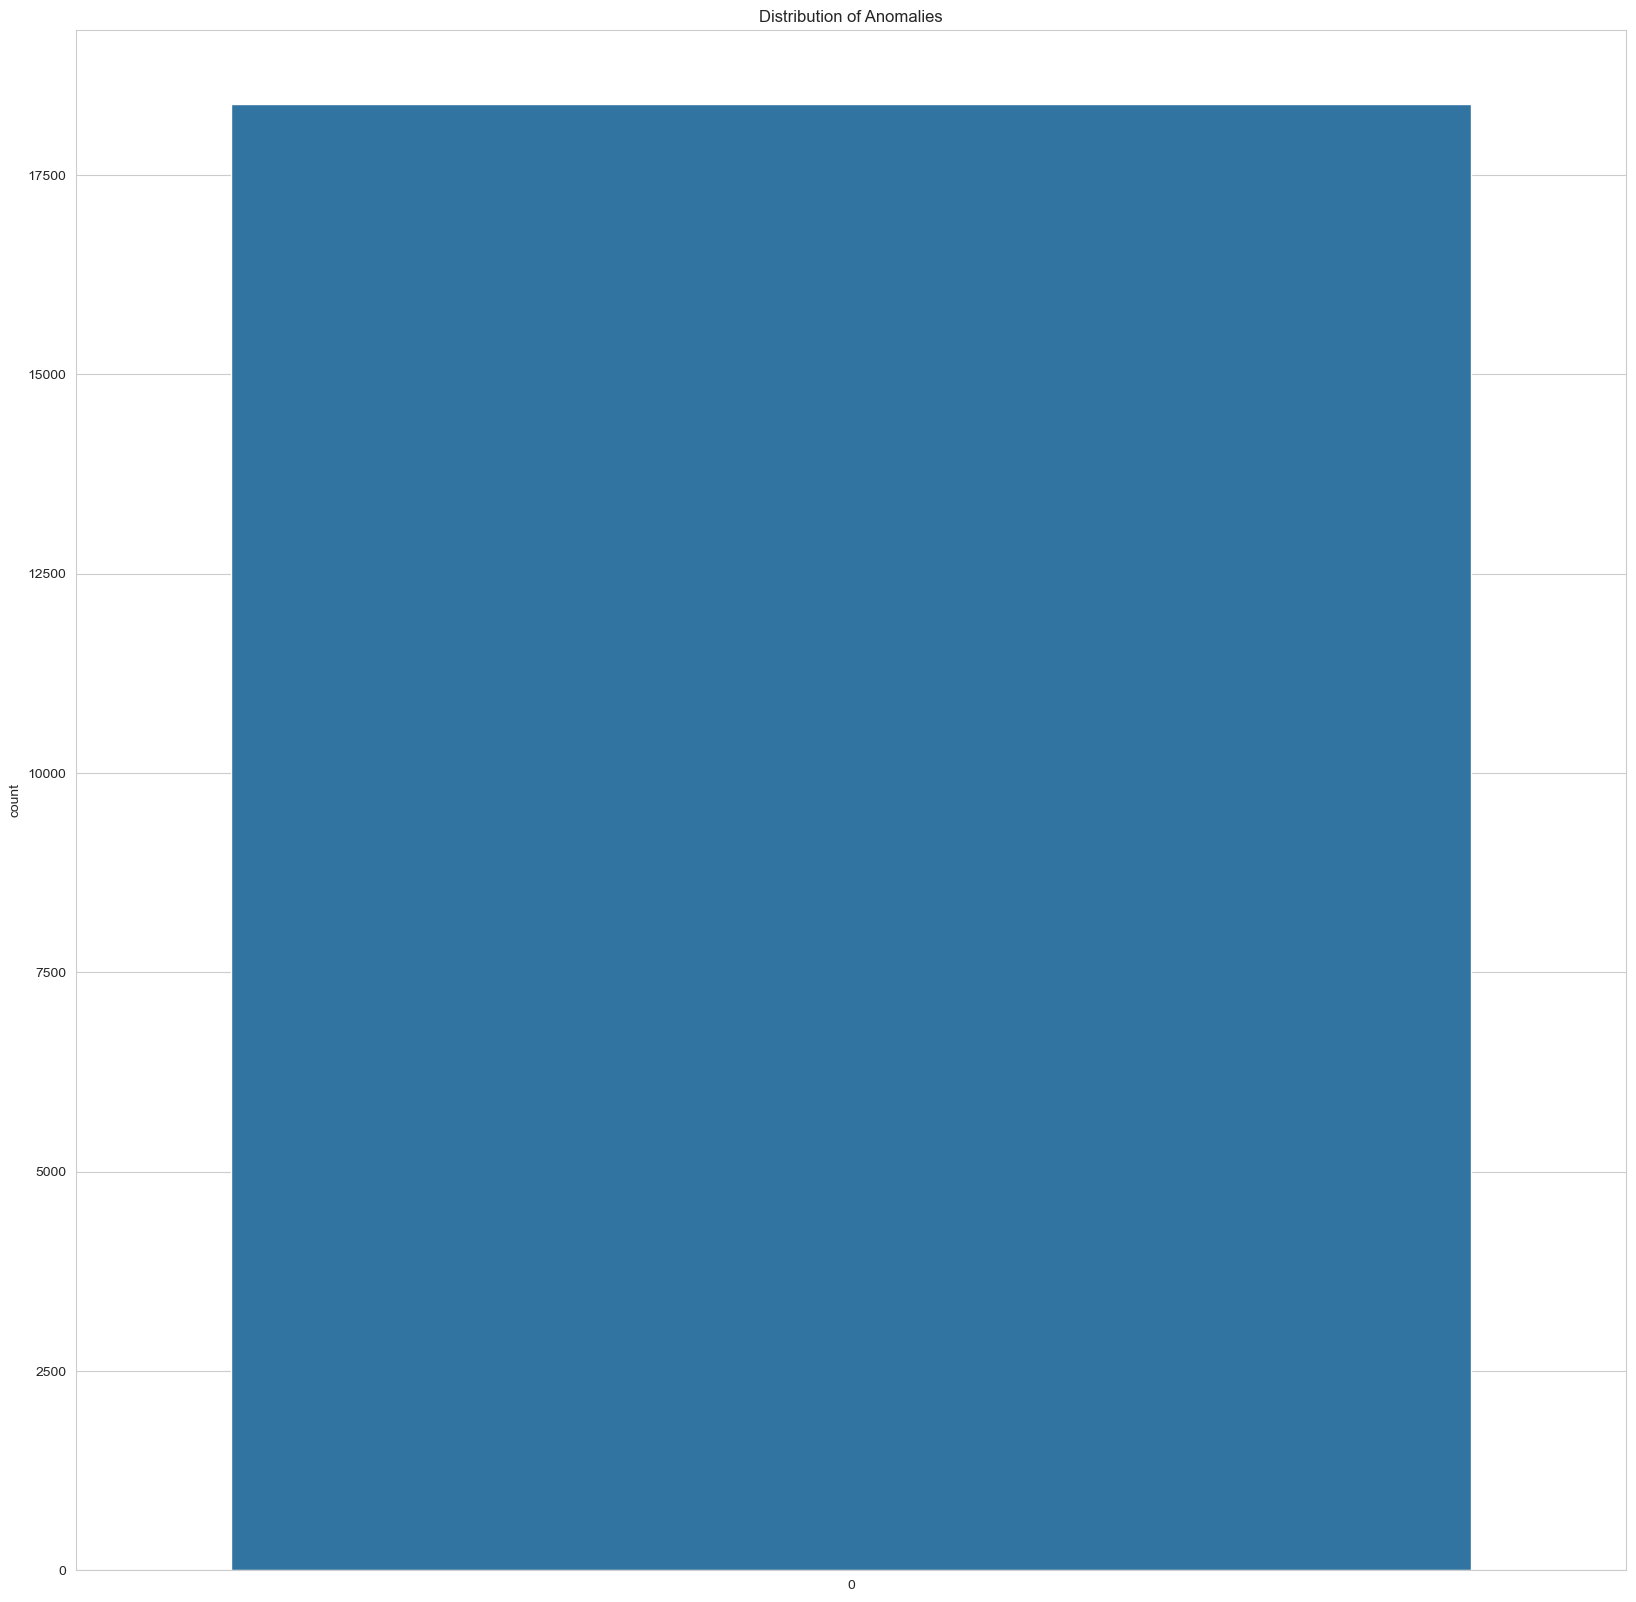

In [102]:
#We need to understand the distribution of the target variable 'y' to get an idea of the imbalance 
# Plot the distribution of the target variable
sns.countplot(df['y'])
plt.title('Distribution of Anomalies')
plt.show()


In [104]:
# Check the distribution of anomaly/non-anomaly related records
anomaly_distribution = df['y'].value_counts()
print("Anomaly distribution:")
print(anomaly_distribution)

Anomaly distribution:
y
0    18274
1      124
Name: count, dtype: int64


In [106]:

# Calculate the proportion of each class
anomaly_distribution = df['y'].value_counts(normalize=True)
print("Value Proportions:")
print(anomaly_distribution)

#value-Proportions: This variable stores the proportion of each class in the target variable 'y'.


Value Proportions:
y
0    0.99326
1    0.00674
Name: proportion, dtype: float64


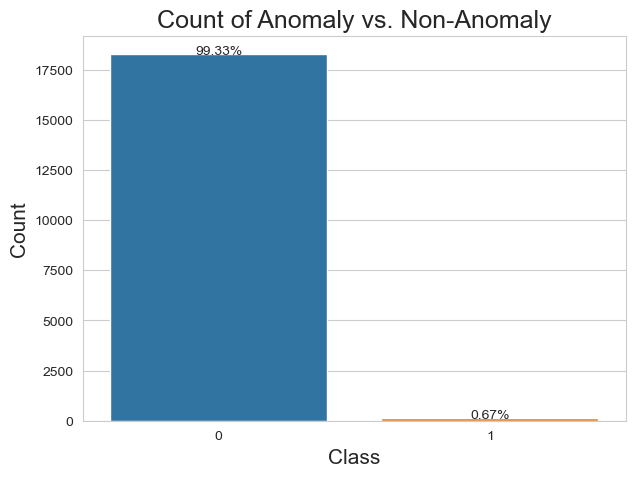

In [107]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df, x='y')
plt.title('Count of Anomaly vs. Non-Anomaly', fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Calculate percentages for each class
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

In [ ]:
#The value_counts and proportions we got indicates a highly imbalanced dataset, with 0 representing 99.326% and
#1 representing only 0.674% of the data. This significant imbalance will impact how we approach model training and evaluation.

In [108]:
#let's examine the data types to ensure that each column is appropriately typed, particularly focusing on converting any date 
#columns to datetime objects if necessary

In [109]:
# Display the data types of each column
df_types = df.dtypes
(df_types)

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

In [ ]:
#The data types look appropriate, with 'time' being a datetime object and the rest of the features being numerical 
#(either float64 or int64). The target variable 'y' is correctly identified as an integer. 

In [110]:
#let's Check the correlation to helps us understand the relationships between different features in the dataset
# let's Check the correlation
crr = df.corr()
crr


time         y        x1        x2        x3        x4        x5  \
time  1.000000  0.000741  0.094710  0.143395 -0.120243  0.425349  0.437453   
y     0.000741  1.000000  0.010227 -0.090961 -0.116369  0.016792 -0.006161   
x1    0.094710  0.010227  1.000000  0.137199 -0.057523  0.061614  0.046796   
x2    0.143395 -0.090961  0.137199  1.000000  0.180331 -0.137783  0.035360   
x3   -0.120243 -0.116369 -0.057523  0.180331  1.000000 -0.273556 -0.187914   
...        ...       ...       ...       ...       ...       ...       ...   
x57  -0.401512 -0.017802  0.323856  0.007790 -0.057484 -0.169534 -0.402099   
x58  -0.221929  0.005083  0.014921  0.214721 -0.406268 -0.110220  0.050484   
x59  -0.116790  0.009165  0.472180  0.341174  0.329741 -0.006763 -0.001526   
x60  -0.615400  0.016083 -0.114438 -0.129893  0.113311 -0.295451 -0.040054   
y.1  -0.001511  0.390321  0.004664 -0.061108 -0.059705 -0.007333  0.015751   

            x6        x7        x8  ...       x51       x52       x54  \
time  0.222518 -0.118227  0.325096  ... -0.088100 -0.334488  0.215450   
y    -0.033487  0.018346  0.002983  ...  0.007895 -0.041135 -0.041177   
x1   -0.120384  0.260254  0.337250  ...  0.487969  0.270655 -0.304403   
x2   -0.029706 -0.058053  0.383303  ...  0.337809  0.111428  0.213488   
x3    0.011737  0.277747  0.203604  ...  0.301978 -0.064739  0.514714   
...        ...       ...       ...  ...       ...       ...       ...   
x57  -0.011936  0.102372 -0.114469  ...  0.068072  0.847152 -0.334670   
x58  -0.204748 -0.323613 -0.133213  ... -0.025328  0.102886 -0.272504   
x59  -0.085573  0.377601  0.565666  ...  0.924882  0.068729 -0.057957   
x60  -0.332208  0.165239 -0.135426  ...  0.082093  0.049387 -0.106632   
y.1  -0.036955  0.032053  0.022360  ...  0.003081 -0.063746 -0.018056   

           x55       x56       x57       x58       x59       x60       y.1  
time  0.320491 -0.265503 -0.401512 -0.221929 -0.116790 -0.615400 -0.001511  
y    -0.013450 -0.024917 -0.017802  0.005083  0.009165  0.016083  0.390321  
x1    0.037154  0.089789  0.323856  0.014921  0.472180 -0.114438  0.004664  
x2    0.300021  0.157117  0.007790  0.214721  0.341174 -0.129893 -0.061108  
x3   -0.015091 -0.014670 -0.057484 -0.406268  0.329741  0.113311 -0.059705  
...        ...       ...       ...       ...       ...       ...       ...  
x57   0.194131  0.406422  1.000000  0.014729  0.073985  0.106532 -0.013197  
x58  -0.106123  0.149248  0.014729  1.000000 -0.010551  0.108695 -0.018811  
x59  -0.041676 -0.024358  0.073985 -0.010551  1.000000  0.101891  0.004727  
x60  -0.182684 -0.107046  0.106532  0.108695  0.101891  1.000000  0.012547  
y.1   0.002049 -0.026440 -0.013197 -0.018811  0.004727  0.012547  1.000000  

[62 rows x 62 columns]

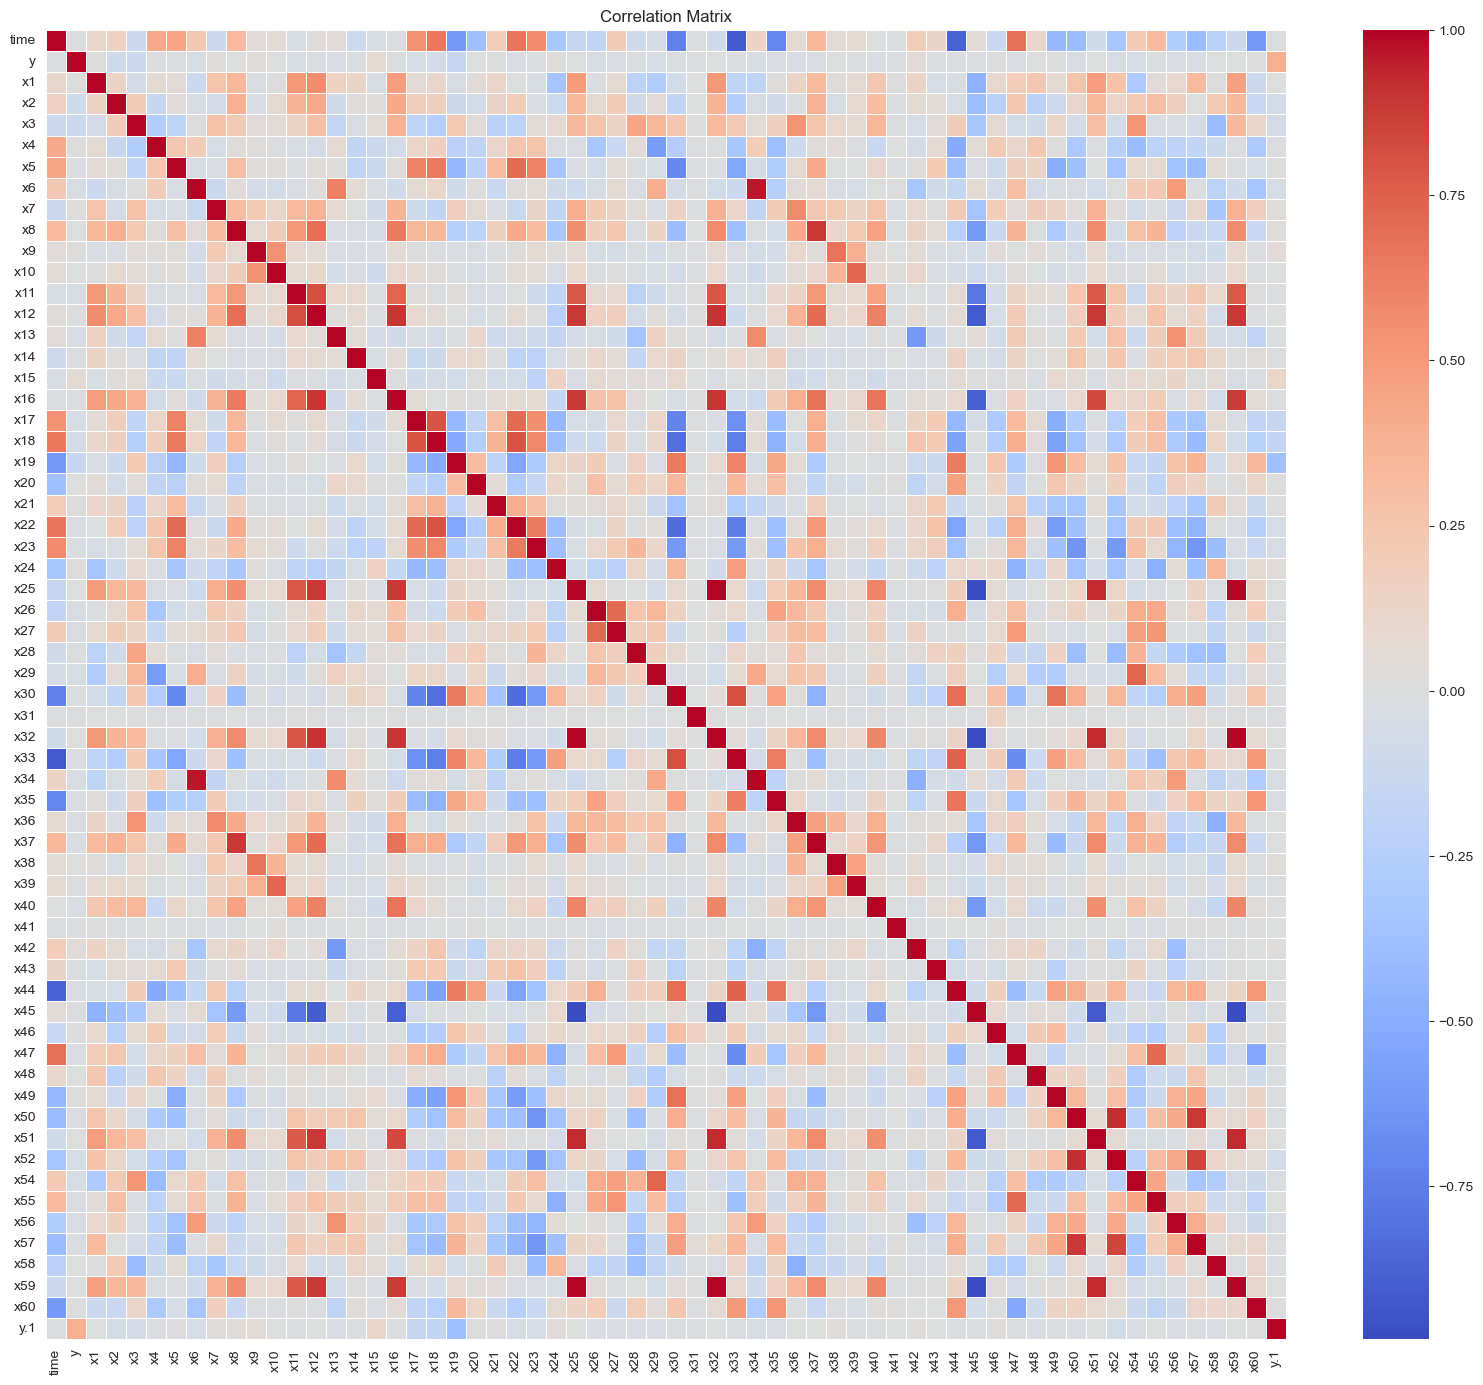

In [111]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [112]:
#This information can be useful for feature selection or understanding which features have the highest influence on 
#the target variable.

In [113]:
# Compute the correlation matrix
correlation_matrix = df.corr()

In [114]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Highlighting the correlation with the target variable 'y'
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
print("nCorrelation with Target Variable 'y':")
print(correlation_with_target)


nCorrelation with Target Variable 'y':
y      1.000000
y.1    0.390321
x15    0.058647
x42    0.034149
x9     0.024217
         ...   
x17   -0.043873
x18   -0.056908
x2    -0.090961
x3    -0.116369
x19   -0.140868
Name: y, Length: 62, dtype: float64


In [115]:
#let's try to identify which features are most strongly correlated with the target variable' y'.
print("Most important features relative to target variable y")

# Calculate correlation coefficients
corr_initial = df.corr()['y']

# Convert series to DataFrame
corr_initial = pd.DataFrame(corr_initial)

# Rename the column label from 'y' to 'Correlation'
corr_initial.columns = ["Correlation"]

# Sort correlations in descending order
corr_initial_sorted = corr_initial.sort_values(by=['Correlation'], ascending=False)

# Display the top 5 features with highest correlation
print(corr_initial_sorted.head(5))
  

Most important features relative to target variable y
     Correlation
y       1.000000
y.1     0.390321
x15     0.058647
x42     0.034149
x9      0.024217


In [116]:
# Select features based on correlation with 'y'
selected_features = ['y','y.1','x15','x42','x9']


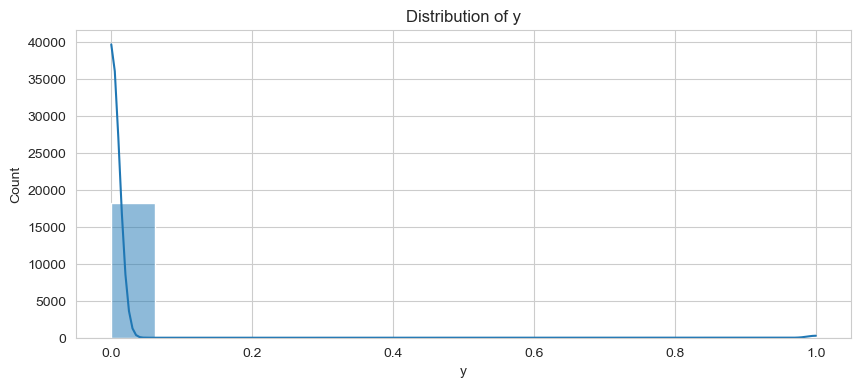

Numerical summary for y:
count    18398.000000
mean         0.006740
std          0.081822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64




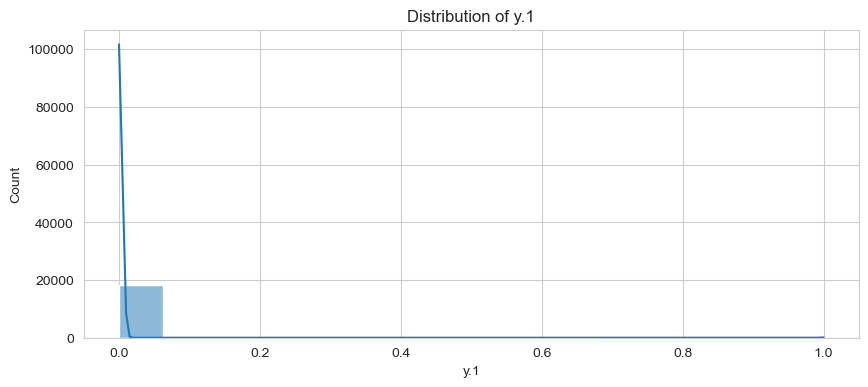

Numerical summary for y.1:
count    18398.000000
mean         0.001033
std          0.032120
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y.1, dtype: float64




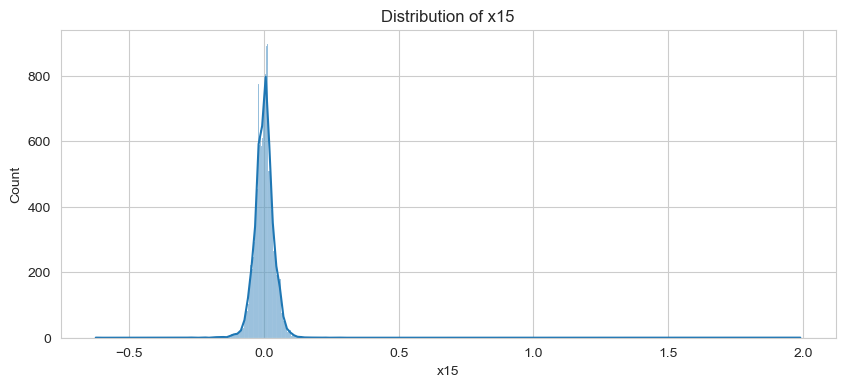

Numerical summary for x15:
count    18398.000000
mean         0.001107
std          0.039619
min         -0.623730
25%         -0.019850
50%          0.002187
75%          0.020421
max          1.990212
Name: x15, dtype: float64




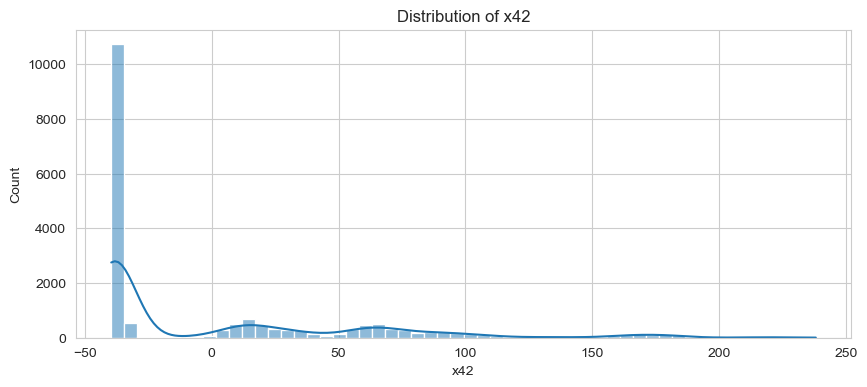

Numerical summary for x42:
count    18398.000000
mean         0.266766
std         57.751465
min        -39.592770
25%        -39.051126
50%        -36.681261
75%         29.102905
max        238.135654
Name: x42, dtype: float64




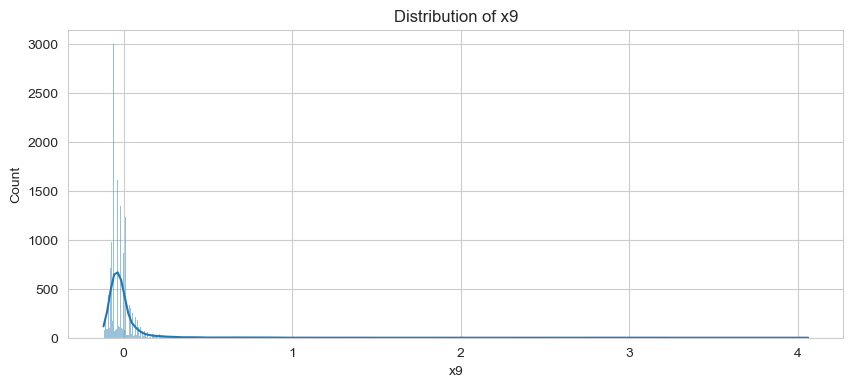

Numerical summary for x9:
count    18398.000000
mean        -0.003056
std          0.156047
min         -0.120087
25%         -0.059966
50%         -0.030057
75%          0.001990
max          4.060033
Name: x9, dtype: float64




In [117]:
# Plot histograms and show numerical summaries for selected features
for feature in selected_features:
    # Plot histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Print numerical summary
    print(f'Numerical summary for {feature}:')
    print(df[feature].describe())
    print('\n')


In [ ]:
#x15:This feature has a small positive correlation with the target variable y. The relationship is weak but positive.
#x42: Also positively correlated, though less strongly than x15.
#x19: Has the highest negative correlation, which can provide insight into features that might inversely affect the target
# y: The correlation of the target variable with itself is always 1, as expected.
#y.1 : Has the highest positive correlation with y,so it might be interesting to see its distribution.



In [118]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation with the target variable 'y'
correlation_with_y = correlation_matrix['y']

# Display the correlation values
print(correlation_with_y)

time    0.000741
y       1.000000
x1      0.010227
x2     -0.090961
x3     -0.116369
          ...   
x57    -0.017802
x58     0.005083
x59     0.009165
x60     0.016083
y.1     0.390321
Name: y, Length: 62, dtype: float64


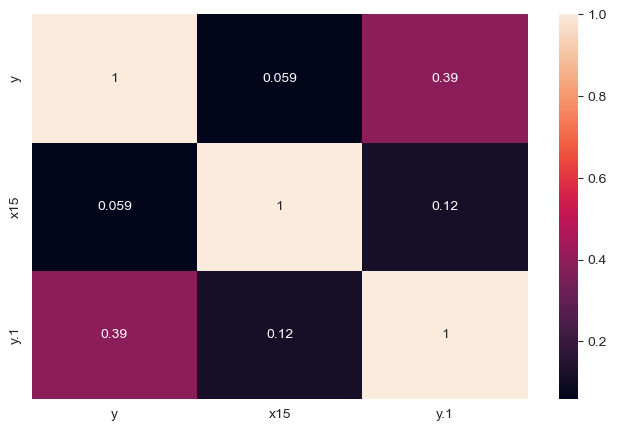

In [138]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.05) with the target variable:
crr = df.corr()
top_feature = crr.index[abs(crr['y'] > 0.05)]

plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [120]:
# Sort the correlation values by absolute value in descending order
sorted_correlation_with_y = correlation_with_y.abs().sort_values(ascending=False)

# Display the sorted correlation values
print(sorted_correlation_with_y)

y       1.000000
y.1     0.390321
x19     0.140868
x3      0.116369
x2      0.090961
          ...   
x39     0.002476
x16     0.001329
x30     0.001254
time    0.000741
x28     0.000092
Name: y, Length: 62, dtype: float64


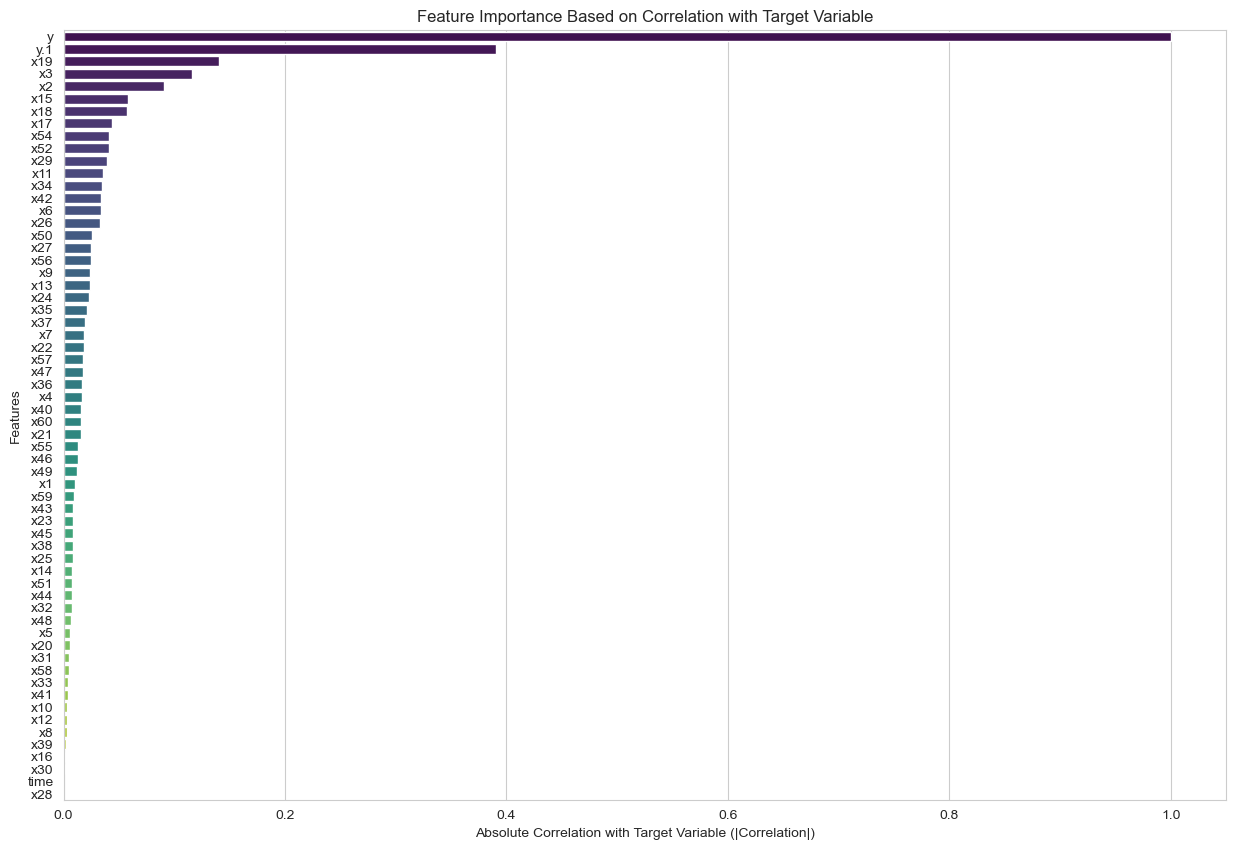

In [121]:
# Sort the correlation values by absolute value in descending order
sorted_correlation_with_y = correlation_with_y.abs().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_correlation_with_y.values, y=sorted_correlation_with_y.index, palette='viridis')
plt.xlabel('Absolute Correlation with Target Variable (|Correlation|)')
plt.ylabel('Features')
plt.title('Feature Importance Based on Correlation with Target Variable')
plt.show()


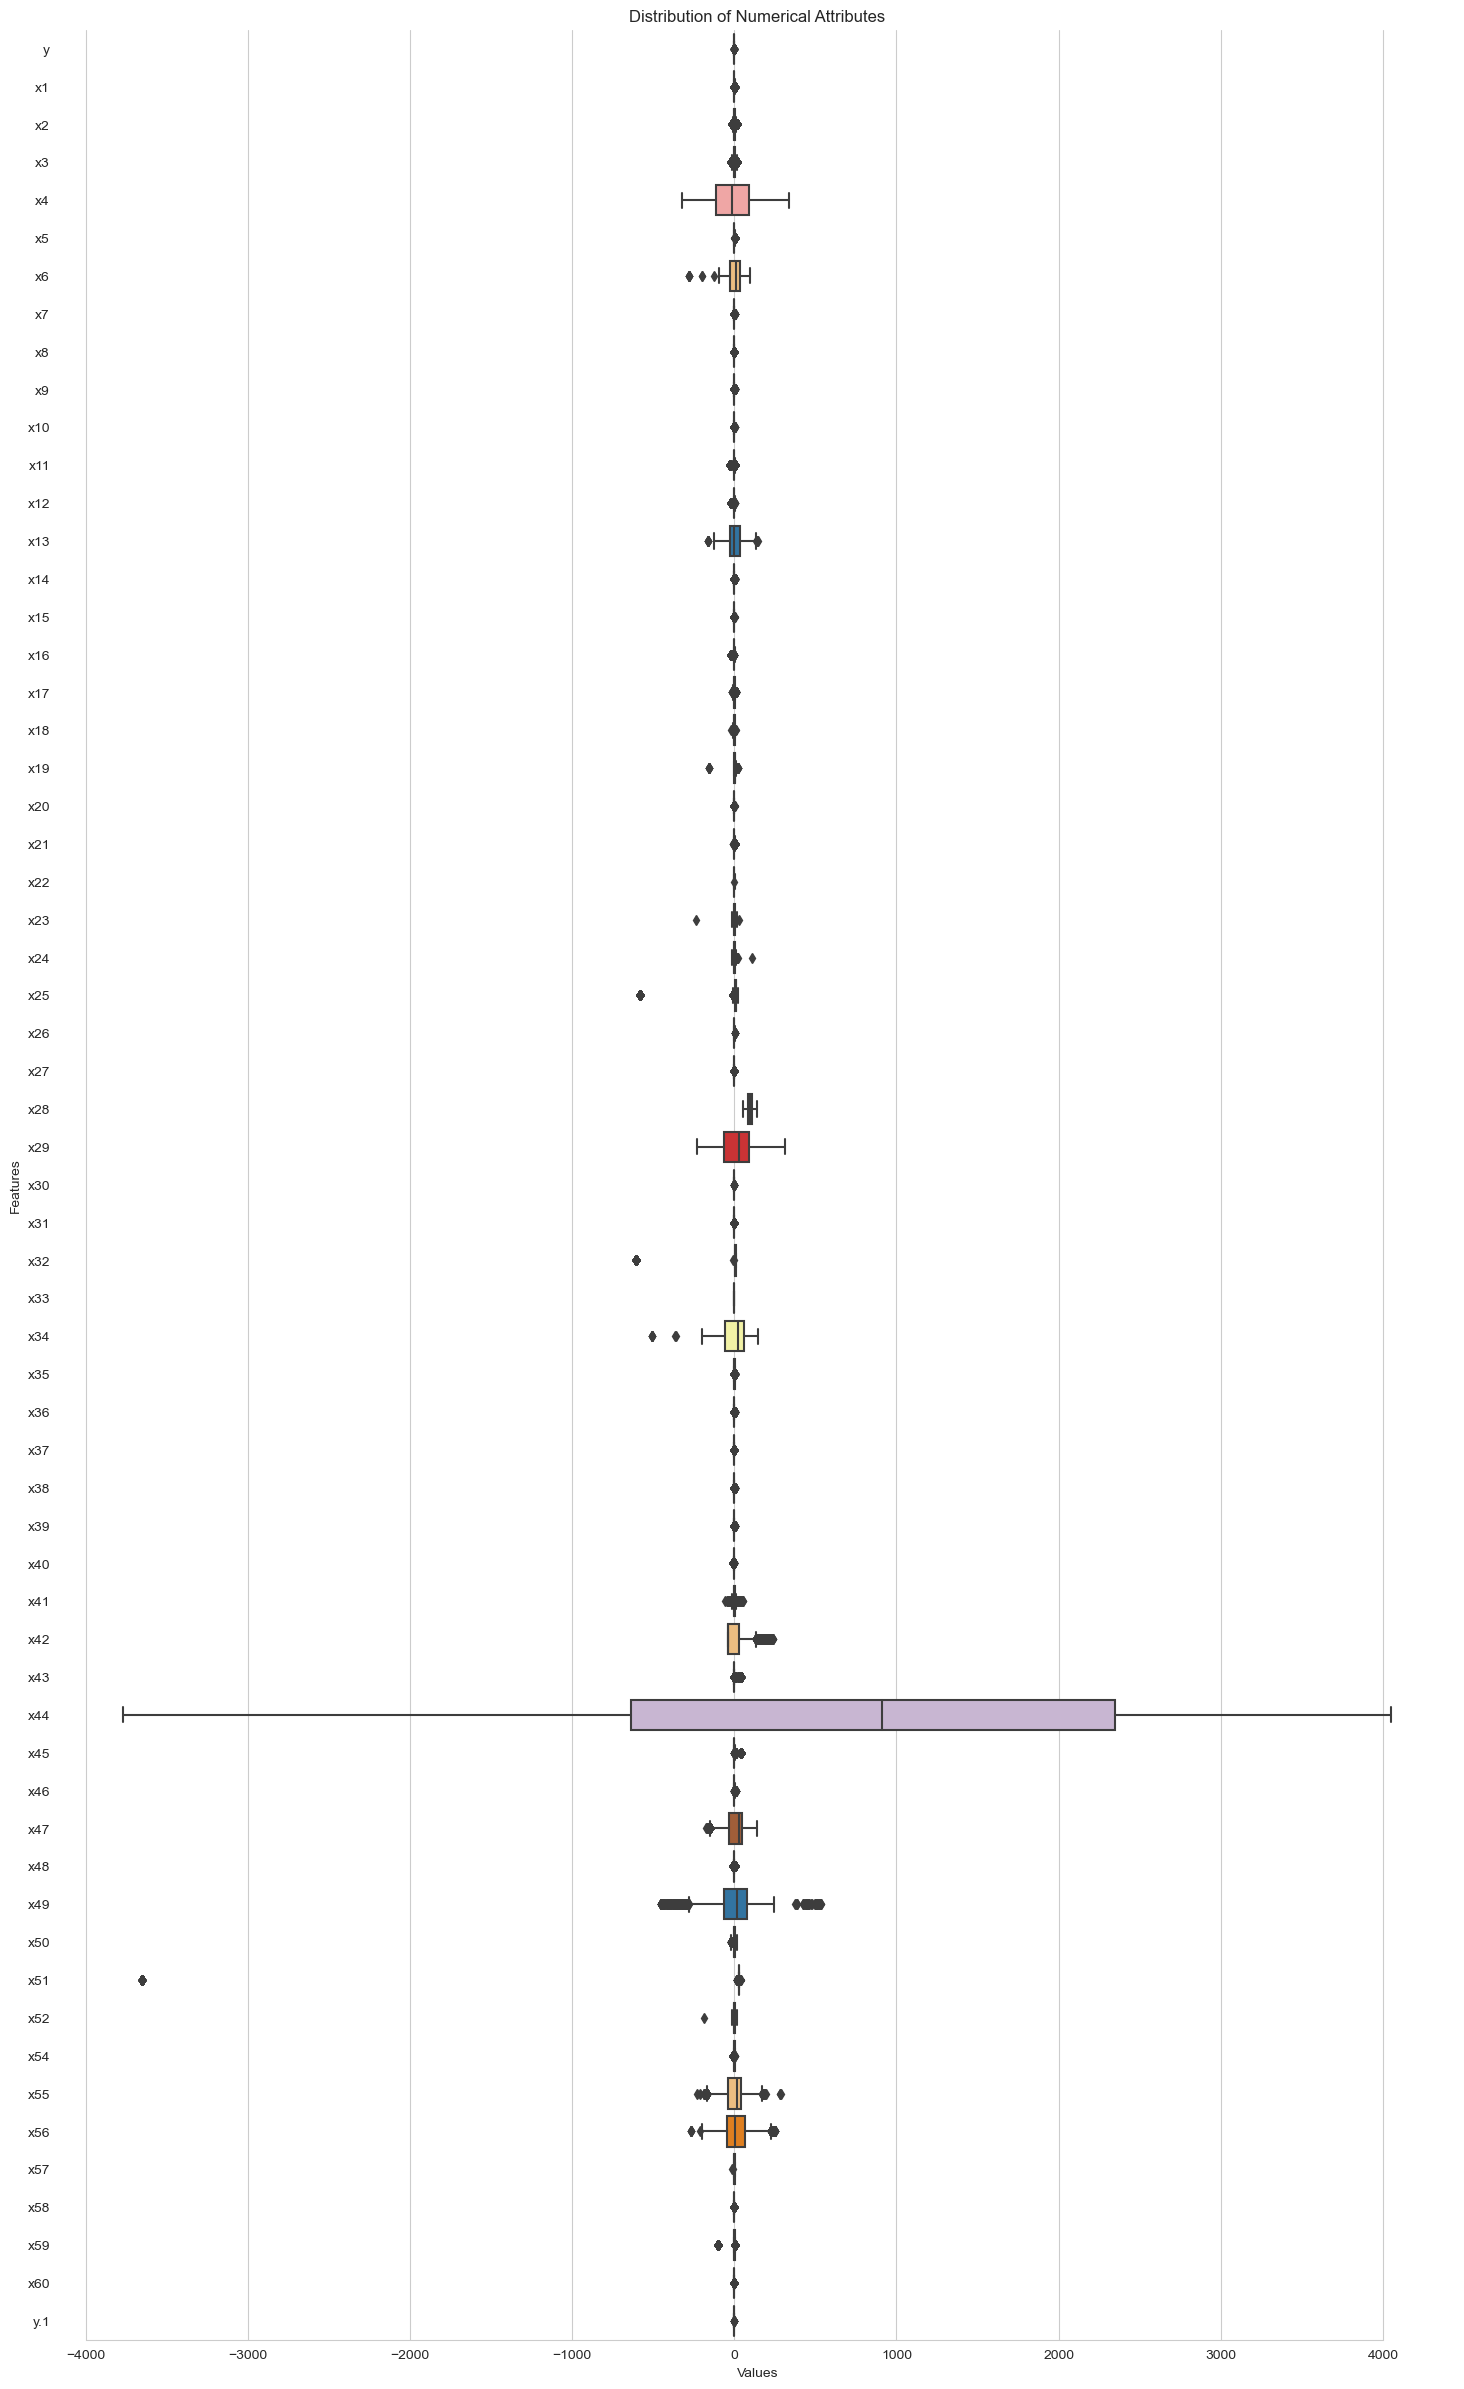

In [122]:
# Selecting only numerical features from the dataframe
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Plotting the boxplot
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 30))

# Using boxplot to visualize the distribution of numerical features
ax = sns.boxplot(data=df[numeric_features], orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of Numerical Attributes")
sns.despine(trim=True, left=True)

plt.show()

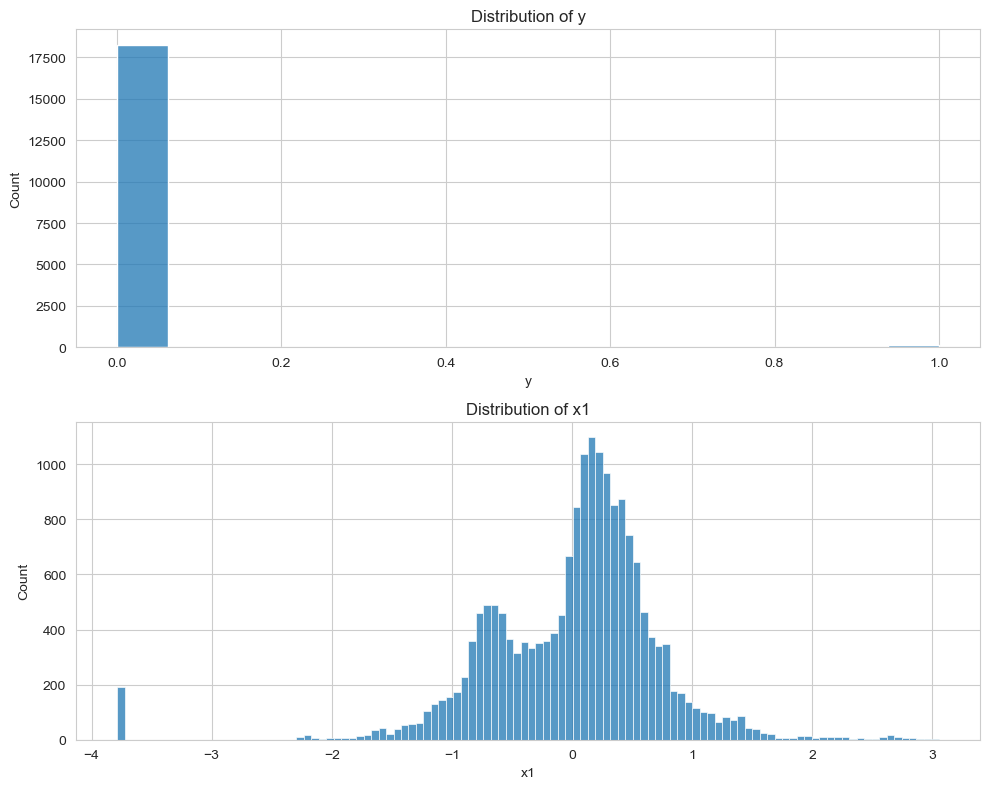

In [123]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Distribution of numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature, ax in zip(num_features, axes.flatten()):
    sns.histplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


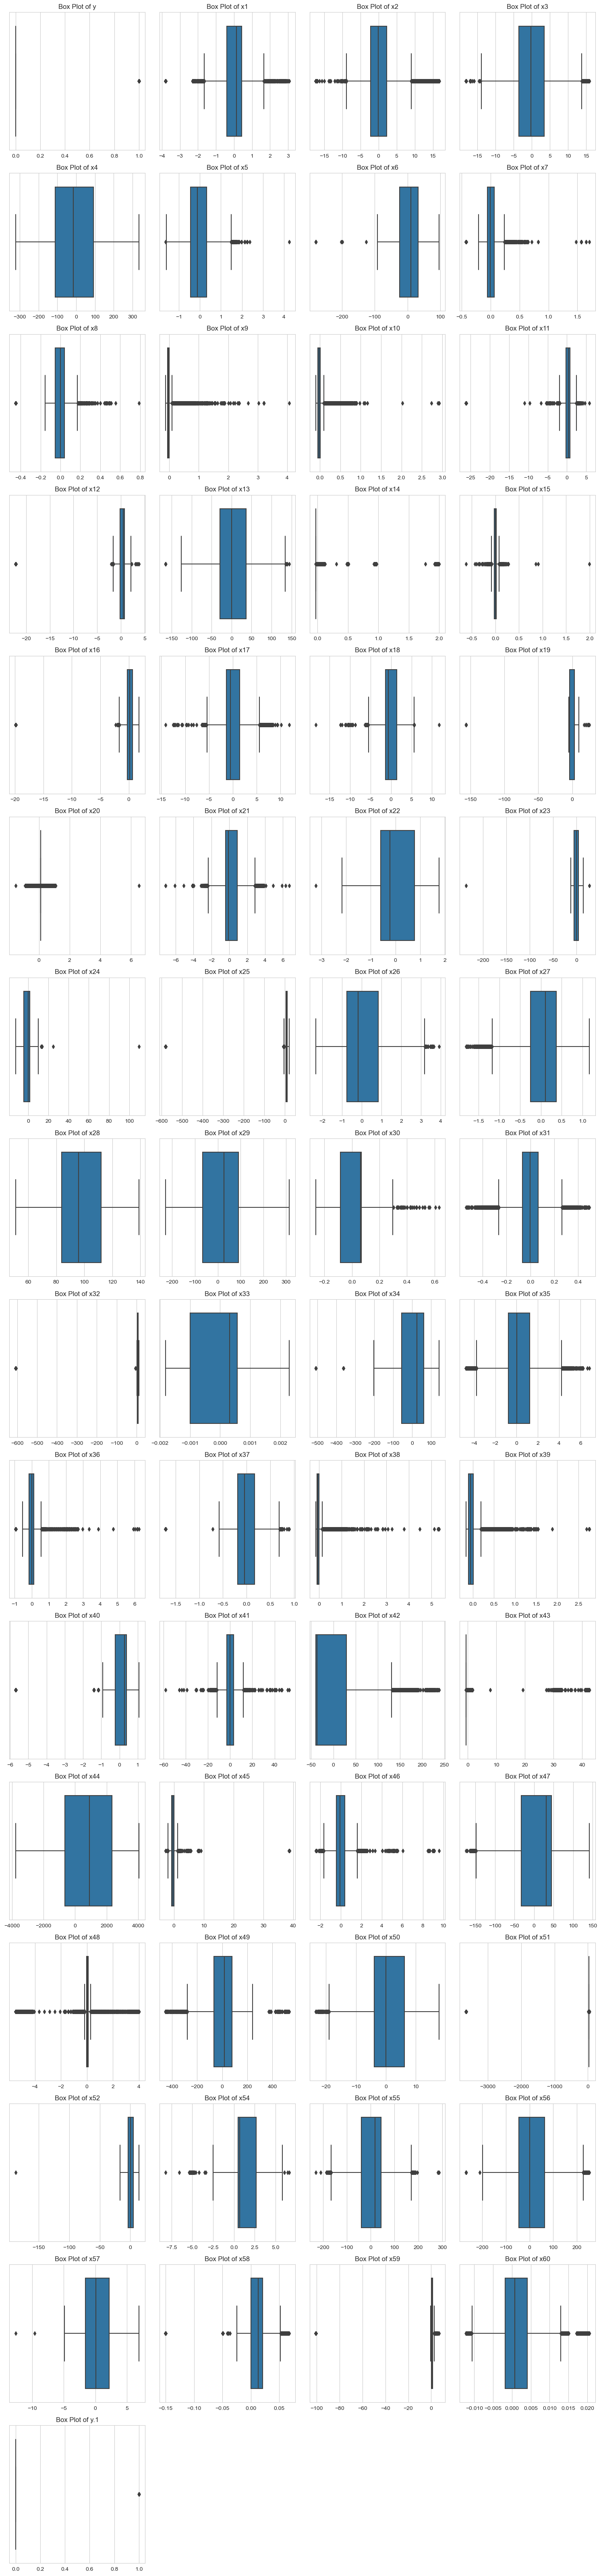

In [124]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Set up the figure and axes dynamically
num_features = len(numerical_features.columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Visualize distributions of numerical features
plt.figure(figsize=(15, 4 * num_rows))
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=numerical_features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [125]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns like 'time' and 'y'
numerical_features = numerical_columns.drop(['y'])

# Calculate skewness for numerical features
skewness = df[numerical_features].skew()

# Display skewness for each feature
print(skewness)


x1     -1.247727
x2      0.246201
x3      0.405579
x4      0.125157
x5      0.683805
x6     -0.778422
x7      2.435930
x8     -1.602778
x9      9.013223
x10     8.944292
x11    -7.186179
x12    -8.361979
x13    -0.123806
x14    10.143996
x15     7.491856
x16    -7.890303
x17     0.876826
x18     0.619385
x19   -14.644107
x20    -1.203704
x21     0.255382
x22     0.580391
x23    -3.142078
x24     0.554978
x25    -9.499579
x26     0.706270
x27    -1.097334
x28     0.869126
x29    -0.314435
x30    -0.384328
x31    -0.063506
x32    -9.616123
x33     0.274189
x34    -0.742769
x35    -0.053339
x36     4.797030
x37    -2.020053
x38     9.852337
x39     3.771112
x40    -4.413802
x41     0.294298
x42     1.512382
x43     7.523149
x44    -0.751970
x45     9.146000
x46     2.085610
x47    -0.977718
x48    -1.809828
x49    -0.413468
x50     0.239725
x51   -10.385342
x52    -1.307843
x54    -0.931539
x55    -0.460709
x56     0.525338
x57     0.203035
x58    -2.460320
x59    -9.499936
x60     0.4793

In [126]:
right_skewed = skewness[skewness > 1]
left_skewed = skewness[skewness < -1]
symmetric = skewness[(skewness >= -1) & (skewness <= 1)]

print("Right Skewed:")
print(right_skewed)
print("\nLeft Skewed:")
print(left_skewed)
print("\nSymmetric:")
print(symmetric)


Right Skewed:
x7      2.435930
x9      9.013223
x10     8.944292
x14    10.143996
x15     7.491856
x36     4.797030
x38     9.852337
x39     3.771112
x42     1.512382
x43     7.523149
x45     9.146000
x46     2.085610
y.1    31.072082
dtype: float64

Left Skewed:
x1     -1.247727
x8     -1.602778
x11    -7.186179
x12    -8.361979
x16    -7.890303
x19   -14.644107
x20    -1.203704
x23    -3.142078
x25    -9.499579
x27    -1.097334
x32    -9.616123
x37    -2.020053
x40    -4.413802
x48    -1.809828
x51   -10.385342
x52    -1.307843
x58    -2.460320
x59    -9.499936
dtype: float64

Symmetric:
x2     0.246201
x3     0.405579
x4     0.125157
x5     0.683805
x6    -0.778422
x13   -0.123806
x17    0.876826
x18    0.619385
x21    0.255382
x22    0.580391
x24    0.554978
x26    0.706270
x28    0.869126
x29   -0.314435
x30   -0.384328
x31   -0.063506
x33    0.274189
x34   -0.742769
x35   -0.053339
x41    0.294298
x44   -0.751970
x47   -0.977718
x49   -0.413468
x50    0.239725
x54   -0.931539
x55

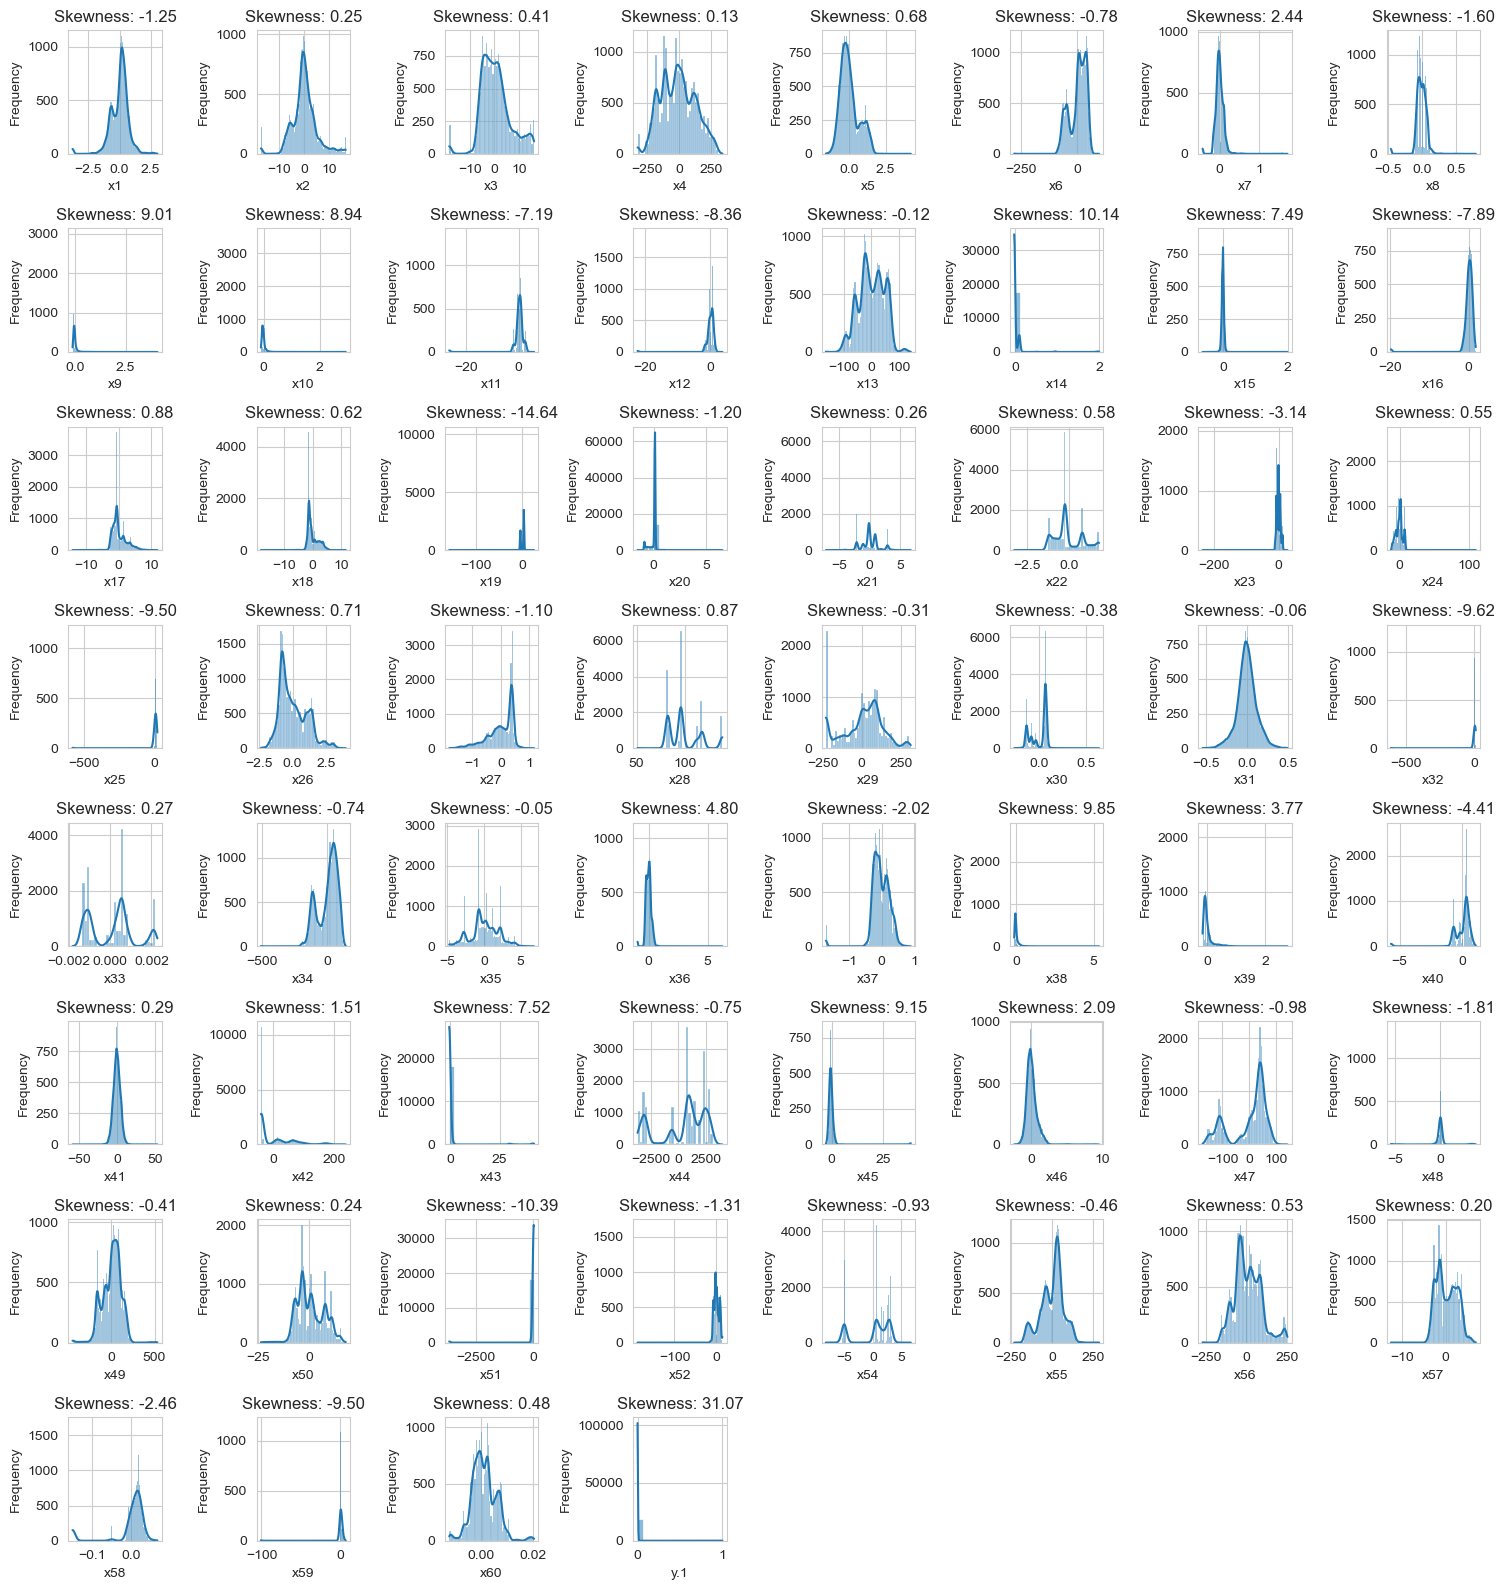

In [127]:
# Select numerical features
num_features = df.drop(columns=['y']).select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows and columns for subplots
num_rows = (len(num_features.columns) - 1) // 8 + 1
num_cols = min(len(num_features.columns), 8)

# Create subplots for each numerical feature
plt.figure(figsize=(15, 2 * num_rows))
for i, feature in enumerate(num_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Skewness: {df[feature].skew():.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [132]:

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate kurtosis for numerical features
kurtosis = df[numerical_columns].kurtosis()

# Display kurtosis for each feature
print(kurtosis)


y      143.417053
x1       6.358209
x2       2.552306
x3       0.887267
x4      -0.643818
          ...    
x57     -0.973837
x58      4.783323
x59     89.155091
x60      1.555564
y.1    963.579000
Length: 61, dtype: float64


In [133]:
# Categorize features based on kurtosis
normal_kurtosis = kurtosis[(kurtosis >= 2.7) & (kurtosis <= 3.3)]
heavy_tailed_kurtosis = kurtosis[kurtosis > 3.3]
light_tailed_kurtosis = kurtosis[kurtosis < 2.7]

# Print the categorized features
print("Features with distributions closer to normal (kurtosis close to 3):")
print(normal_kurtosis)
print("\nFeatures with leptokurtic distributions (kurtosis significantly greater than 3):")
print(heavy_tailed_kurtosis)
print("\nFeatures with platykurtic distributions (negative kurtosis values):")
print(light_tailed_kurtosis)


Features with distributions closer to normal (kurtosis close to 3):
Series([], dtype: float64)

Features with leptokurtic distributions (kurtosis significantly greater than 3):
y      143.417053
x1       6.358209
x7      37.359805
x8      13.365094
x9     131.176208
x10    170.569548
x11     55.715408
x12     75.227067
x14    113.513971
x15    378.583127
x16     65.826273
x19    462.518300
x20     14.258703
x23    134.169539
x24     15.250676
x25     89.123301
x32     90.608559
x36     91.533506
x37     12.045062
x38    181.114345
x39     26.349001
x40     23.040537
x41      7.878968
x43     55.898085
x45     84.526943
x46     16.243322
x48     14.464299
x51    105.867747
x52     44.955351
x58      4.783323
x59     89.155091
y.1    963.579000
dtype: float64

Features with platykurtic distributions (negative kurtosis values):
x2     2.552306
x3     0.887267
x4    -0.643818
x5    -0.116267
x6     0.507116
x13   -0.578824
x17    1.479544
x18    1.067933
x21    0.784122
x22   -0.522012
x26

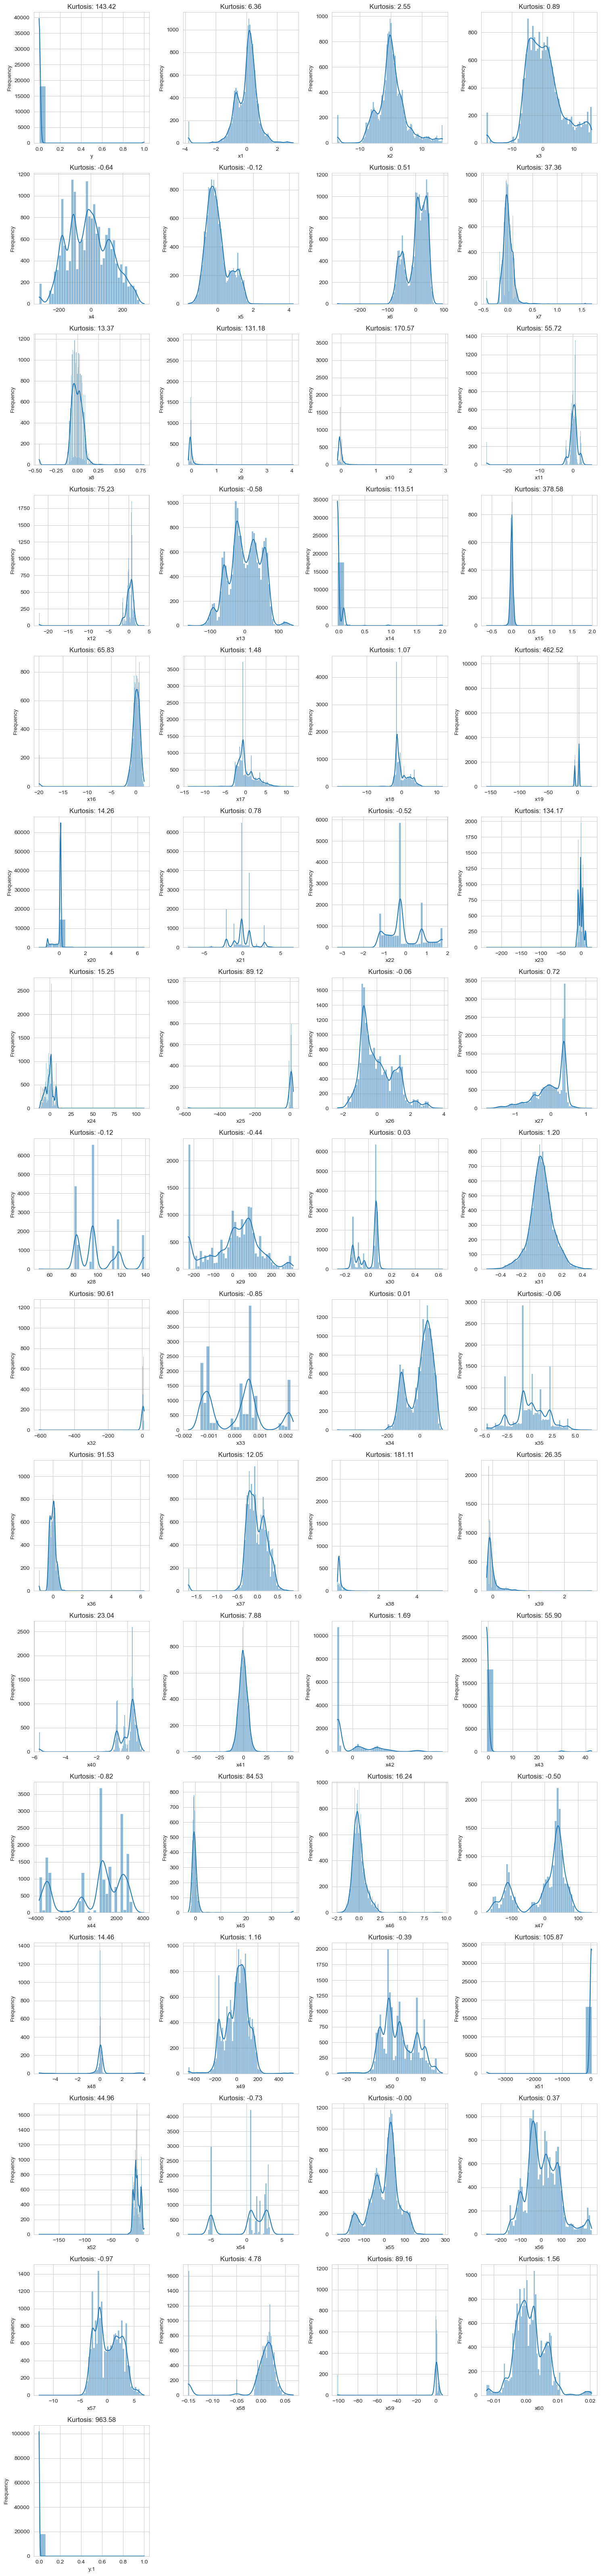

In [137]:

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate kurtosis for numerical features
kurtosis = df[numerical_columns].kurtosis()

# Define number of rows and columns for subplots
num_rows = (len(df[numerical_columns].columns) - 1) // 4 + 1
num_cols = min(len(df[numerical_columns].columns), 4)

# Create subplots for each numerical feature
plt.figure(figsize=(15, 4 * num_rows))
for i, feature in enumerate(df[numerical_columns].columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Kurtosis: {kurtosis[feature]:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Feature Engeneering on Time Column.

In [8]:
delta_time_seconds = (df['time'].diff() / pd.Timedelta(seconds=1)).fillna(0)


In [9]:
# Extracting day, minute, and hour components
df["Time_Day"] = df['time'].dt.day.astype(int)
df["Time_Min"] = df['time'].dt.minute.astype(int)
df["Time_Hour"] = df['time'].dt.hour.astype(int)


In [10]:
# Dropping the 'time' column
df.drop('time', axis=1, inplace=True)

# Dropping 'Time_Day' and 'Time_Min' columns
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True)


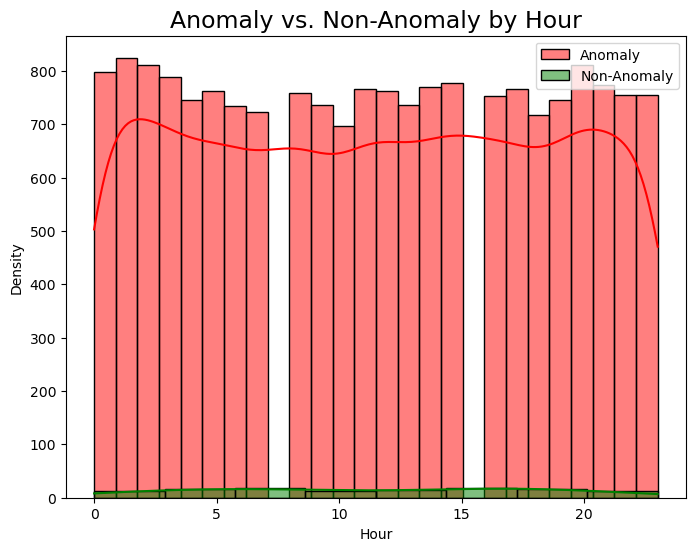

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df[df['y'] == 0]["Time_Hour"], color='red', label='Anomaly', kde=True)
sns.histplot(df[df['y'] == 1]["Time_Hour"], color='green', label='Non-Anomaly', kde=True)
plt.title('Anomaly vs. Non-Anomaly by Hour', fontsize=17)
plt.xlabel('Hour')
plt.ylabel('Density')
plt.legend()
plt.show()



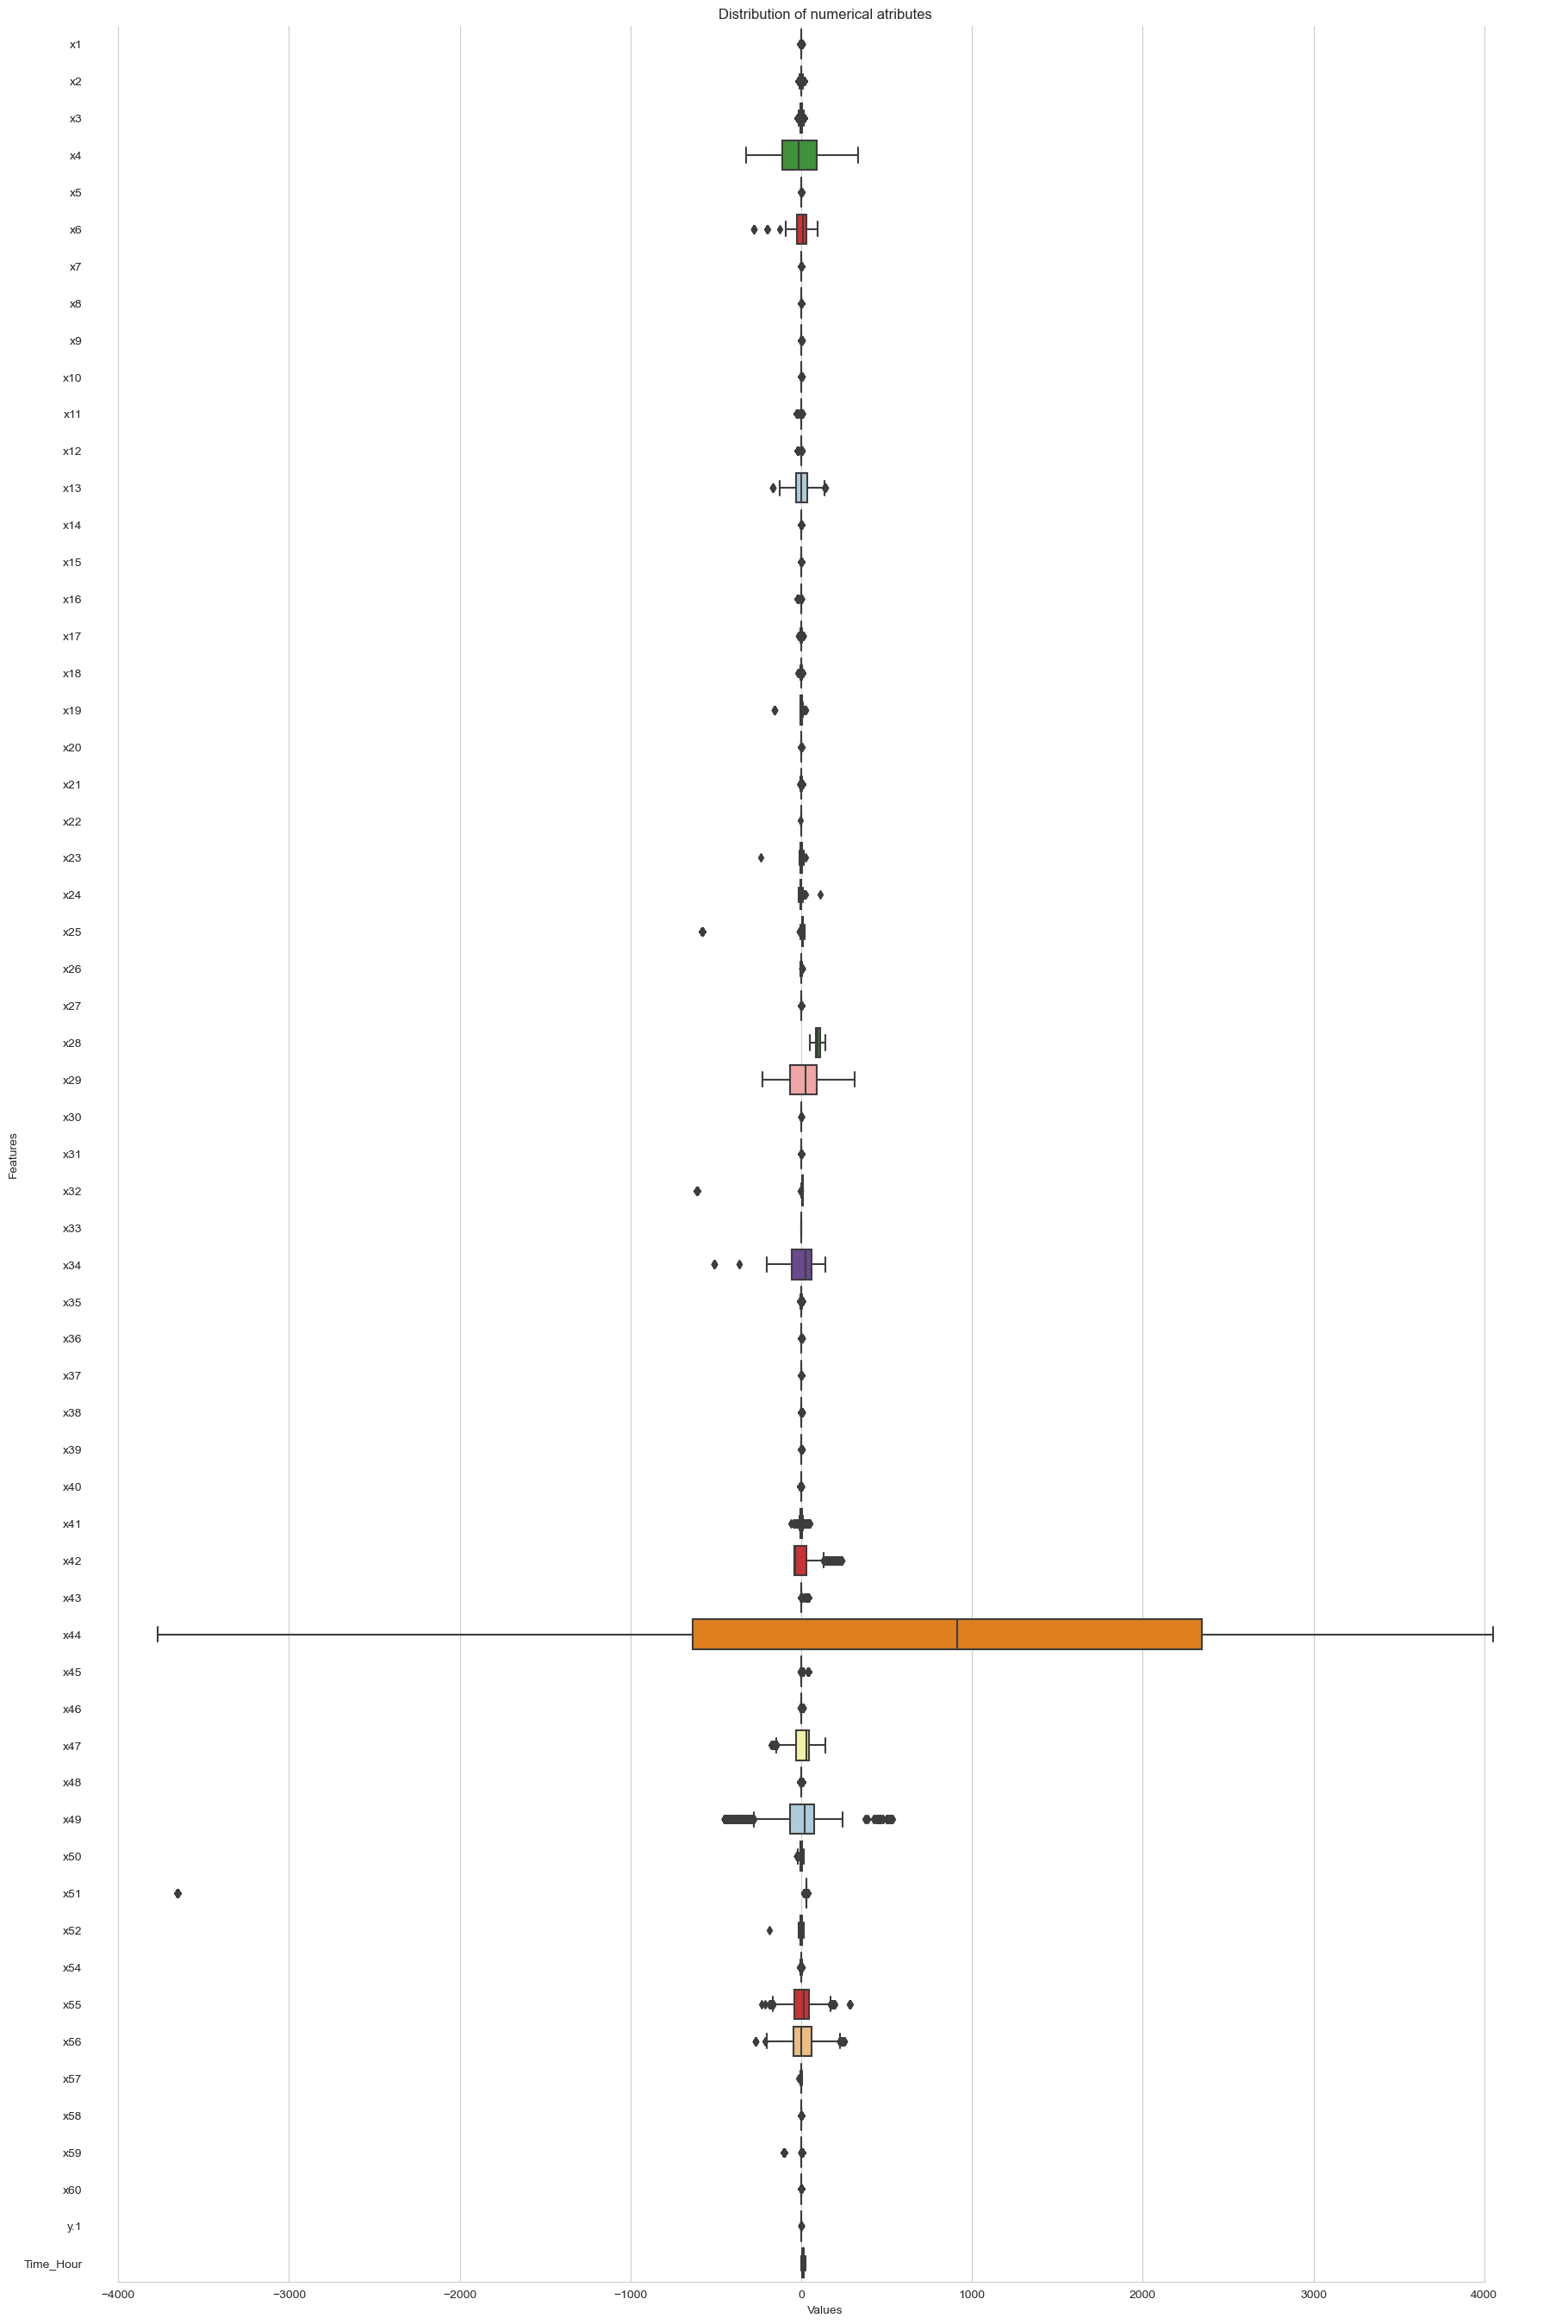

In [13]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['y','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [ ]:
 #Splitting data into Train and test data

In [28]:
# let's Preserve X_test & y_test to evaluate on the test data once we build the model.

In [14]:
# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])
print(type(df_Results))

<class 'pandas.core.frame.DataFrame'>


In [29]:
def Plot_confusion_matrix(y_test, pred_test):
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, pred_test)
    
    # Clearing any existing plot
    plt.clf()
    
    # Displaying the confusion matrix as an image with interpolation
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    
    # Defining class names for the labels
    classNames = ['Anomaly','Non-Anomaly']
    
    # Setting the title and axis labels for the plot
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Setting tick marks on the axes
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    
    # Annotating the plot with counts for true negatives, false positives, false negatives, and true positives
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12)
    
    # Displaying the plot
    plt.show()


In [30]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

    # Logistic Regression
    from sklearn import linear_model #import the package
    from sklearn.model_selection import KFold
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
 
    searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

    searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularizations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_) 
    print(searchCV_l2.scores_) 

    print("Parameters for l1 regularizations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_) 
    print(searchCV_l1.scores_) 

    # Find predicted values
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)

    # Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of Logistic model with l2 regularization: {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))
    print("Accuracy of Logistic model with l1 regularization: {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance, 'Model': 'Logistic Regression with L2 Regularisation', 'Accuracy': Accuracy_l2, 'roc_value': l2_roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance, 'Model': 'Logistic Regression with L1 Regularisation', 'Accuracy': Accuracy_l1, 'roc_value': l1_roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)
    
    return df_Results


In [31]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
    # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))
  
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
  
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    
    return df_Results


In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import check_array

def buildAndRunKNNModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Convert data to C-contiguous NumPy arrays
    X_train_array = check_array(X_train, ensure_2d=True, dtype=None, order='C')
    y_train_array = check_array(y_train, ensure_2d=False, dtype=None, order='C')
    X_test_array = check_array(X_test, ensure_2d=True, dtype=None, order='C')
    y_test_array = check_array(y_test, ensure_2d=False, dtype=None, order='C')
    
    # Create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train_array, y_train_array)
    
    # Calculate and print model score
    score = knn.score(X_test_array, y_test_array)
    print("Model score:", score)
    
    # Predict and evaluate the model
    y_pred = knn.predict(X_test_array)
    print("Confusion Matrix")
    # Assuming you have a function called Plot_confusion_matrix
    Plot_confusion_matrix(y_test_array, y_pred)
    print("Classification Report")
    print(classification_report(y_test_array, y_pred))
    
    knn_probs = knn.predict_proba(X_test_array)[:, 1]
    knn_roc_value = roc_auc_score(y_test_array, knn_probs)
    print("KNN roc_value:", knn_roc_value)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN MODEL','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def buildAndRunTreeModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    criteria = ['gini', 'entropy']
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        
        fpr, tpr, thresholds = roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree threshold: {0}".format(threshold))
        
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance, 'Model': 'TREE MODEL', 'Accuracy': test_score, 'roc_value': tree_roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)
    
    return df_Results


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def buildAndRunXGBoostModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # fit model on training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
  
    print("XGboost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'roc_value': XGB_roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def buildAndRunSVMModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("Accuracy score: {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier with probability estimates
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance, 'Model': 'SVM', 'Accuracy':  SVM_Score, 'roc_value': roc_value, 'threshold': threshold}, index=[0])], ignore_index=True)
    return df_Results


In [35]:
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (y)
X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we can  proceed with the PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)


In [24]:

df = df.drop(columns=['y.1'])

In [25]:
# Extract column names from the original DataFrame
cols = df.columns.tolist()

# Create DataFrames from transformed data
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)


C:\Users\ambuj\AppData\Local\Temp\ipykernel_9088\3720874435.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


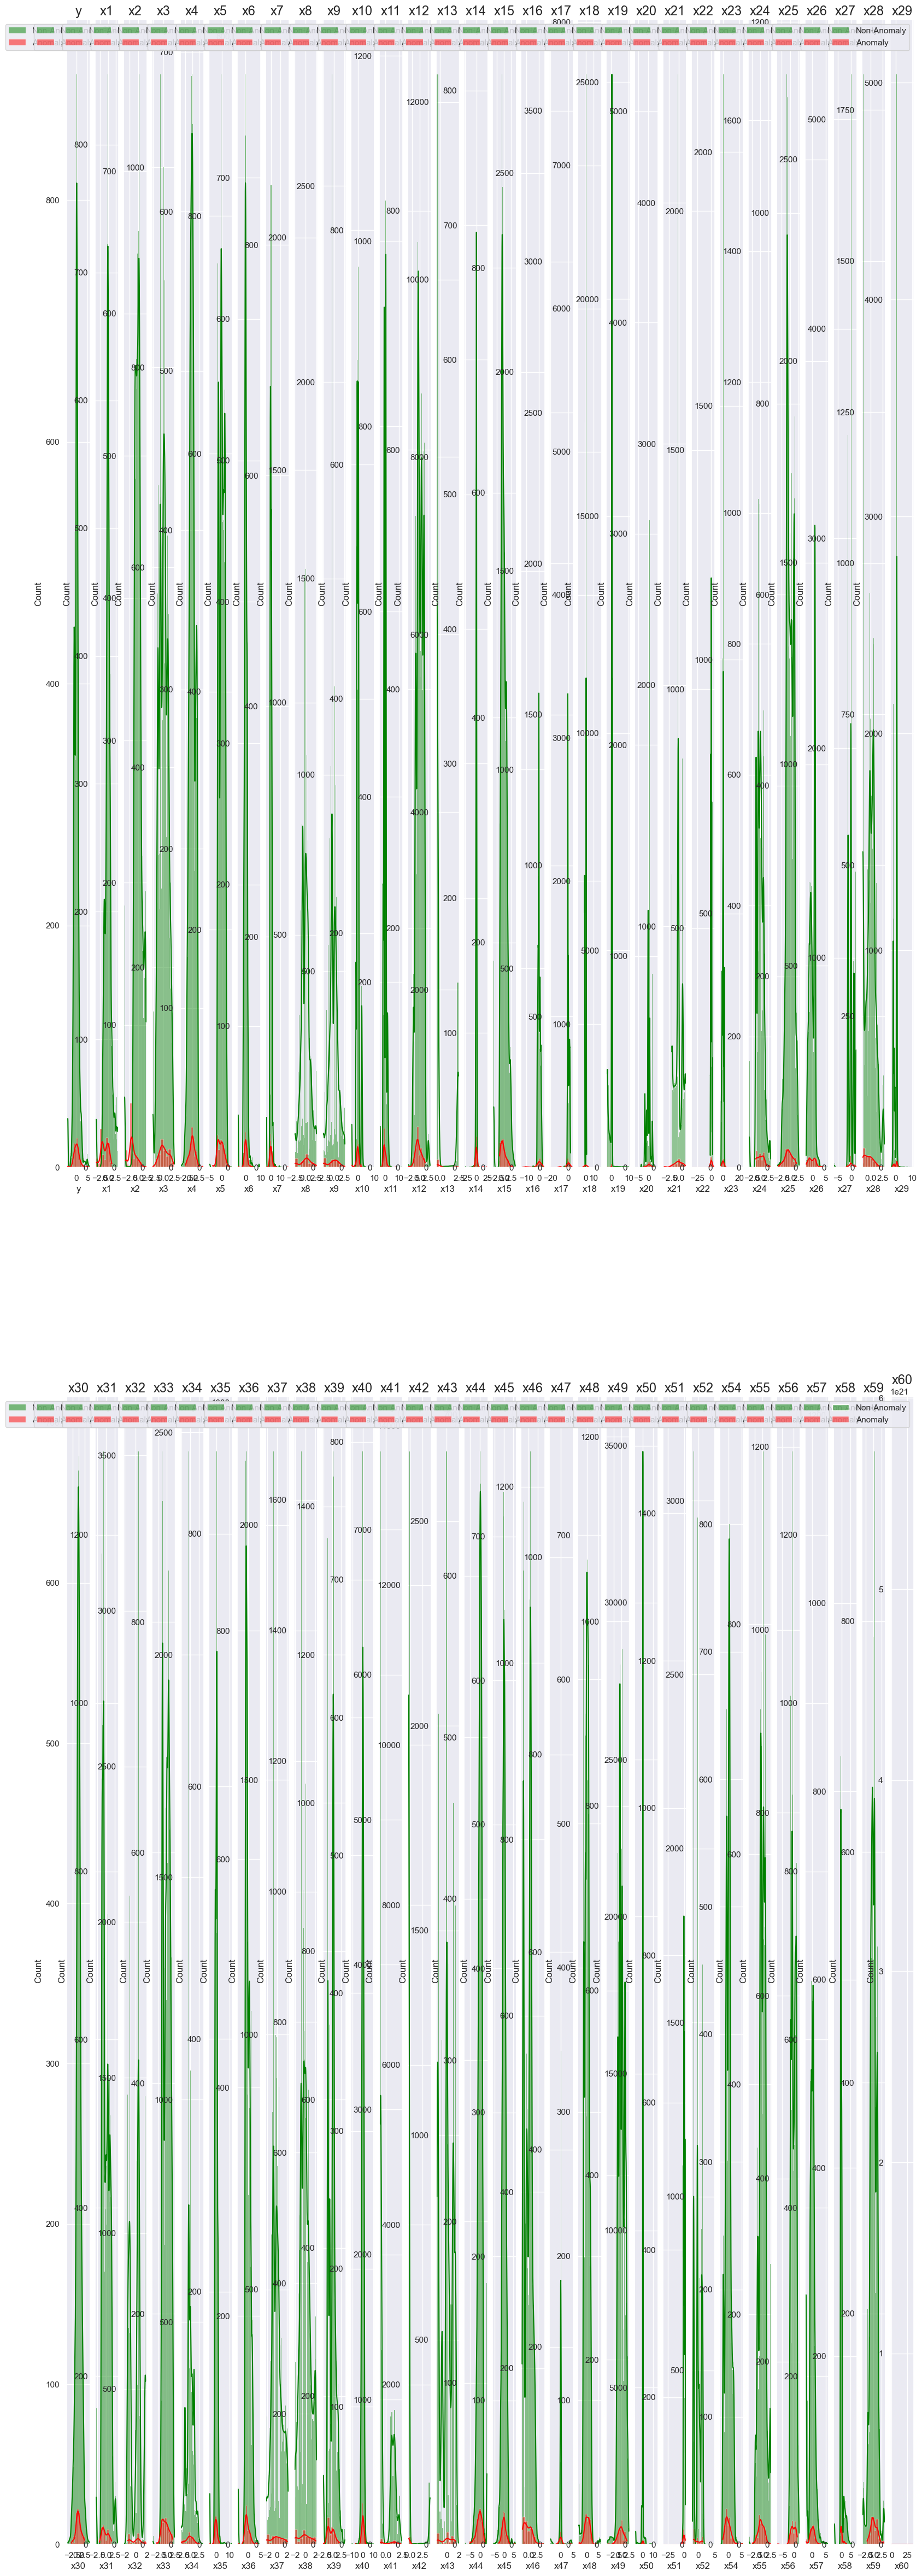

In [57]:
import seaborn as sns

plt.figure(figsize=(20, 60))
num_cols = min(len(X_train_pt_df.columns), 30)
num_rows = (len(X_train_pt_df.columns) + num_cols - 1) // num_cols

for n, col in enumerate(X_train_pt_df.columns):
    plt.subplot(num_rows, num_cols, n+1)
    sns.histplot(X_train_pt_df.loc[y_train.values == 0, col], color='green', label='Non-Anomaly', kde=True)
    sns.histplot(X_train_pt_df.loc[y_train.values == 1, col], color='red', label='Anomaly', kde=True)
    plt.title(col, fontsize=17)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
 #Building different models on the imbalanced dataset and let's see the results.

In [61]:
from sklearn import metrics


In [26]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [    0     1     2 ... 18393 18394 18396] TEST: [    3     8     9 ... 18392 18395 18397]
TRAIN: [    3     4     5 ... 18394 18395 18397] TEST: [    0     1     2 ... 18383 18386 18396]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [    5    24    25 ... 18387 18388 18394]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [    4     6     7 ... 18380 18390 18393]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [   13    14    18 ... 18379 18381 18384]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [    3    16    23 ... 18371 18378 18389]
TRAIN: [    0     2     3 ... 18391 18392 18397] TEST: [    1     9    10 ... 18394 18395 18396]
TRAIN: [    0     1     2 ... 18394 18395 18396] TEST: [    5     6     8 ... 18385 18392 18397]
TRAIN: [    0     1     3 ... 18395 18396 18397] TEST: [    2     7    11 ... 18380 18384 18390]
TRAIN: [    1     2     3 ... 18395 18396 18397] TEST: [    0     4    13 ... 18381 18387 18391]
TRAIN: [    0     1     2 ... 

In [37]:
from sklearn import metrics


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.8874108140300481
Parameters for l2 regularizations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 

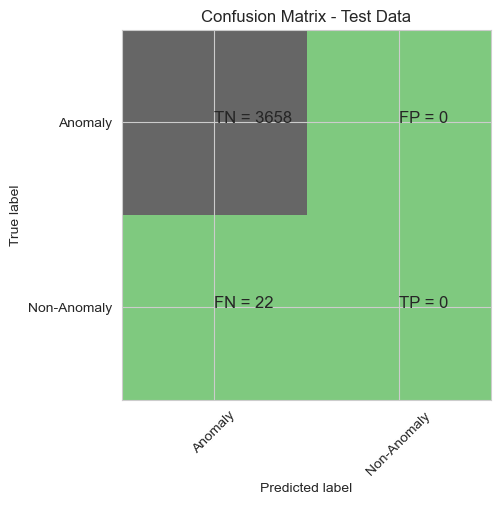

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3658
           1       0.00      0.00      0.00        22

    accuracy                           0.99      3680
   macro avg       0.50      0.50      0.50      3680
weighted avg       0.99      0.99      0.99      3680

Accuracy of Logistic model with l1 regularization: 0.9953804347826087
Confusion Matrix


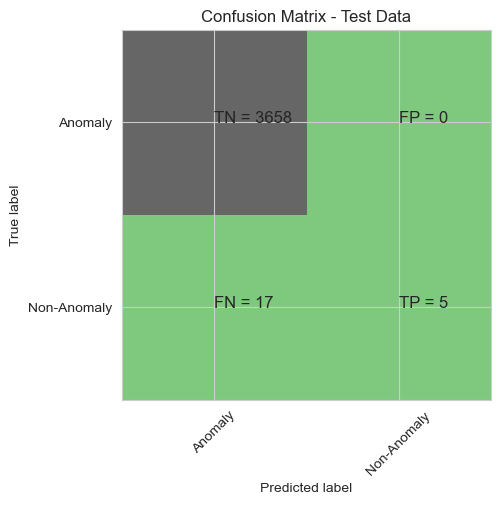

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       1.00      0.23      0.37        22

    accuracy                           1.00      3680
   macro avg       1.00      0.61      0.68      3680
weighted avg       1.00      1.00      0.99      3680

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset: 50.0%


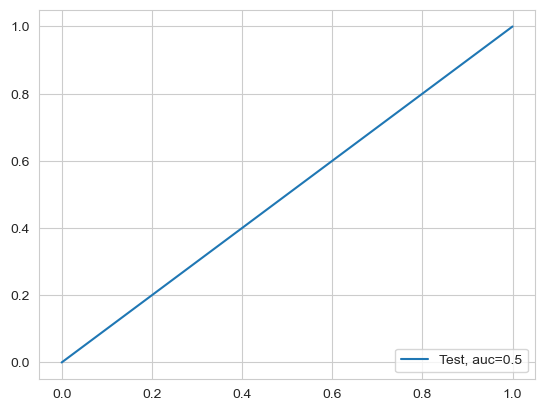

l1 roc_value: 0.895037029673443
l1 threshold: 0.034347798134376786
ROC for the test dataset: 89.5%


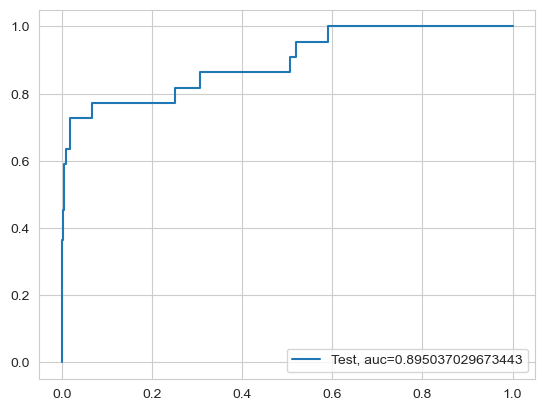

Time Taken by Model: --- 14.679731607437134 seconds ---
--------------------------------------------------------------------------------


In [38]:
#Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.9932046751834738
Confusion Matrix


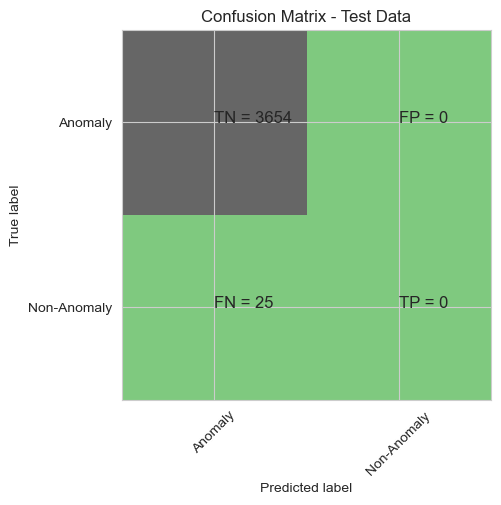

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3654
           1       0.00      0.00      0.00        25

    accuracy                           0.99      3679
   macro avg       0.50      0.50      0.50      3679
weighted avg       0.99      0.99      0.99      3679

KNN roc_value: 0.5311986863711002
KNN threshold: 0.2
ROC for the test dataset 53.1%


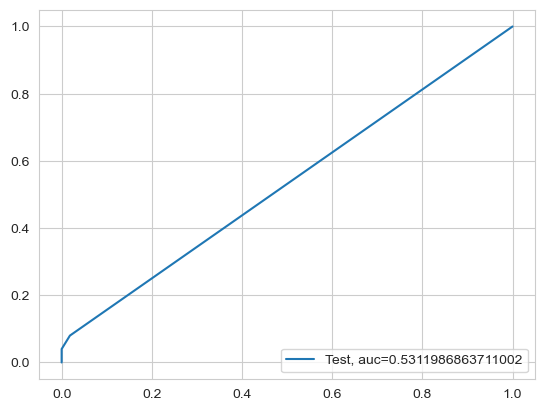

Time Taken by Model: --- 2.6712193489074707 seconds ---
--------------------------------------------------------------------------------


In [39]:
#Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.994020114161457
Confusion Matrix


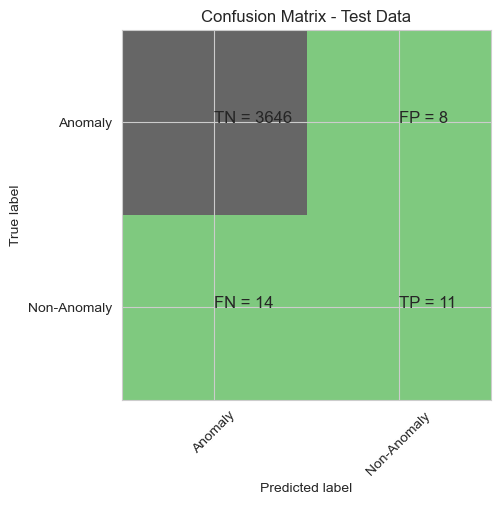

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3654
           1       0.58      0.44      0.50        25

    accuracy                           0.99      3679
   macro avg       0.79      0.72      0.75      3679
weighted avg       0.99      0.99      0.99      3679

gini tree_roc_value: 0.7189053092501367
Tree threshold: 1.0
ROC for the test dataset 71.9%


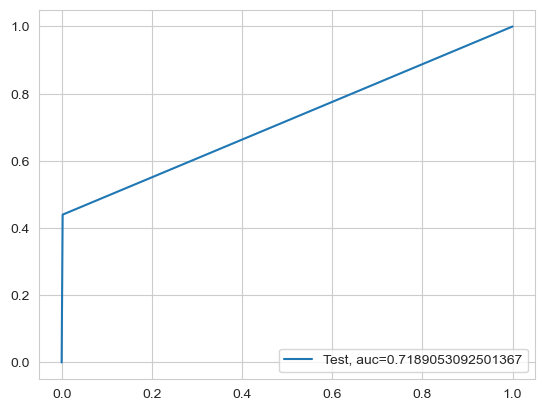

entropy score: 0.994020114161457
Confusion Matrix


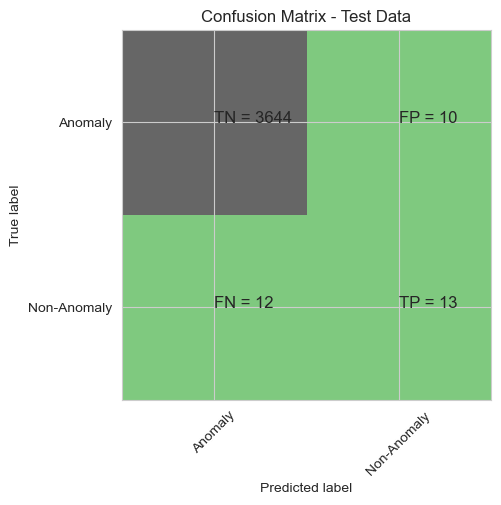

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3654
           1       0.57      0.52      0.54        25

    accuracy                           0.99      3679
   macro avg       0.78      0.76      0.77      3679
weighted avg       0.99      0.99      0.99      3679

entropy tree_roc_value: 0.7586316365626712
Tree threshold: 1.0
ROC for the test dataset 75.9%


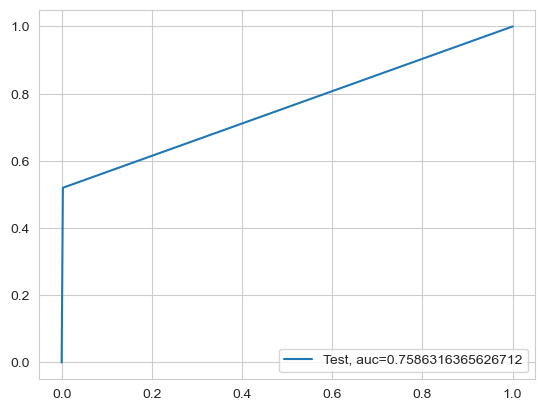

Time Taken by Model: --- 4.324962615966797 seconds ---
--------------------------------------------------------------------------------


In [40]:
#Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9953791791247621
Confusion Matrix


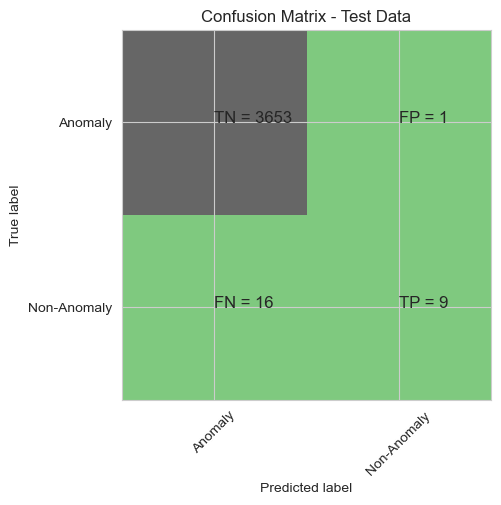

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3654
           1       0.90      0.36      0.51        25

    accuracy                           1.00      3679
   macro avg       0.95      0.68      0.76      3679
weighted avg       0.99      1.00      0.99      3679

Random Forest roc_value: 0.8398029556650246
Random Forest threshold: 0.06
ROC for the test dataset 84.0%


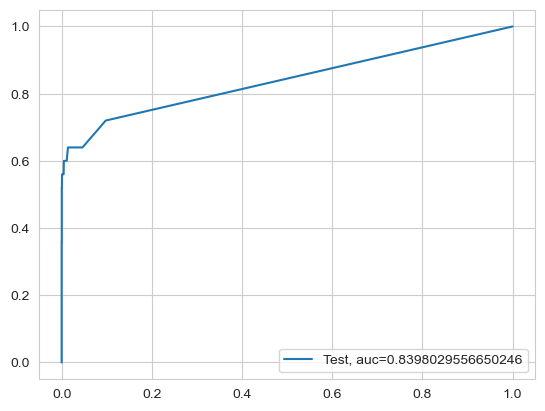

Time Taken by Model: --- 12.466848134994507 seconds ---
--------------------------------------------------------------------------------


In [41]:
#Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9964664310954063
Confusion Matrix


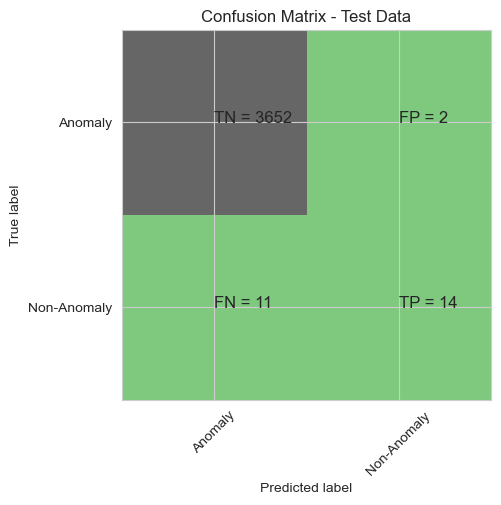

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3654
           1       0.88      0.56      0.68        25

    accuracy                           1.00      3679
   macro avg       0.94      0.78      0.84      3679
weighted avg       1.00      1.00      1.00      3679

XGboost roc_value: 0.8548549534756431
XGBoost threshold: 0.0020542077254503965
ROC for the test dataset 85.5%


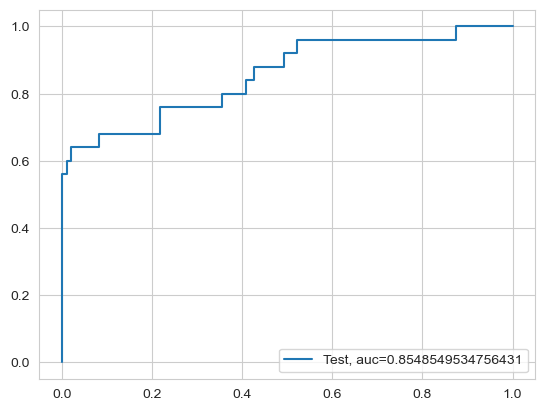

Time Taken by Model: --- 2.2966525554656982 seconds ---
--------------------------------------------------------------------------------


In [42]:
#Running XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [43]:
df_Results


Data_Imbalance_Handiling                                       Model  \
0               Power Transformer  Logistic Regression with L2 Regularisation   
1               Power Transformer  Logistic Regression with L1 Regularisation   
2  RepeatedKFold Cross Validation                                   KNN MODEL   
3  RepeatedKFold Cross Validation                                  TREE MODEL   
4  RepeatedKFold Cross Validation                                  TREE MODEL   
5  RepeatedKFold Cross Validation                               Random Forest   
6  RepeatedKFold Cross Validation                                     XGBoost   

   Accuracy  roc_value  threshold  
0  0.994022   0.500000        inf  
1  0.995380   0.895037   0.034348  
2  0.993205   0.531199   0.200000  
3  0.994020   0.718905   1.000000  
4  0.994020   0.758632   1.000000  
5  0.995379   0.839803   0.060000  
6  0.996466   0.854855   0.002054

In [155]:
#the XGBoost model achieved the highest accuracy and ROC value among the models you tested. XGBoost Model:
#Accuracy: 99.65%
#ROC Value: 85.49%
Threshold: 0.002

SyntaxError: invalid syntax (3447534238.py, line 1)

In [44]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

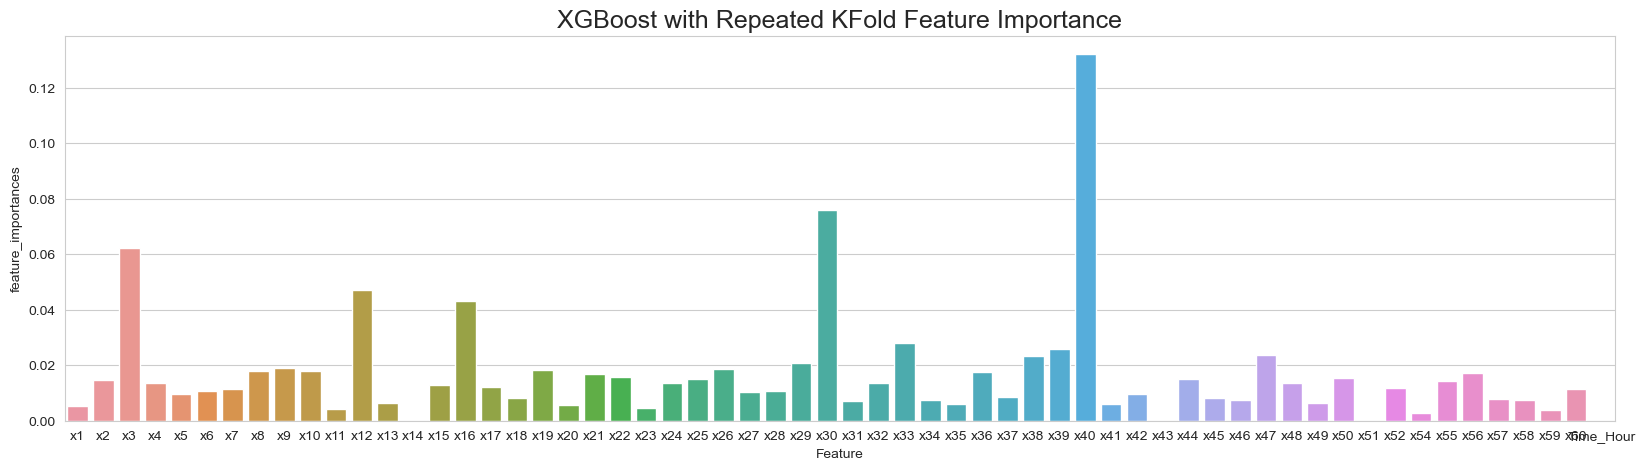

In [45]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

In [46]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 2738  2826  2921 ... 18395 18396 18397] TEST: [   0    1    2 ... 3687 3688 3689]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [2738 2826 2921 ... 7843 7939 7946]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [ 7356  7357  7358 ... 11037 11038 11152]
TRAIN: [    0     1     2 ... 18395 18396 18397] TEST: [11039 11040 11041 ... 15483 15520 15526]
TRAIN: [    0     1     2 ... 15483 15520 15526] TEST: [14710 14711 14712 ... 18395 18396 18397]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5499623139924014
Max auc_roc for l1: 0.8621728181207098
Parameters for l2 regularizations
[[-1.52822930e-05 -5.33136493e-05 -2.73012939e-05 -2.77207528e-03
  -1.11084703e-04 -1.79229545e-06 -2.66319428e-06 -2.20158754e-06
   2.77557763e-06  1.38299074e-06  5.29767637e-06  2.48133596e-05
  -2.48814296e-03  2.59183682e-06  2.01703260e-06  3.17992416e-05
  -2.09928934e-04 -2.11877239e-04 -7.28781199e-05  2.01461350e-05
  -1.29003621e-04 -9.17644245e-05 -6.80770011e-04  7.49312756e-04
   9.46812208e-04 -1.61915792e-05 -1.35185373e-05 -2.62514116e-02
   2.05255476e-03  8.45484689e-06 -5.09998794e-07  1.45077372e-03
   6.64312413e-08  5.16509701e-04 -4.29547617e-05 -6.66620766e-06
  -1.63804682e-05  3.49888983e-06  2.99639171e-06 -2.20025267e-05
   5.69527540e-06  1.98049187e-03 -2.07556348e-04 -1.18468821e-03
  -1.30638530e-04 -2.71589680e-05 -3.89003879e-03 -5.56181110e-05
   8.06306659e-03  1.82089032e-05  1.00081260e

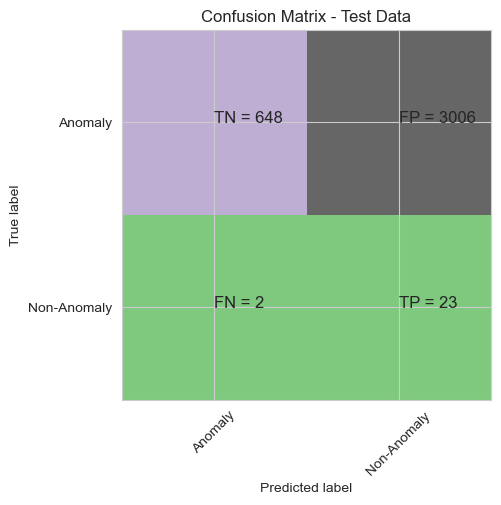

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.18      0.30      3654
           1       0.01      0.92      0.02        25

    accuracy                           0.18      3679
   macro avg       0.50      0.55      0.16      3679
weighted avg       0.99      0.18      0.30      3679

Accuracy of Logistic model with l1 regularization: 0.9937483011687959
Confusion Matrix


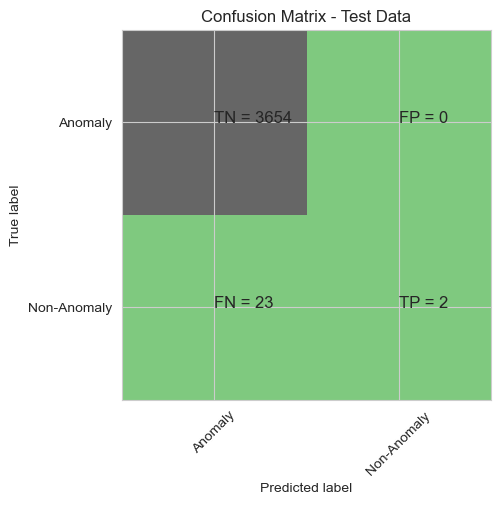

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3654
           1       1.00      0.08      0.15        25

    accuracy                           0.99      3679
   macro avg       1.00      0.54      0.57      3679
weighted avg       0.99      0.99      0.99      3679

l2 roc_value: 0.5487027914614122
l2 threshold: 0.8193387068448258
ROC for the test dataset: 54.9%


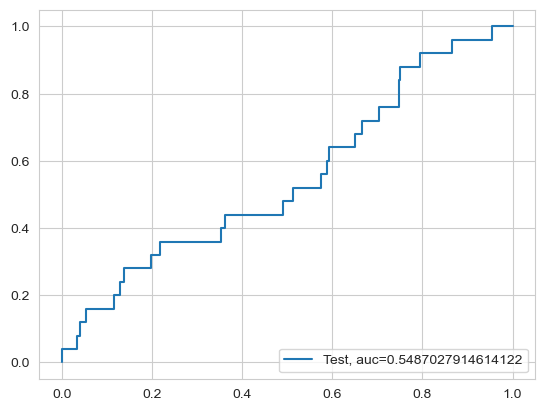

l1 roc_value: 0.6942090859332238
l1 threshold: 0.10836819102073976
ROC for the test dataset: 69.4%


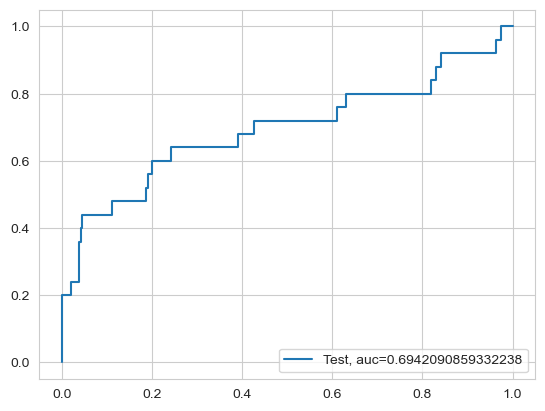

Time Taken by Model: --- 17.44257950782776 seconds ---
--------------------------------------------------------------------------------


In [47]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.6882304974177765
Confusion Matrix


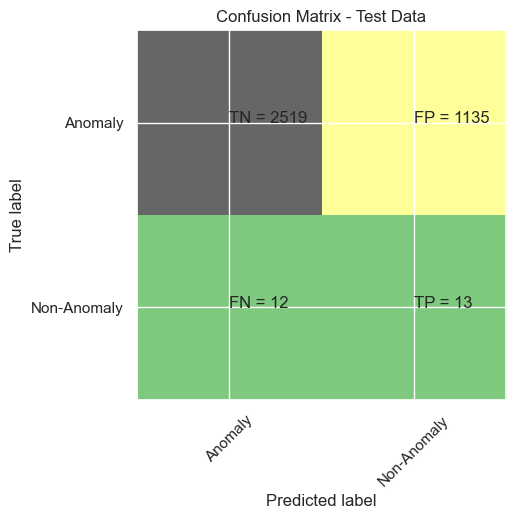

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      3654
           1       0.01      0.52      0.02        25

    accuracy                           0.69      3679
   macro avg       0.50      0.60      0.42      3679
weighted avg       0.99      0.69      0.81      3679

gini tree_roc_value: 0.6046907498631636
Tree threshold: 1.0
ROC for the test dataset 60.5%


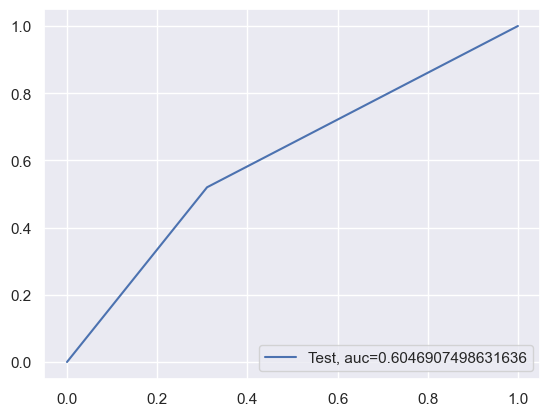

entropy score: 0.6724653438434357
Confusion Matrix


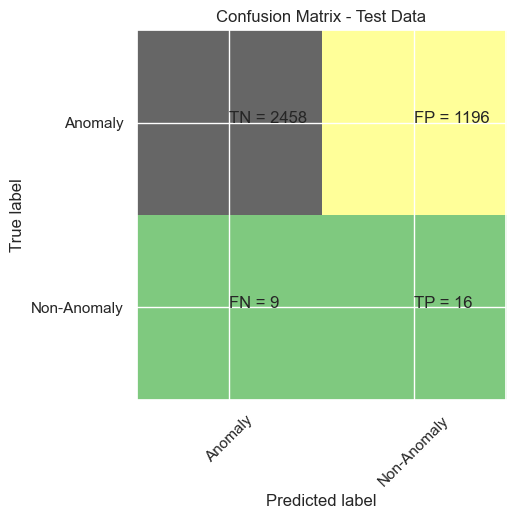

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      3654
           1       0.01      0.64      0.03        25

    accuracy                           0.67      3679
   macro avg       0.50      0.66      0.41      3679
weighted avg       0.99      0.67      0.80      3679

entropy tree_roc_value: 0.6563437328954571
Tree threshold: 1.0
ROC for the test dataset 65.6%


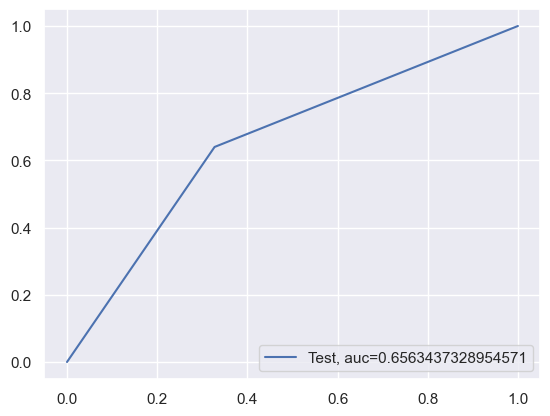

Time Taken by Model: --- 4.808061599731445 seconds ---
--------------------------------------------------------------------------------


In [84]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9410165805925523
Confusion Matrix


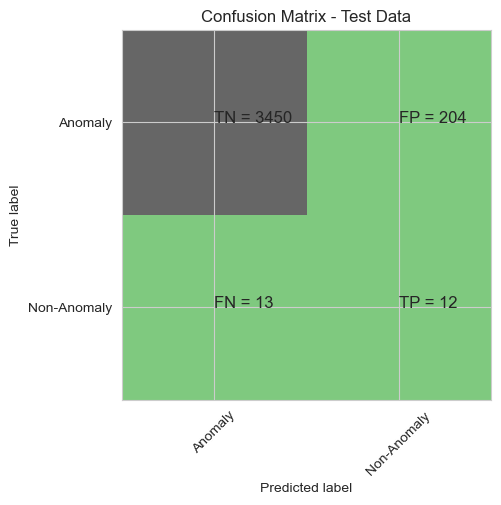

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3654
           1       0.06      0.48      0.10        25

    accuracy                           0.94      3679
   macro avg       0.53      0.71      0.53      3679
weighted avg       0.99      0.94      0.96      3679

Random Forest roc_value: 0.78584017515052
Random Forest threshold: 0.37
ROC for the test dataset 78.6%


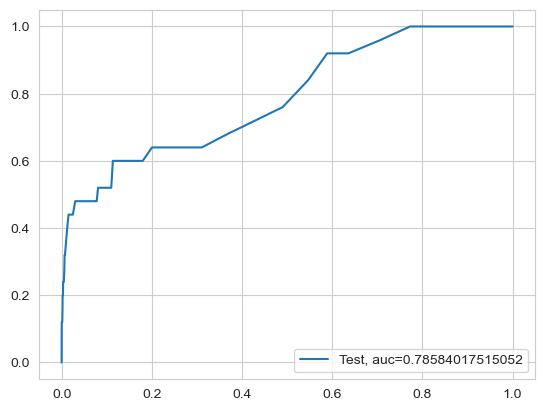

Time Taken by Model: --- 12.610562801361084 seconds ---
--------------------------------------------------------------------------------


In [48]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9315031258494156
Confusion Matrix


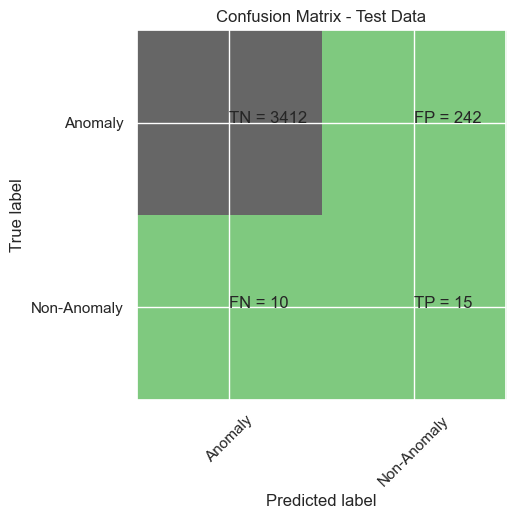

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3654
           1       0.06      0.60      0.11        25

    accuracy                           0.93      3679
   macro avg       0.53      0.77      0.54      3679
weighted avg       0.99      0.93      0.96      3679

XGboost roc_value: 0.8035249042145594
XGBoost threshold: 0.7476910948753357
ROC for the test dataset 80.4%


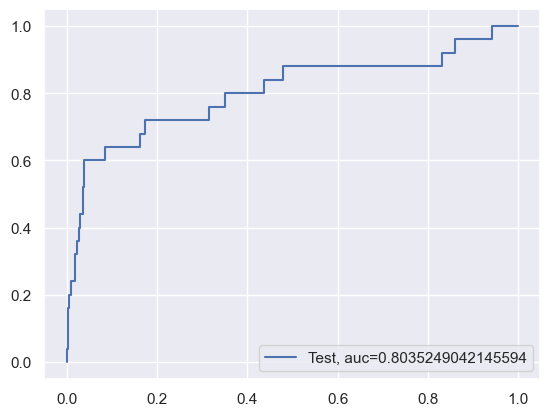

Time Taken by Model: --- 1.955381155014038 seconds ---
--------------------------------------------------------------------------------


In [86]:
#Running XGBoost Model.
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold  Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [49]:
df_Results


Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2     RepeatedKFold Cross Validation   
3     RepeatedKFold Cross Validation   
4     RepeatedKFold Cross Validation   
5     RepeatedKFold Cross Validation   
6     RepeatedKFold Cross Validation   
7  StratifiedKFold  Cross Validation   
8  StratifiedKFold  Cross Validation   
9  StratifiedKFold  Cross Validation   

                                        Model  Accuracy  roc_value  threshold  
0  Logistic Regression with L2 Regularisation  0.994022   0.500000        inf  
1  Logistic Regression with L1 Regularisation  0.995380   0.895037   0.034348  
2                                   KNN MODEL  0.993205   0.531199   0.200000  
3                                  TREE MODEL  0.994020   0.718905   1.000000  
4                                  TREE MODEL  0.994020   0.758632   1.000000  
5                               Random Forest  0.995379   0.839803   0.060000  
6                                     XGBoost  0.996466   0.854855   0.002054  
7  Logistic Regression with L2 Regularisation  0.182387   0.548703   0.819339  
8  Logistic Regression with L1 Regularisation  0.993748   0.694209   0.108368  
9                               Random Forest  0.941017   0.785840   0.370000

In [156]:

#We can easily see that model XGBoost has the highest accuracy of 0.996466, and a high ROC value of 0.854855.

SyntaxError: invalid syntax (4052301119.py, line 1)

In [ ]:
#Proceed with the model which shows the best result

#Apply the best hyperparameter on the model

#Predict on the test dataset

In [50]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the parameter distributions
param_distributions = {
    'eta': np.linspace(0.01, 0.1, 5),
    'max_depth': np.arange(3, 6),
    'subsample': np.linspace(0.7, 0.9, 3),
    'colsample_bytree': np.linspace(0.7, 0.9, 3),
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'n_estimators': [50, 100]
}

skf = StratifiedKFold(n_splits=5, random_state=None)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

# Randomized search
random_search = RandomizedSearchCV(estimator=xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   scoring='roc_auc',
                                   cv=skf,
                                   n_jobs=-1,
                                   verbose=1)

# Fit the model
random_search.fit(X_train_SKF_cv, y_train_SKF_cv)

# Best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)

# Predictions
y_pred = random_search.predict(X_test_SKF_cv)
y_pred_probs = random_search.predict_proba(X_test_SKF_cv)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test_SKF_cv, y_pred)
print("Accuracy of XGBoost model:", accuracy)

# ROC AUC
roc_value = roc_auc_score(y_test_SKF_cv, y_pred_probs)
print("ROC AUC value:", roc_value)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_SKF_cv, y_pred_probs)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal threshold:", optimal_threshold)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'objective': 'binary:logistic', 'n_estimators': 100, 'max_depth': 3, 'eval_metric': 'auc', 'eta': 0.0325, 'colsample_bytree': 0.8}
Accuracy of XGBoost model: 0.9684696928513183
ROC AUC value: 0.8404269293924468
Optimal threshold: 0.02627435


In [51]:
# Get feature importances from the best estimator
importance = random_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_SKF_cv.columns,
    'Importance': importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(feature_importance_df)

      Feature  Importance
0          x3    0.127312
1         x29    0.081473
2          x2    0.072822
3         x33    0.054055
4         x55    0.028459
5         x17    0.023799
6         x12    0.022443
7         x16    0.020735
8         x47    0.020429
9          x8    0.019165
10        x39    0.017250
11        x22    0.016486
12        x28    0.016365
13        x48    0.015355
14        x52    0.015170
15         x9    0.015057
16        x45    0.014812
17        x38    0.014648
18         x5    0.014433
19        x49    0.013881
20        x23    0.013849
21  Time_Hour    0.013843
22        x56    0.013796
23        x57    0.013534
24         x4    0.013483
25        x60    0.013449
26        x42    0.012899
27        x54    0.012615
28        x11    0.012361
29        x21    0.012164
30        x37    0.012130
31        x14    0.012084
32        x34    0.011324
33        x30    0.011206
34        x25    0.011187
35        x26    0.011160
36        x18    0.010639
37         x

In [ ]:
pip uninstall scikit-learn imbalanced-learn


In [52]:

pip install --upgrade scikit-learn imbalanced-learn

In [53]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
  
    # Create DataFrame for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)


In [57]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and logistic regression model
pipeline = make_pipeline(imputer, LogisticRegressionCV())

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9937483011687959


In [63]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_over_imputed = imputer.fit_transform(X_over)
X_test_imputed = imputer.transform(X_test)

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_over_imputed, y_over)

# Predict on the test data
y_pred = knn_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", accuracy)


Accuracy of KNN model: 0.7164990486545257


In [61]:
# Check column names
print("Column names in X_over:", X_over.columns)
print("Column names in X_test:", X_test.columns)

# Check for any missing columns in X_test compared to X_over
missing_columns = set(X_over.columns) - set(X_test.columns)
print("Missing columns in X_test:", missing_columns)

# Reindex columns of X_test if necessary
if missing_columns:
    X_test = X_test.reindex(columns=X_over.columns)



Column names in X_over: Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'Time_Hour'],
      dtype='object')
Column names in X_test: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'Time_Hour'],
     

In [62]:
# Separating target variable from features in X_over
X_over_features = X_over.drop(columns=['y'])

# Check the columns in X_over_features
print("Column names in X_over_features:", X_over_features.columns)

# Check the columns in X_test
print("Column names in X_test:", X_test.columns)

# Find the missing columns in X_test
missing_columns = set(X_over.columns) - set(X_test.columns)
print("Missing columns in X_test:", missing_columns)


Column names in X_over_features: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'Time_Hour'],
      dtype='object')
Column names in X_test: Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'Time_Hour

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9535199782549606
Confusion Matrix


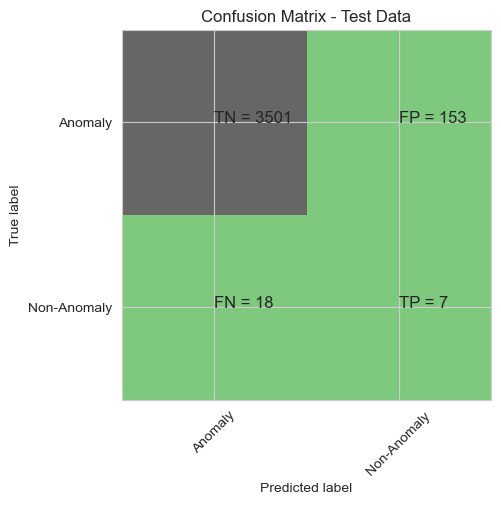

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3654
           1       0.04      0.28      0.08        25

    accuracy                           0.95      3679
   macro avg       0.52      0.62      0.53      3679
weighted avg       0.99      0.95      0.97      3679

gini tree_roc_value: 0.619064039408867
Tree threshold: 1.0
ROC for the test dataset 61.9%


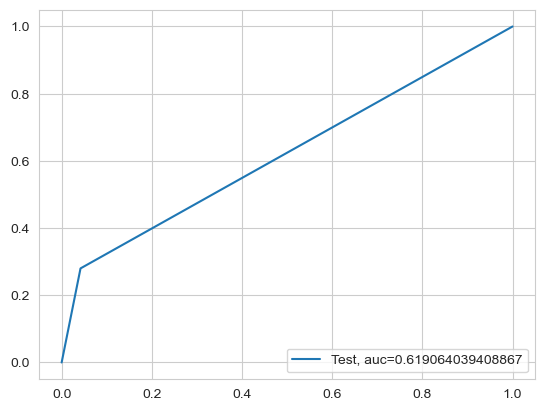

entropy score: 0.8934493068768687
Confusion Matrix


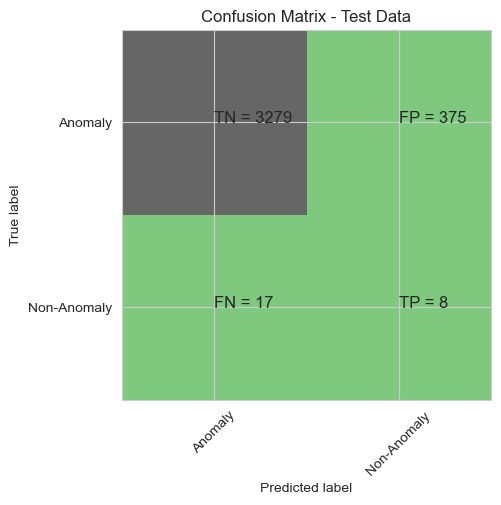

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3654
           1       0.02      0.32      0.04        25

    accuracy                           0.89      3679
   macro avg       0.51      0.61      0.49      3679
weighted avg       0.99      0.89      0.94      3679

entropy tree_roc_value: 0.6086863711001642
Tree threshold: 1.0
ROC for the test dataset 60.9%


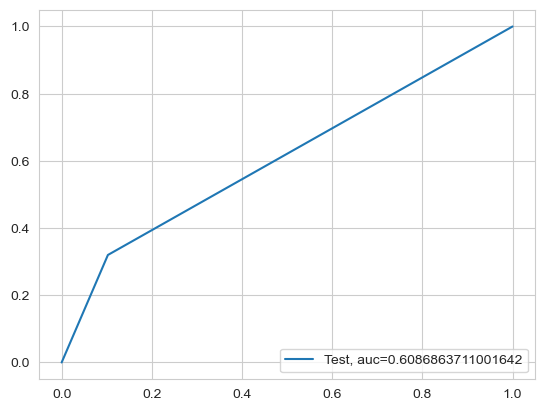

Time Taken by Model: --- 3.573357343673706 seconds ---
--------------------------------------------------------------------------------


In [64]:
#Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.933949442783365
Confusion Matrix


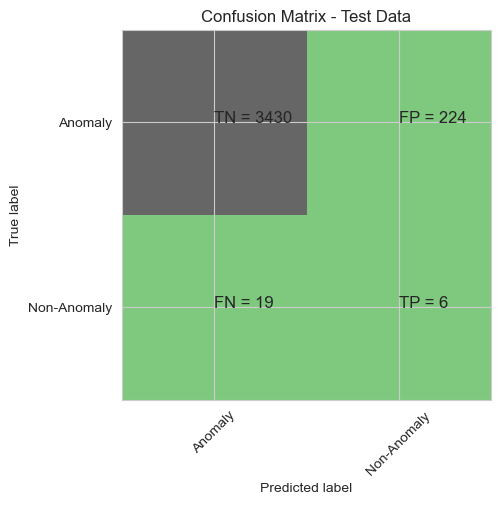

classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3654
           1       0.03      0.24      0.05        25

    accuracy                           0.93      3679
   macro avg       0.51      0.59      0.51      3679
weighted avg       0.99      0.93      0.96      3679

Random Forest roc_value: 0.7299069512862617
Random Forest threshold: 0.34
ROC for the test dataset 73.0%


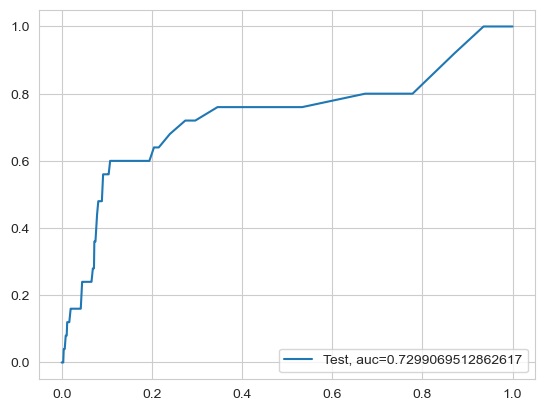

Time Taken by Model: --- 11.351900100708008 seconds ---
--------------------------------------------------------------------------------


In [65]:
#Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [66]:
df_Results


Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7              StratifiedKFold  Cross Validation   
8              StratifiedKFold  Cross Validation   
9              StratifiedKFold  Cross Validation   
10  Random Oversampling with StratifiedKFold CV    
11  Random Oversampling with StratifiedKFold CV    
12  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.994022   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.995380   0.895037   0.034348  
2                                    KNN MODEL  0.993205   0.531199   0.200000  
3                                   TREE MODEL  0.994020   0.718905   1.000000  
4                                   TREE MODEL  0.994020   0.758632   1.000000  
5                                Random Forest  0.995379   0.839803   0.060000  
6                                      XGBoost  0.996466   0.854855   0.002054  
7   Logistic Regression with L2 Regularisation  0.182387   0.548703   0.819339  
8   Logistic Regression with L1 Regularisation  0.993748   0.694209   0.108368  
9                                Random Forest  0.941017   0.785840   0.370000  
10                                  TREE MODEL  0.953520   0.619064   1.000000  
11                                  TREE MODEL  0.893449   0.608686   1.000000  
12                               Random Forest  0.933949   0.729907   0.340000

In [ ]:
#Power Transformer Logistic Regression with L1 Regularization has the highest accuracy of 0.995380 and a high ROC 
#value of 0.895037.



In [ ]:
#Based on these observations, it seems that Logistic Regression with L1 Regularization is the best-performing 
#model among the ones listed. 

In [ ]:
# for handeling the imbalanced data we use SMOTE and ADASYN  

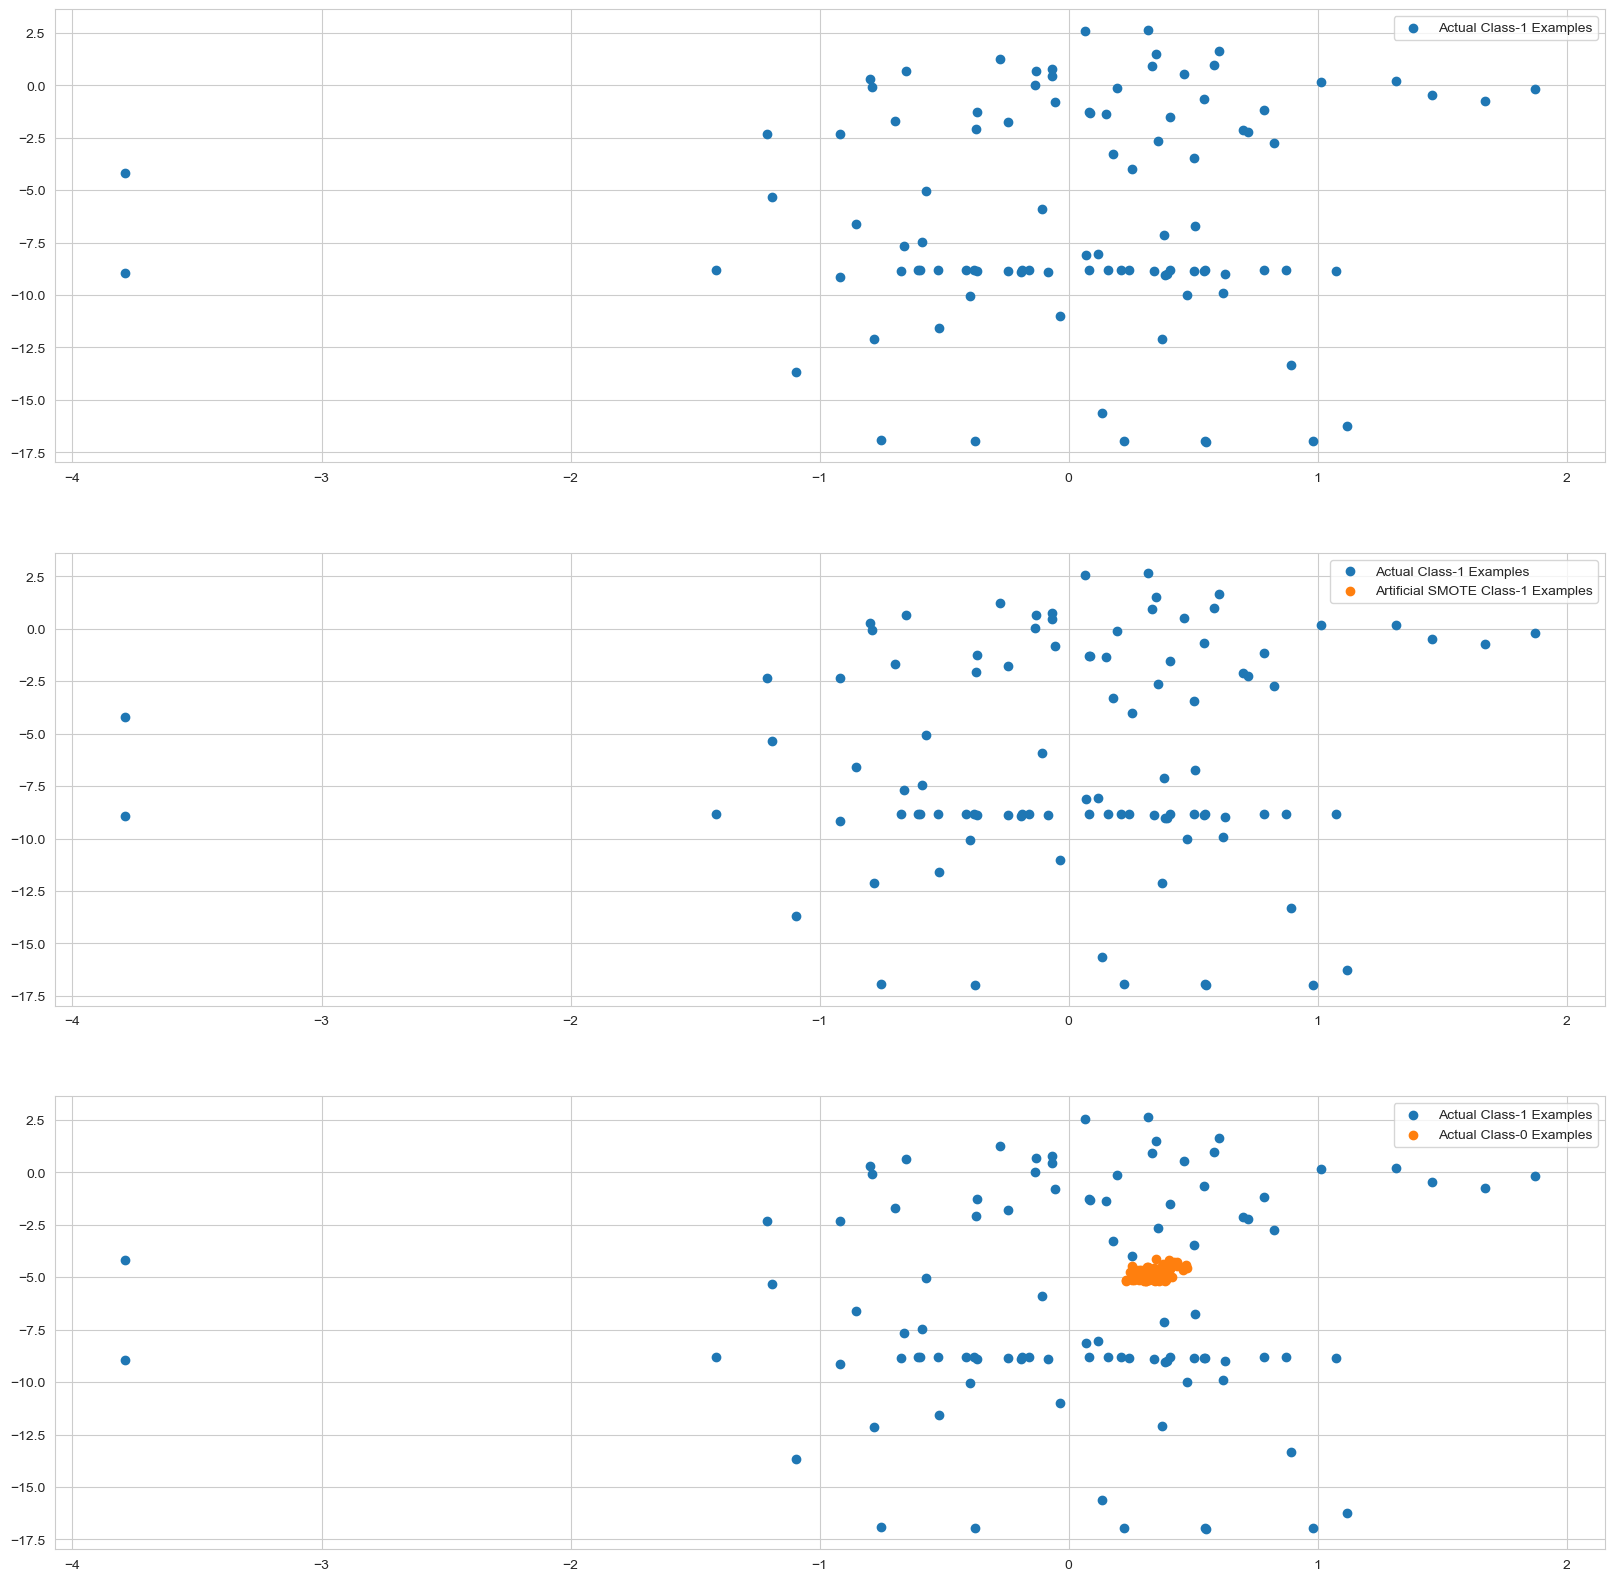

In [67]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

# we alardy defined X_train, y_train, , cols are already defined
SMOTE = SMOTE(random_state=0)

X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train) 

# Convert to numpy arrays for indexing
X_train_np = X_train.to_numpy()

# Get indices of minority and majority class
minority_indices = np.where(y_train == 1.0)[0]
majority_indices = np.where(y_train == 0.0)[0]

# Extract samples based on indices
X_train_1 = X_train_np[minority_indices]
X_train_0 = X_train_np[majority_indices]

# Create dataframe
cols = X_train.columns  
X_train_Smote_df = pd.DataFrame(data=X_train_Smote, columns=cols)

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(3, 1)

# Plot Actual Class-1 
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[0].legend()

# Plot SMOTE Class-1
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[1].scatter(X_train_Smote_df.iloc[minority_indices[len(X_train_1):], 0], 
               X_train_Smote_df.iloc[minority_indices[len(X_train_1):], 1], 
               label='Artificial SMOTE Class-1 Examples')
axs[1].legend()

# Plot Actual Class-1 and Class-0
axs[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[2].scatter(X_train_0[:len(X_train_1), 0], X_train_0[:len(X_train_1), 1], label='Actual Class-0 Examples')
axs[2].legend()

plt.show()

In [68]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
    
    # Create DataFrame for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.6867549290817772
Max auc_roc for l1: 0.5
Parameters for l2 regularizations
[[ 5.02974646e-08 -1.68853662e-04 -2.49806550e-04  5.82038076e-04
  -1.48249774e-06 -4.92490241e-04  5.57240447e-07 -1.69828857e-08
   1.10568688e-06  4.11212879e-07 -3.41814578e-05 -5.42983717e-06
  -3.68434853e-04 -6.17031103e-07  3.40140649e-07 -5.46885426e-06
  -3.69178758e-05 -4.38699883e-05 -1.11005612e-04 -1.35066626e-09
   5.80746327e-07 -6.37554364e-06  3.27691347e-05  3.94617535e-06
   8.27535604e-05 -1.25853449e-05 -4.33267950e-06  1.77890072e-04
  -1.76641389e-03  1.09538921e-07 -8.46409247e-07  4.62766868e-05
  -8.13845409e-10 -9.16166611e-04 -9.95012467e-06 -1.95973924e-06
  -2.46538090e-06  5.41834936e-07  5.71810827e-07 -7.23427477e-06
   9.83340957e-06  4.99763042e-04 -2.08734150e-05 -7.58118469e-05
  -4.25202915e-06  1.60168745e-06 -5.34819466e-04  2.75110765e-06
   8.51556851e-04 -3.75056718e-05  2.36957694e-04 -7.39407801

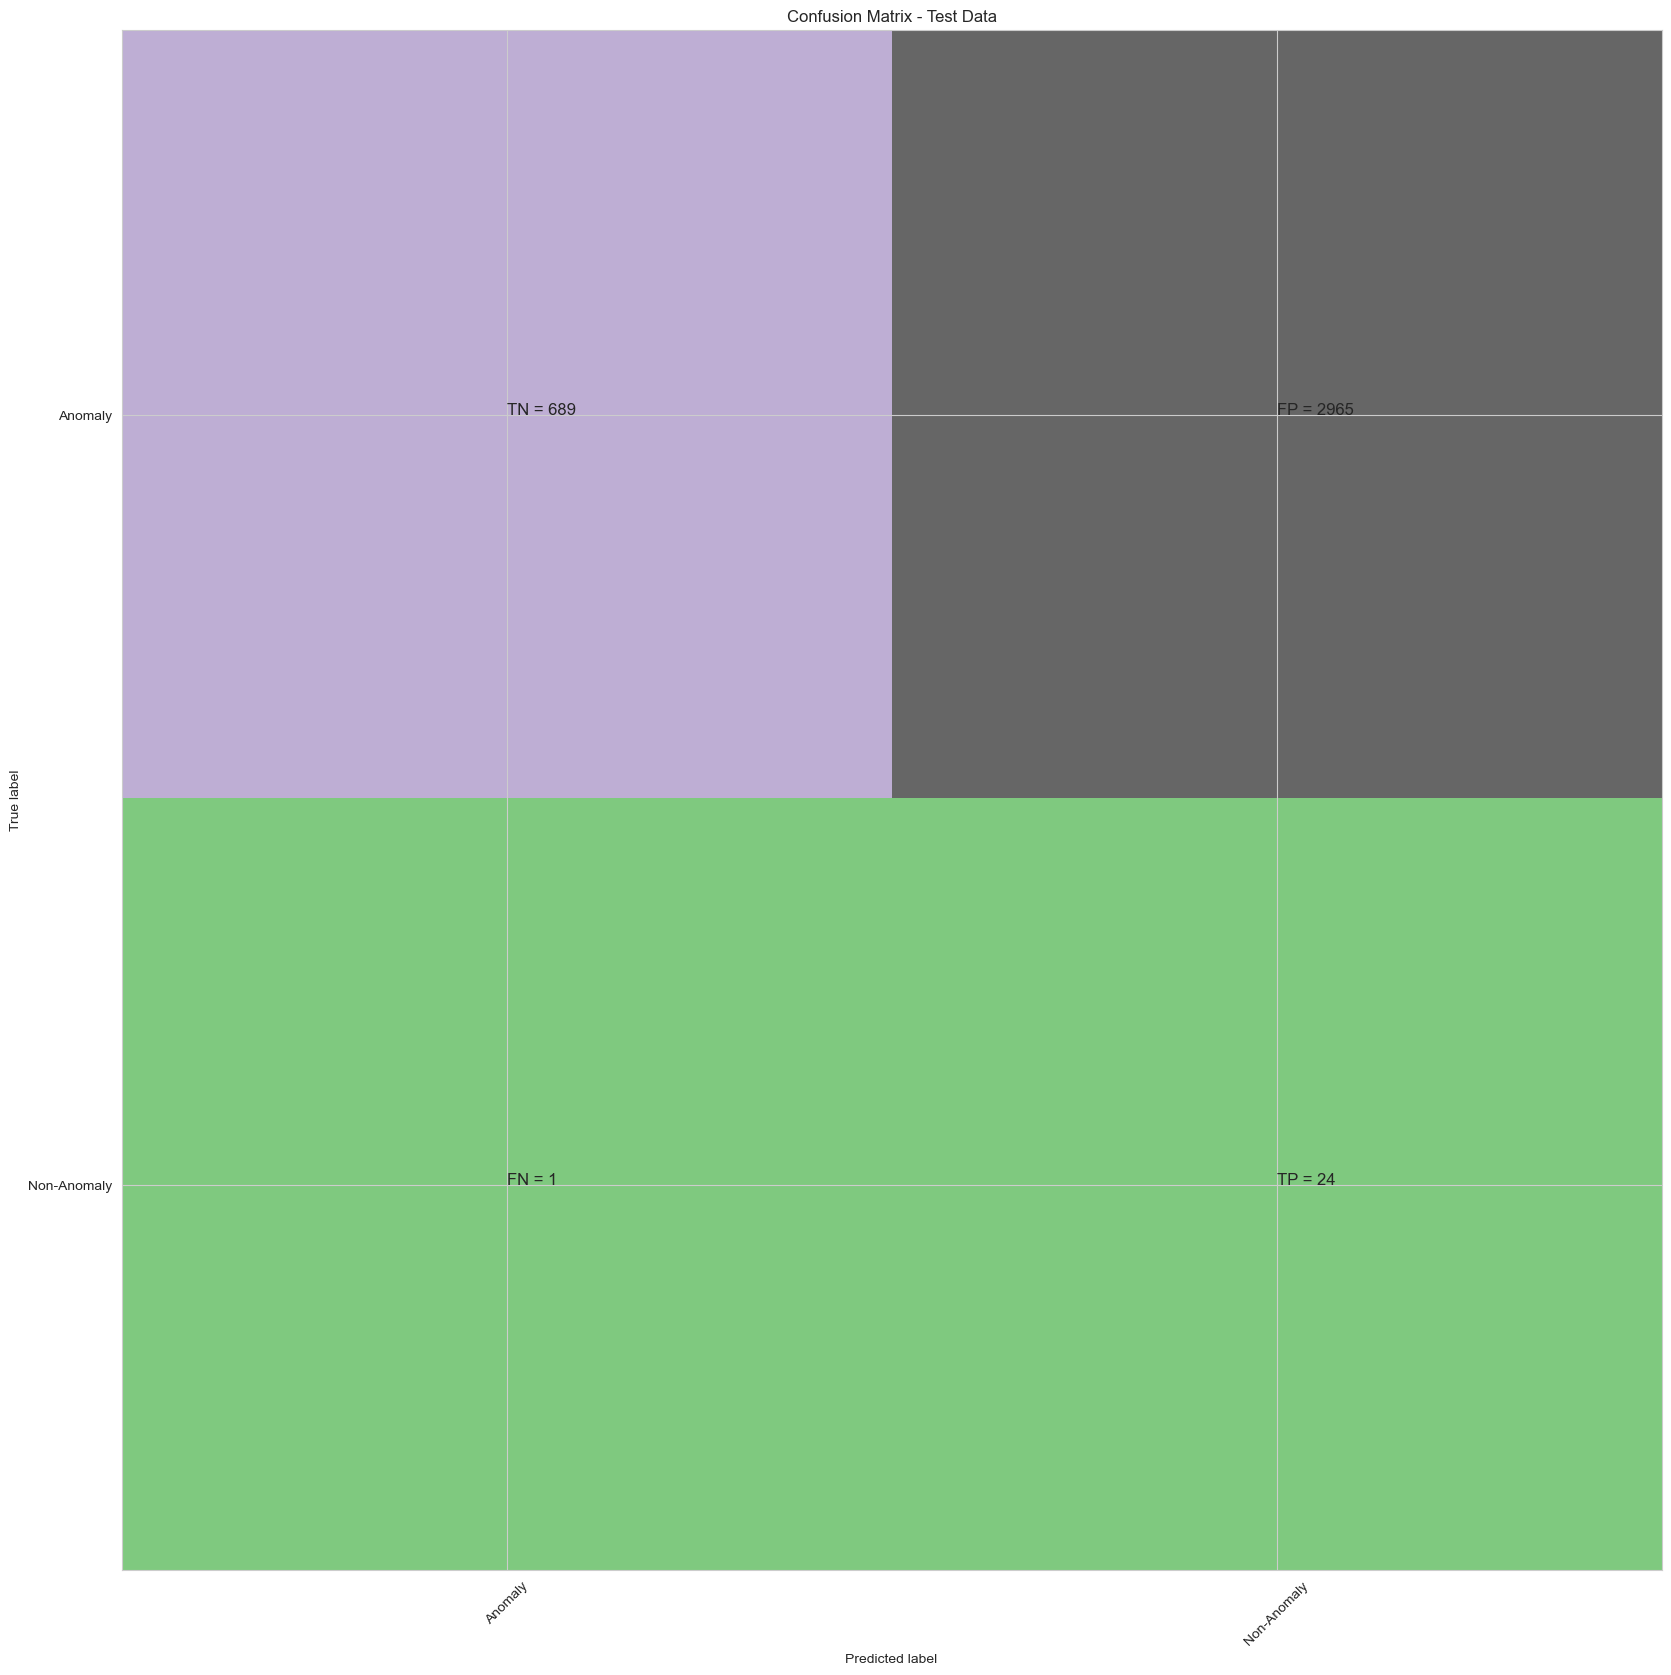

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.19      0.32      3654
           1       0.01      0.96      0.02        25

    accuracy                           0.19      3679
   macro avg       0.50      0.57      0.17      3679
weighted avg       0.99      0.19      0.32      3679

Accuracy of Logistic model with l1 regularization: 0.9932046751834738
Confusion Matrix


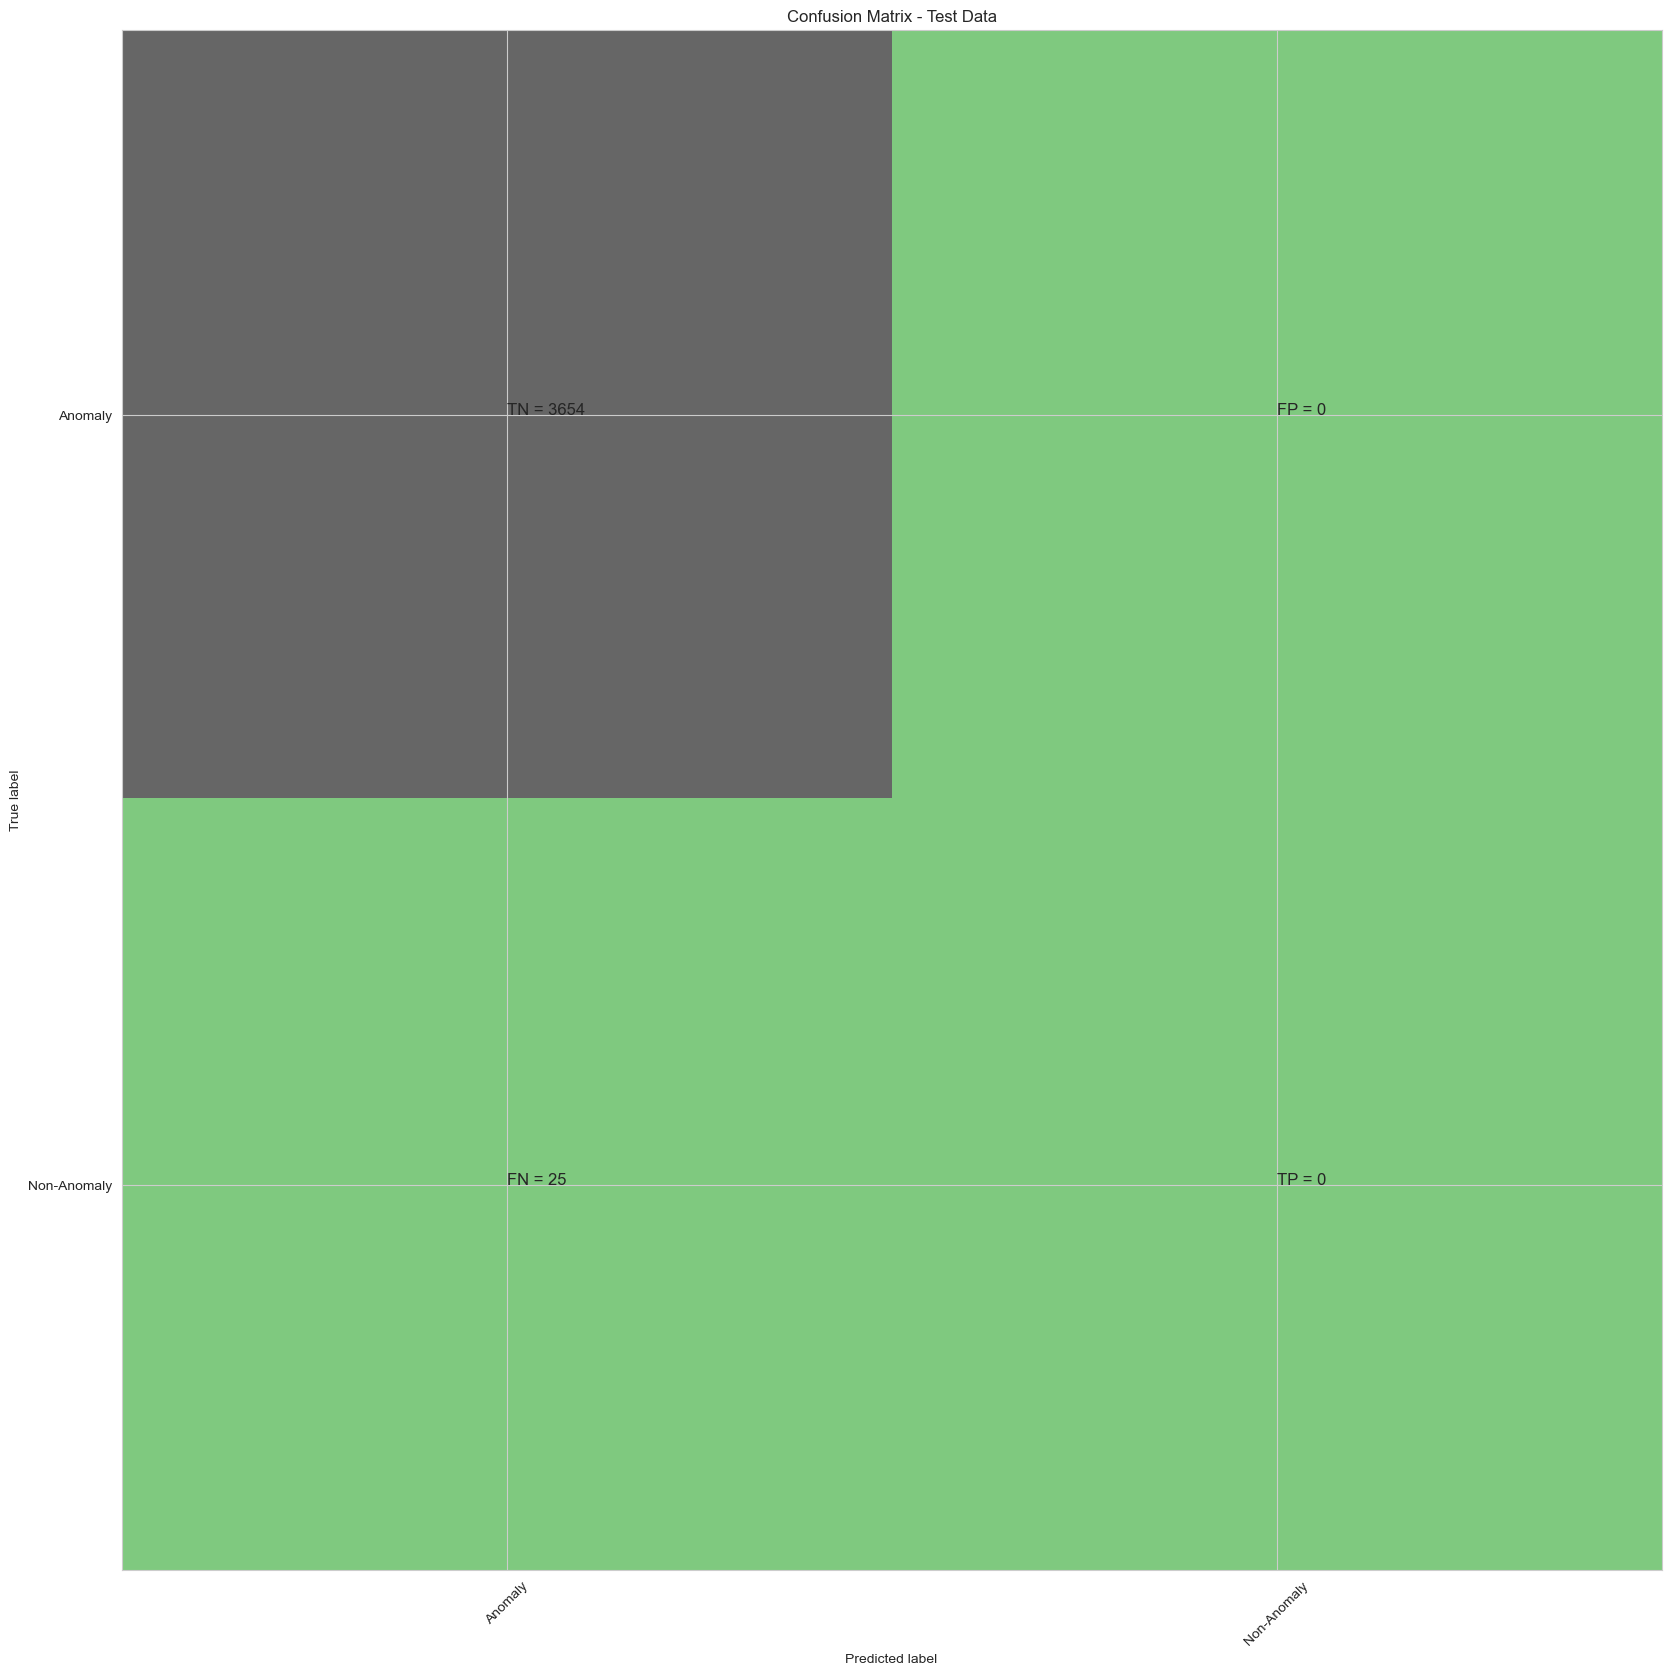

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3654
           1       0.00      0.00      0.00        25

    accuracy                           0.99      3679
   macro avg       0.50      0.50      0.50      3679
weighted avg       0.99      0.99      0.99      3679

l2 roc_value: 0.6118773946360153
l2 threshold: 0.6681905727536838
ROC for the test dataset: 61.2%


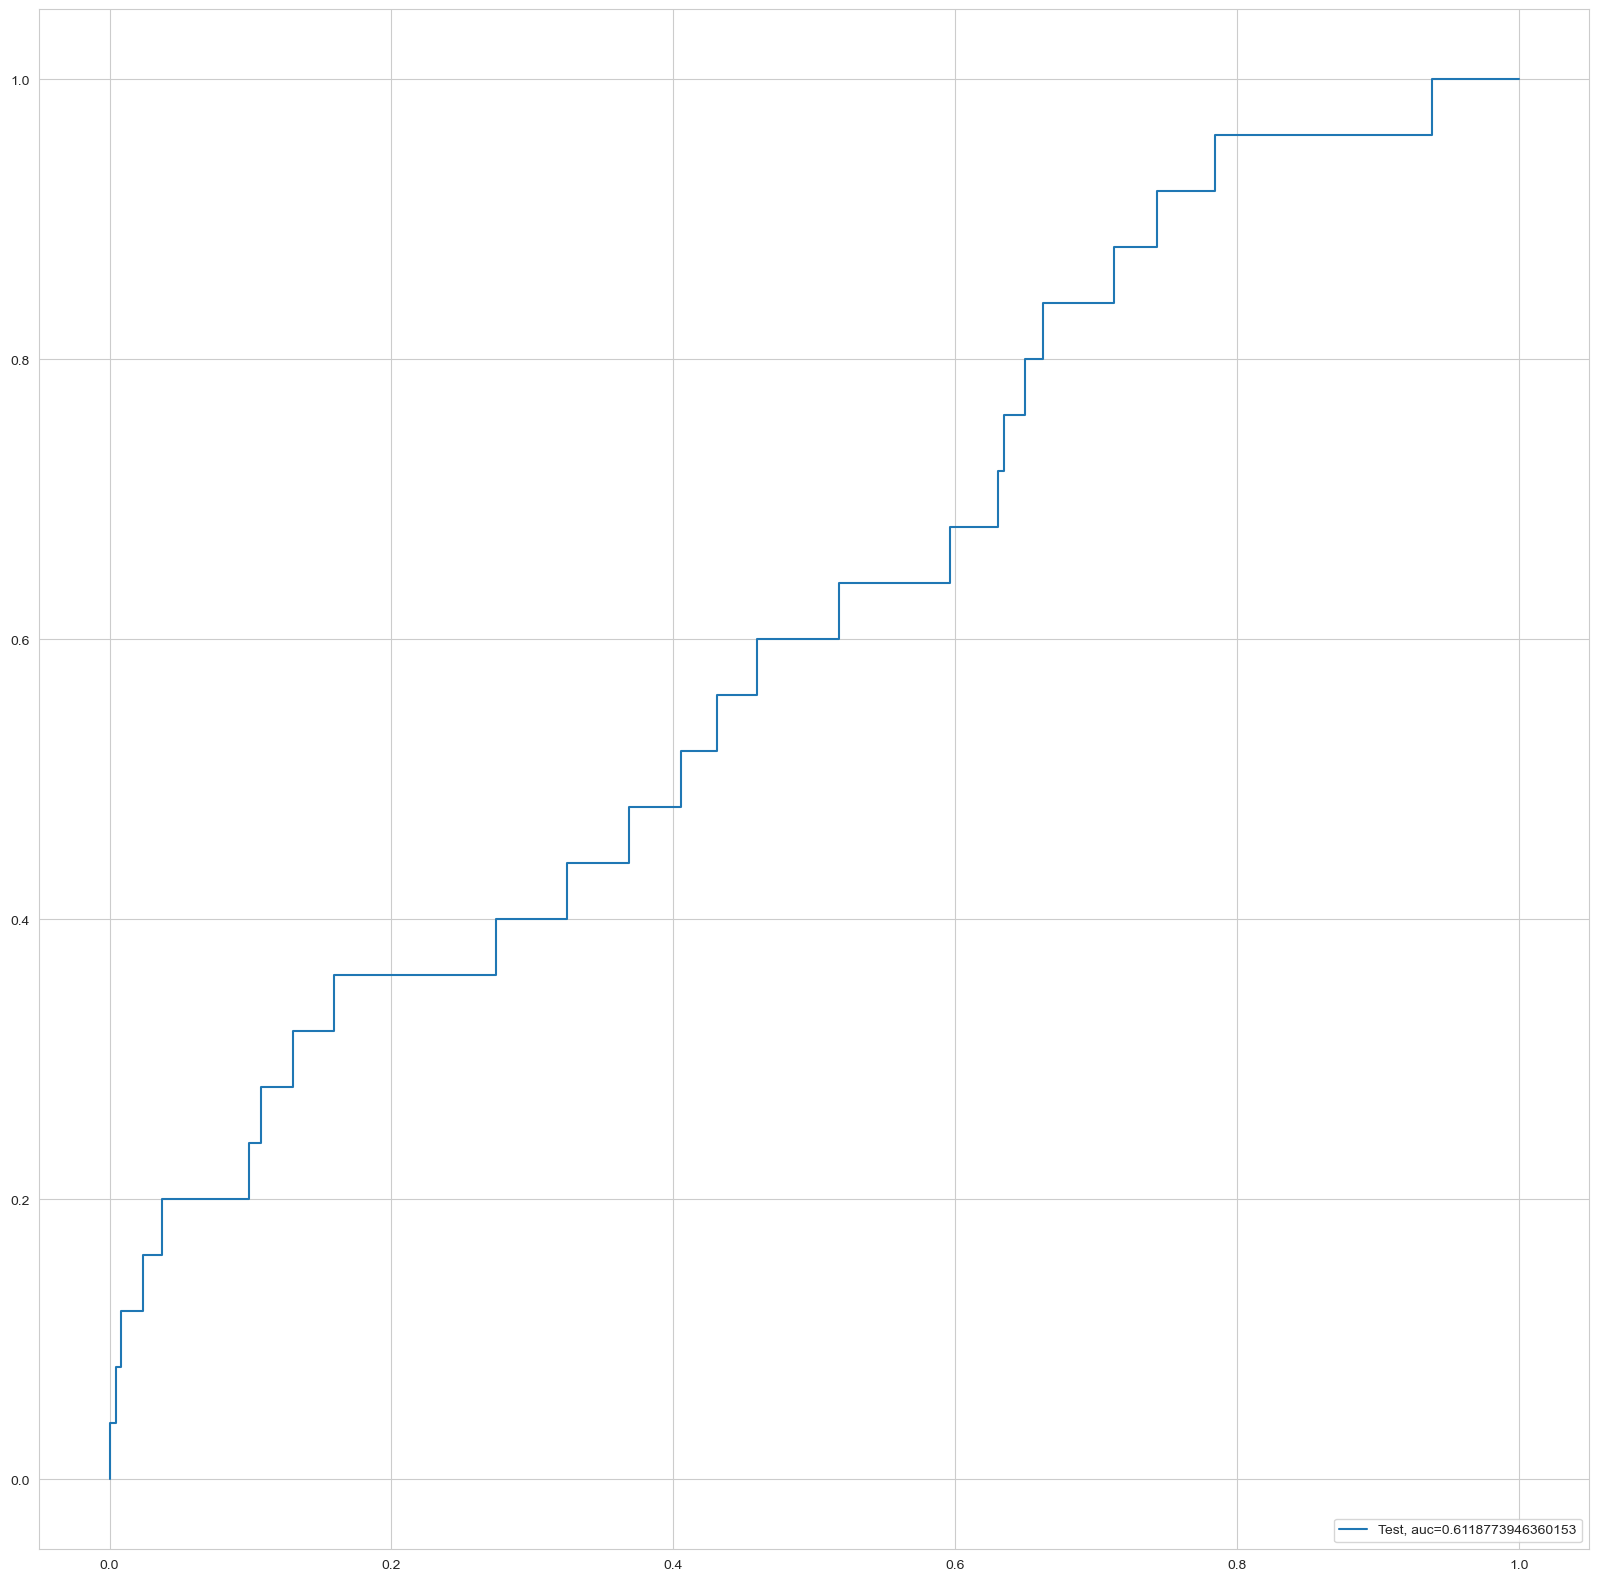

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset: 50.0%


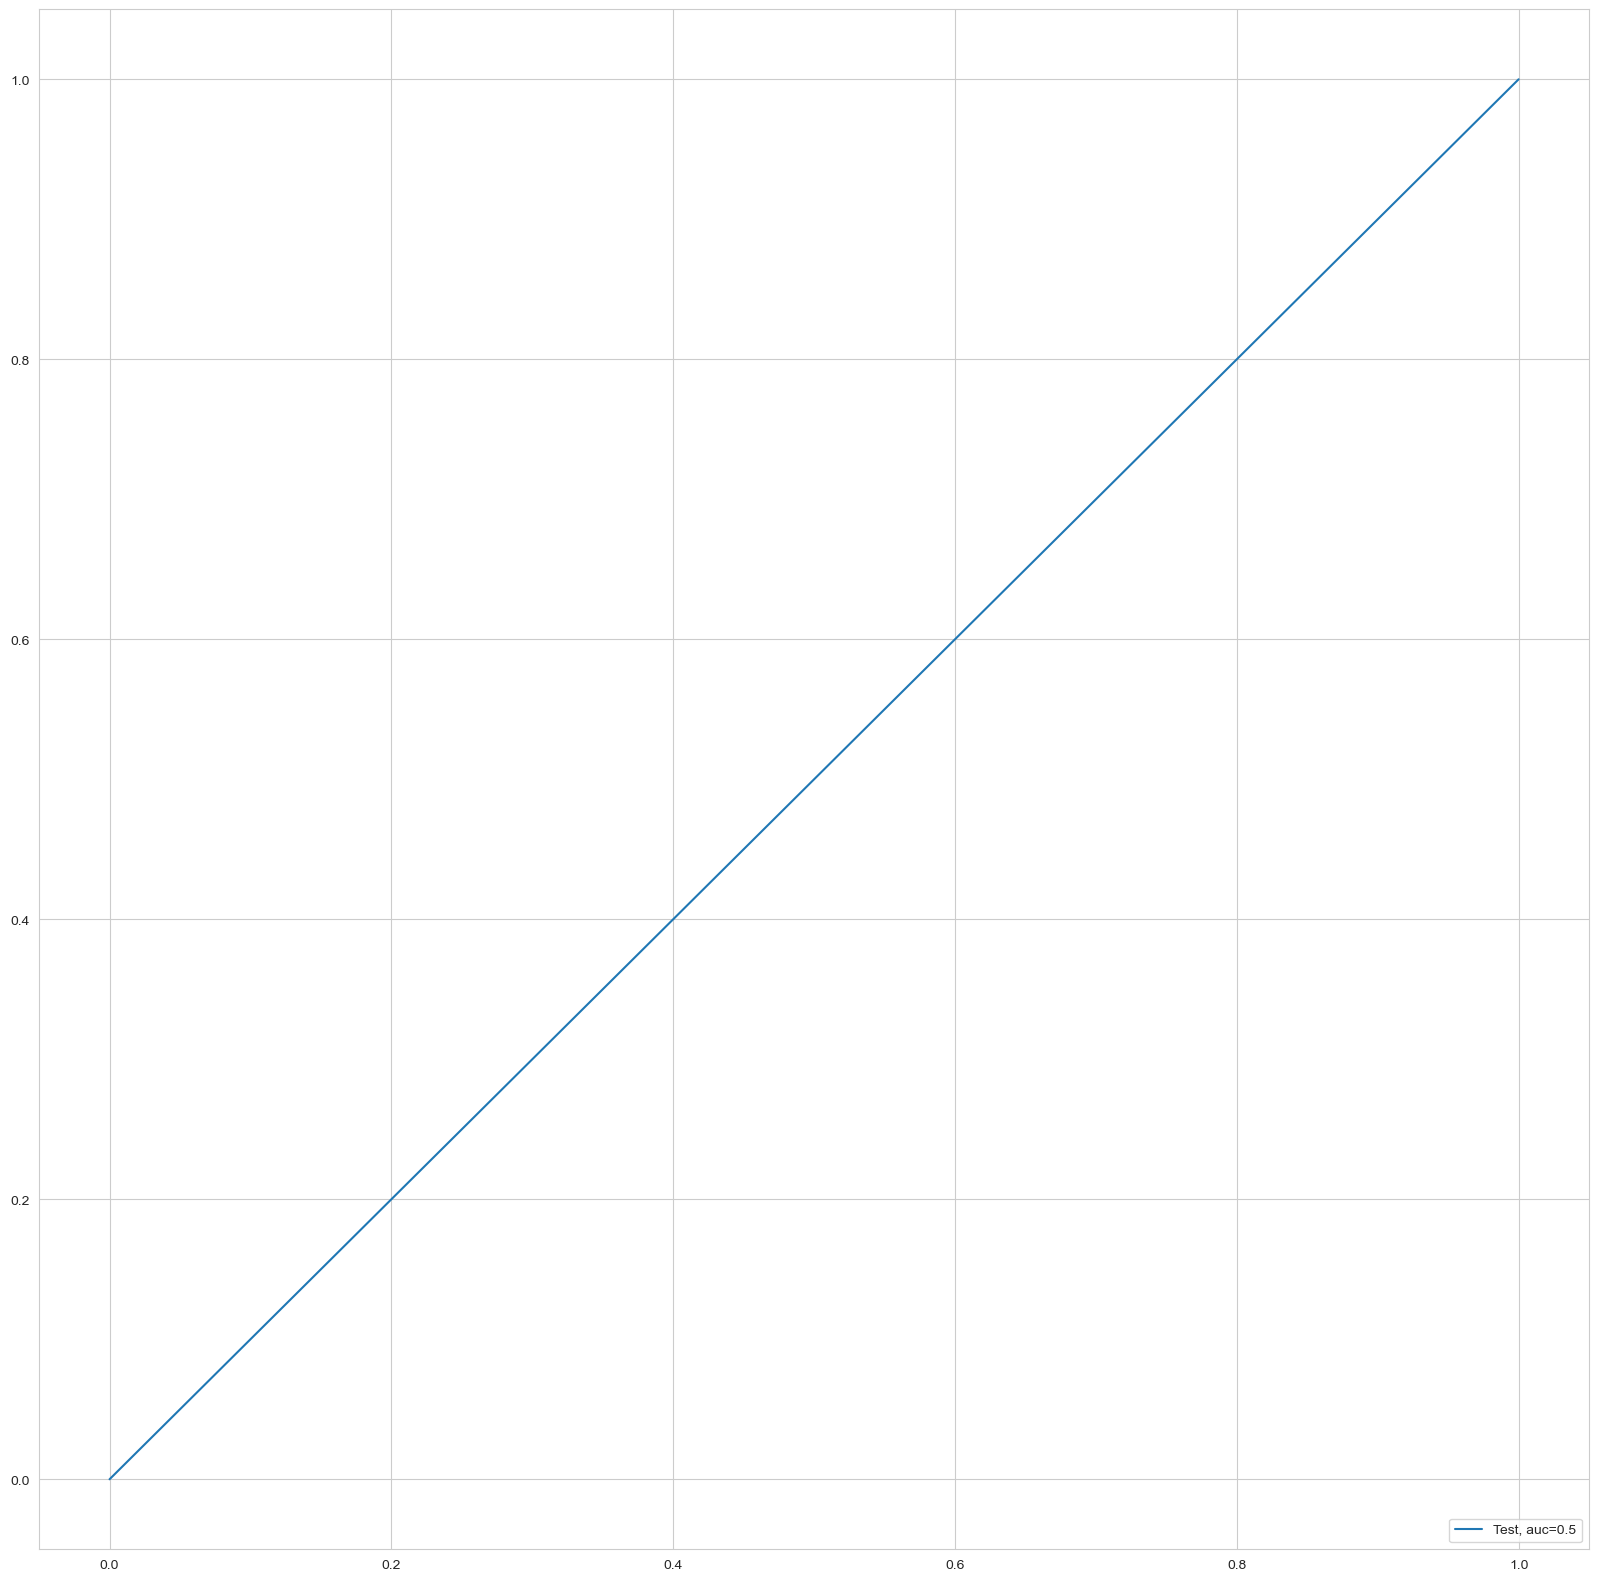

Time Taken by Model: --- 24.700111389160156 seconds ---
--------------------------------------------------------------------------------


In [69]:
Data_Imbalance_Handiling = "SMOTE Oversampling with StratifiedKFold CV "
#Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.701821147050829
Confusion Matrix


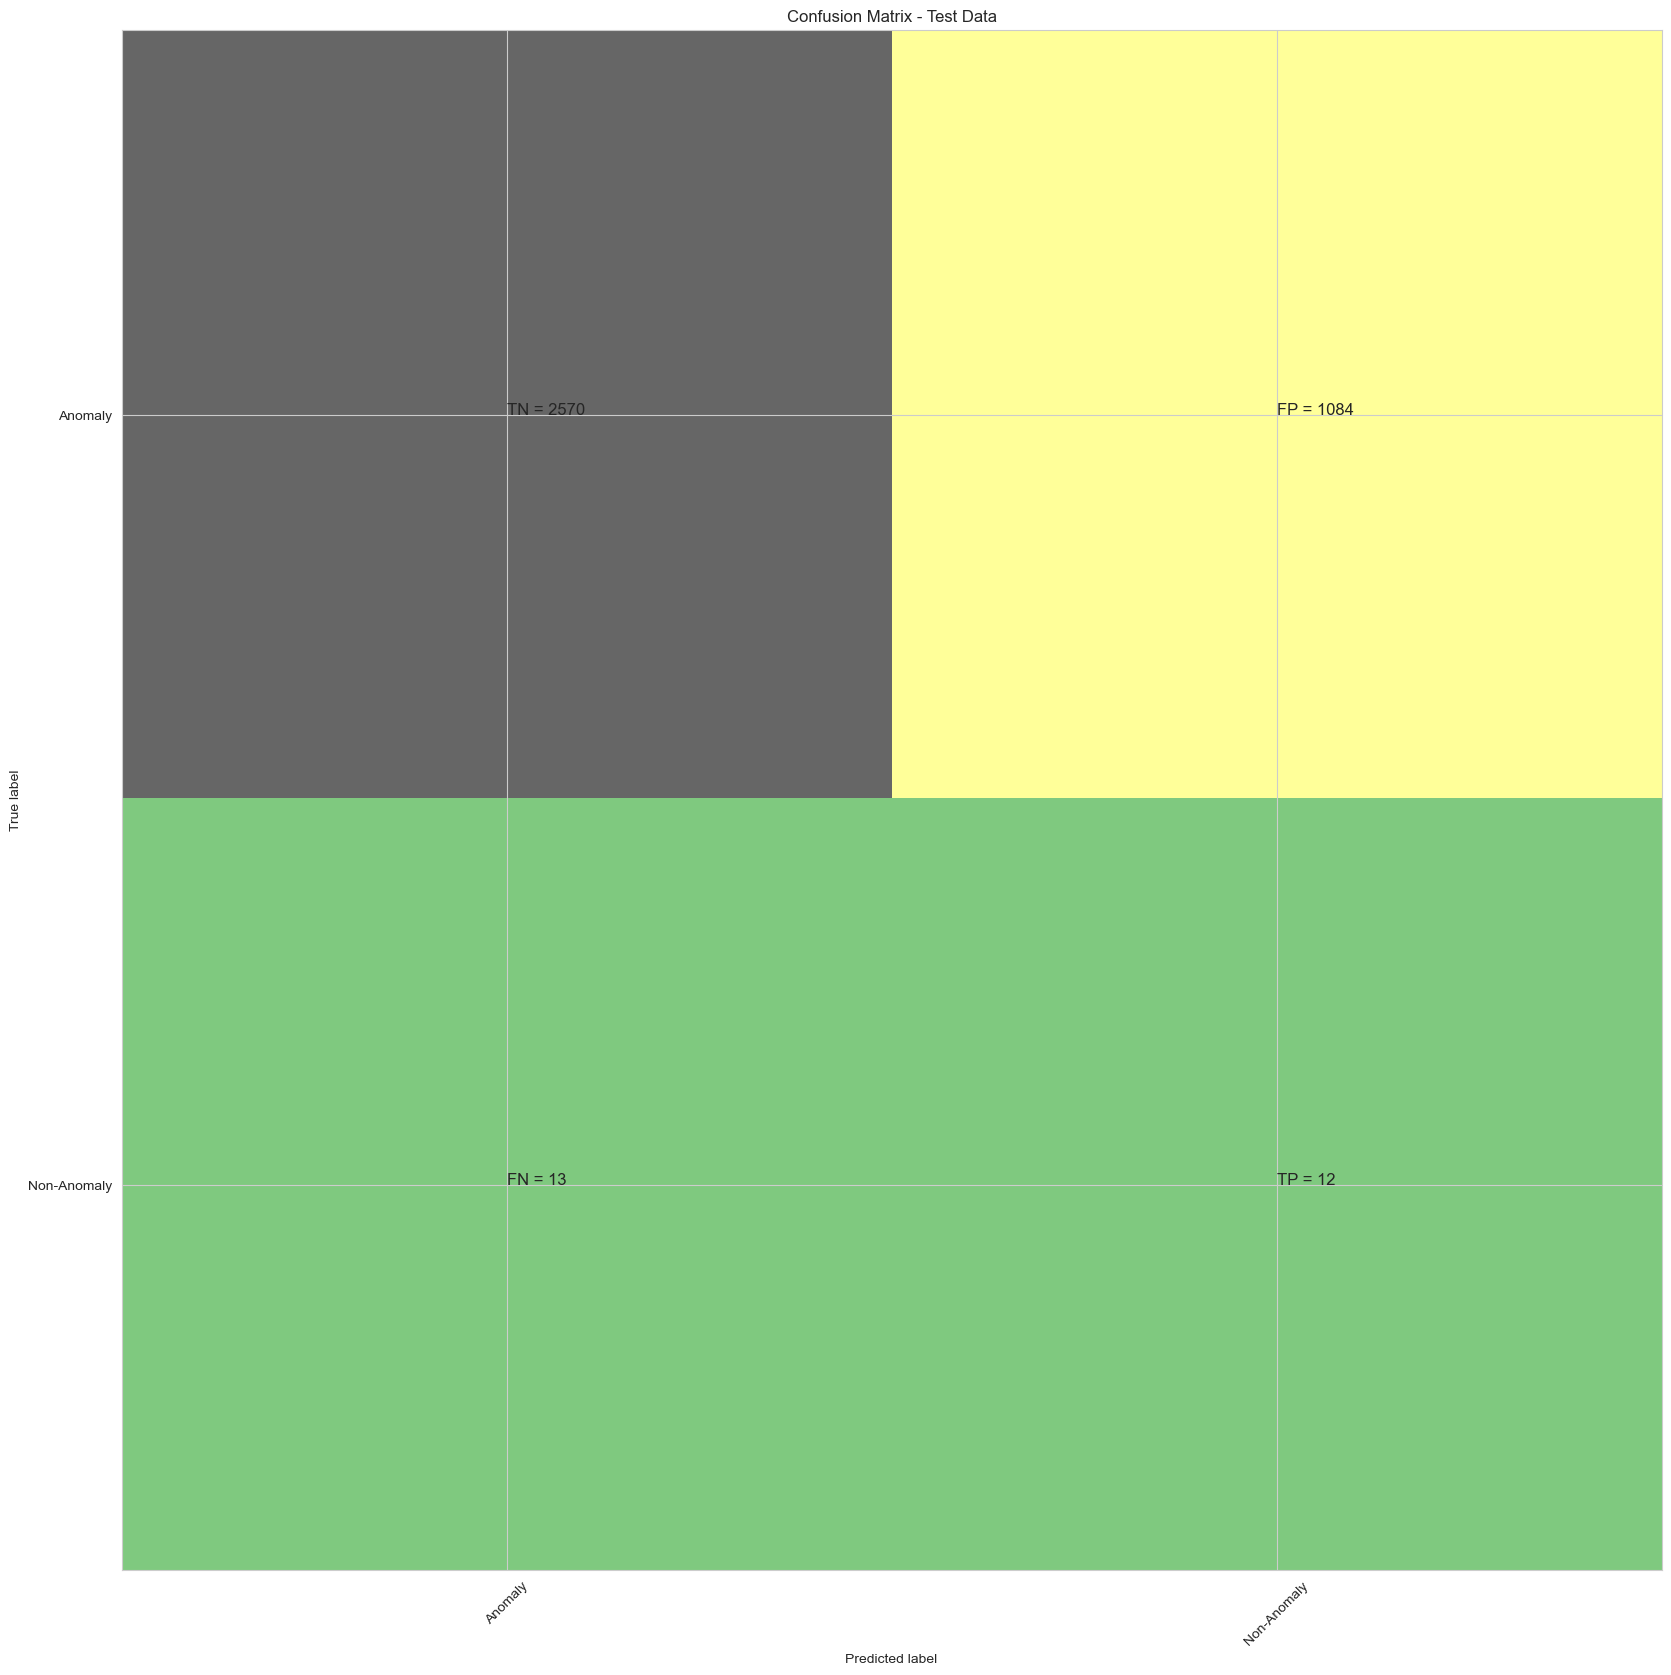

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3654
           1       0.01      0.48      0.02        25

    accuracy                           0.70      3679
   macro avg       0.50      0.59      0.42      3679
weighted avg       0.99      0.70      0.82      3679

KNN roc_value: 0.586135741652983
KNN threshold: 1.0
ROC for the test dataset 58.6%


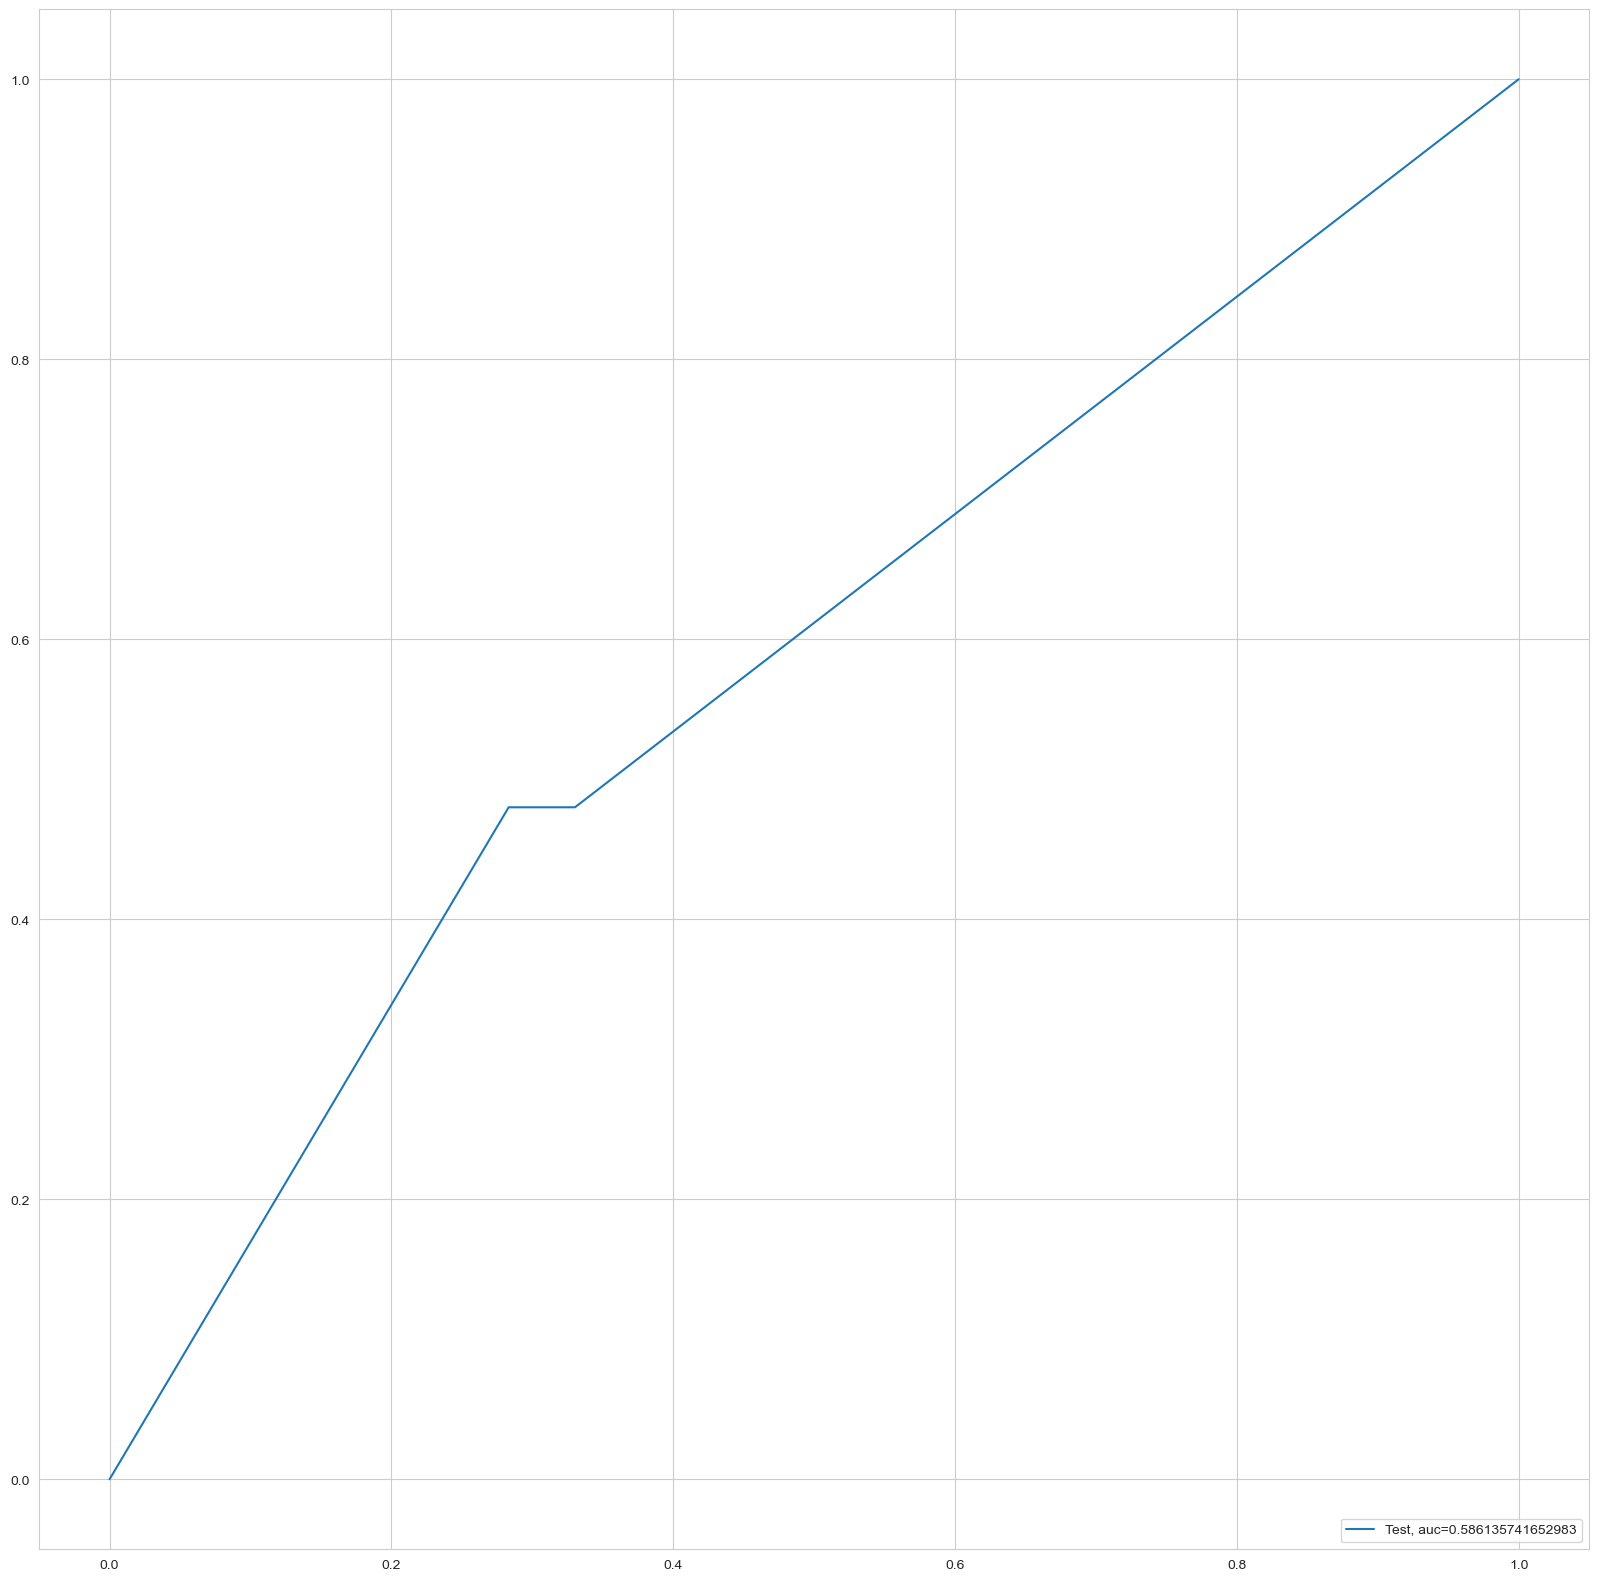

Time Taken by Model: --- 3.3567819595336914 seconds ---
--------------------------------------------------------------------------------


In [70]:
#Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.8570263658602881
Confusion Matrix


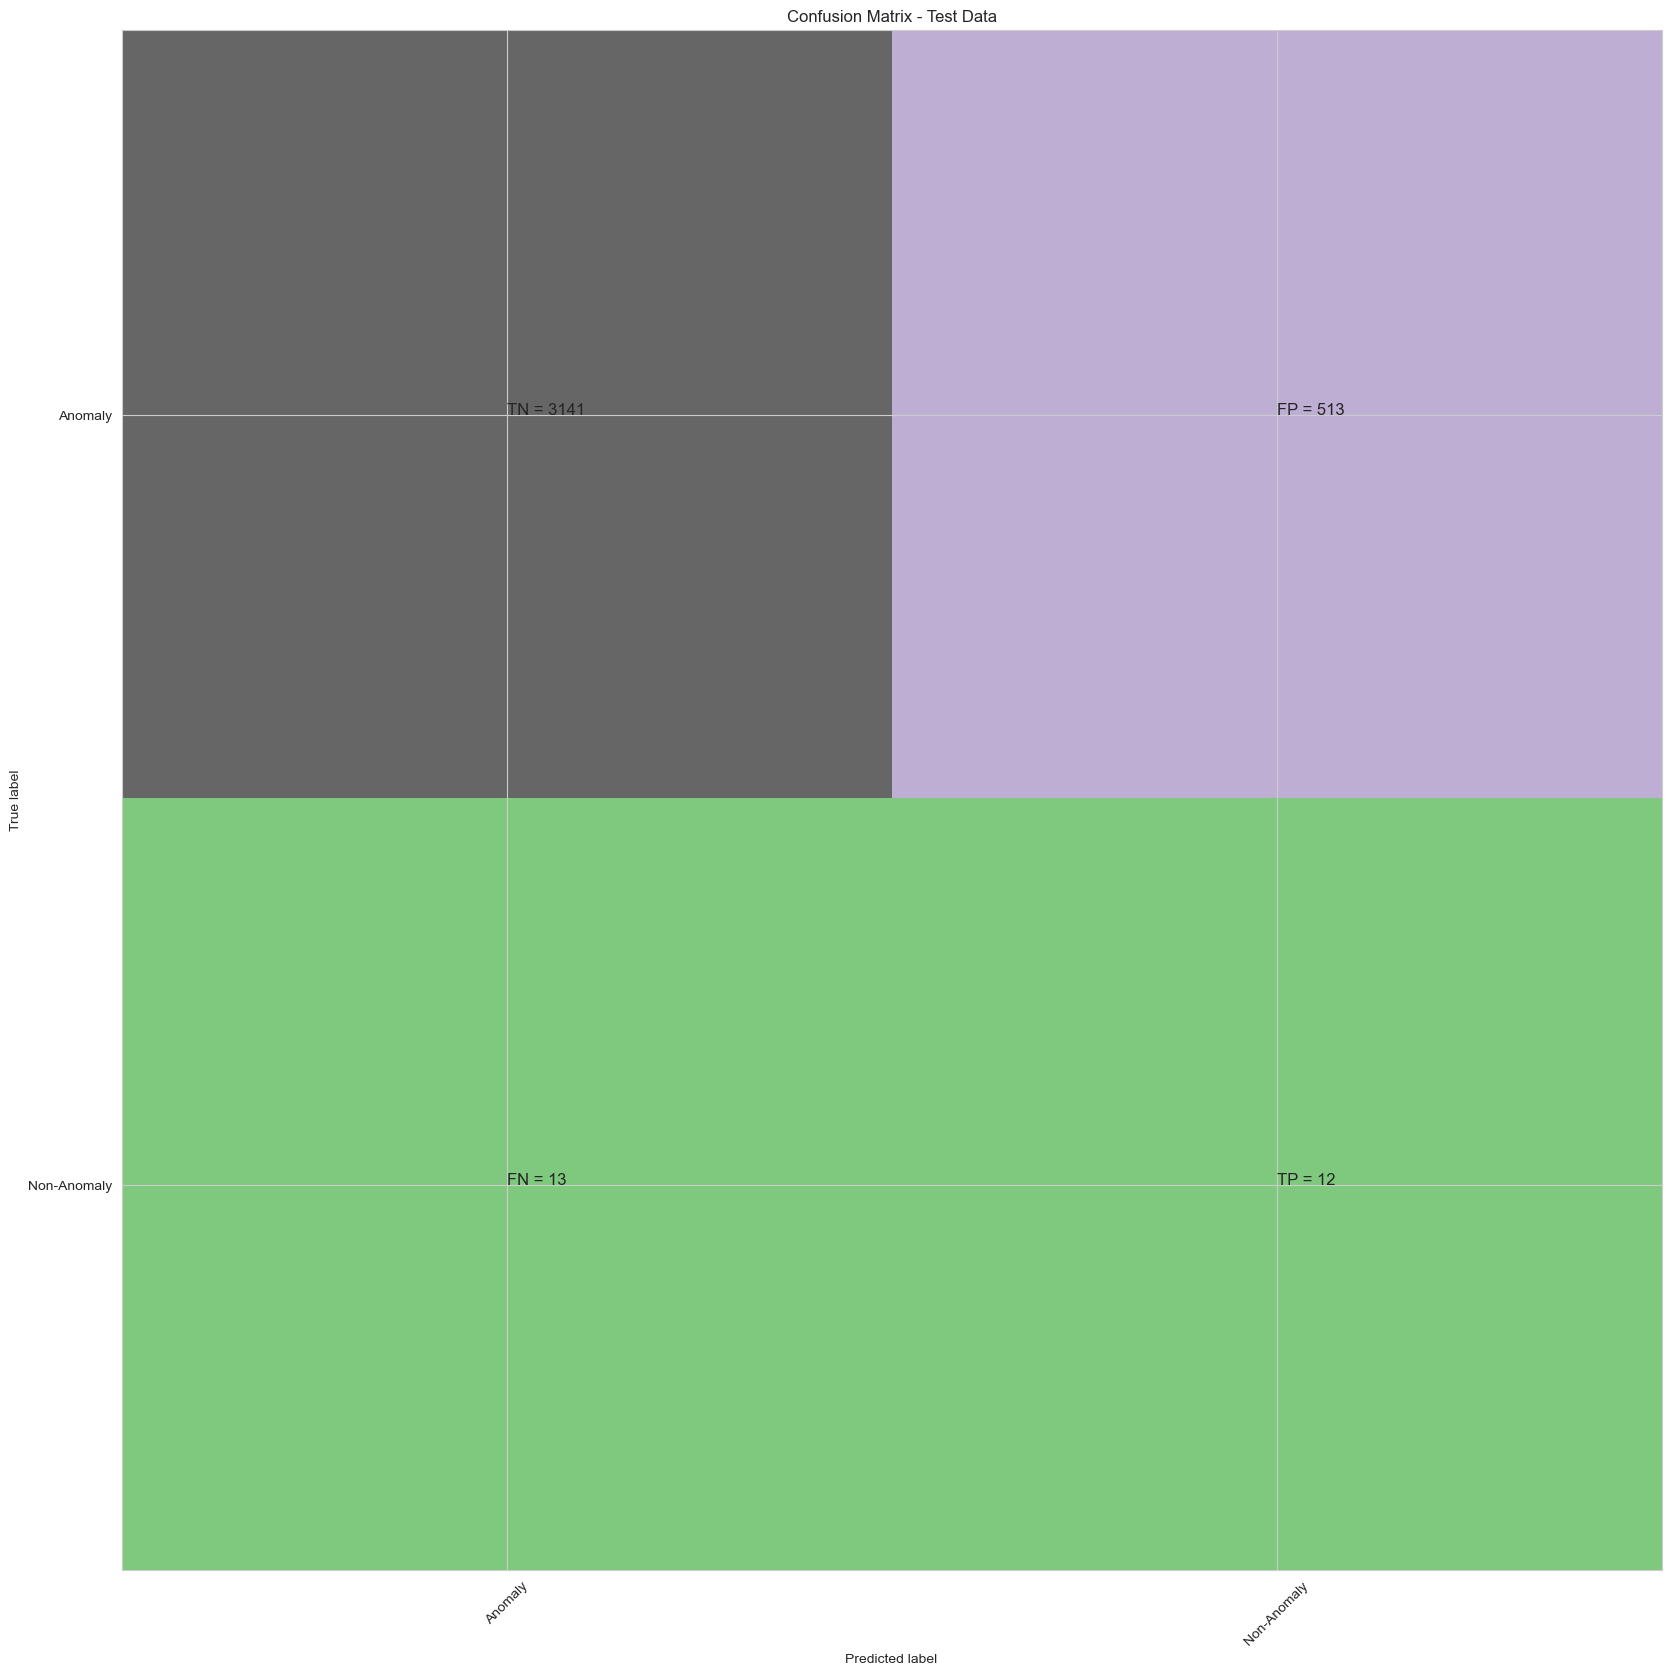

classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3654
           1       0.02      0.48      0.04        25

    accuracy                           0.86      3679
   macro avg       0.51      0.67      0.48      3679
weighted avg       0.99      0.86      0.92      3679

Random Forest roc_value: 0.6447345374931581
Random Forest threshold: 0.42
ROC for the test dataset 64.5%


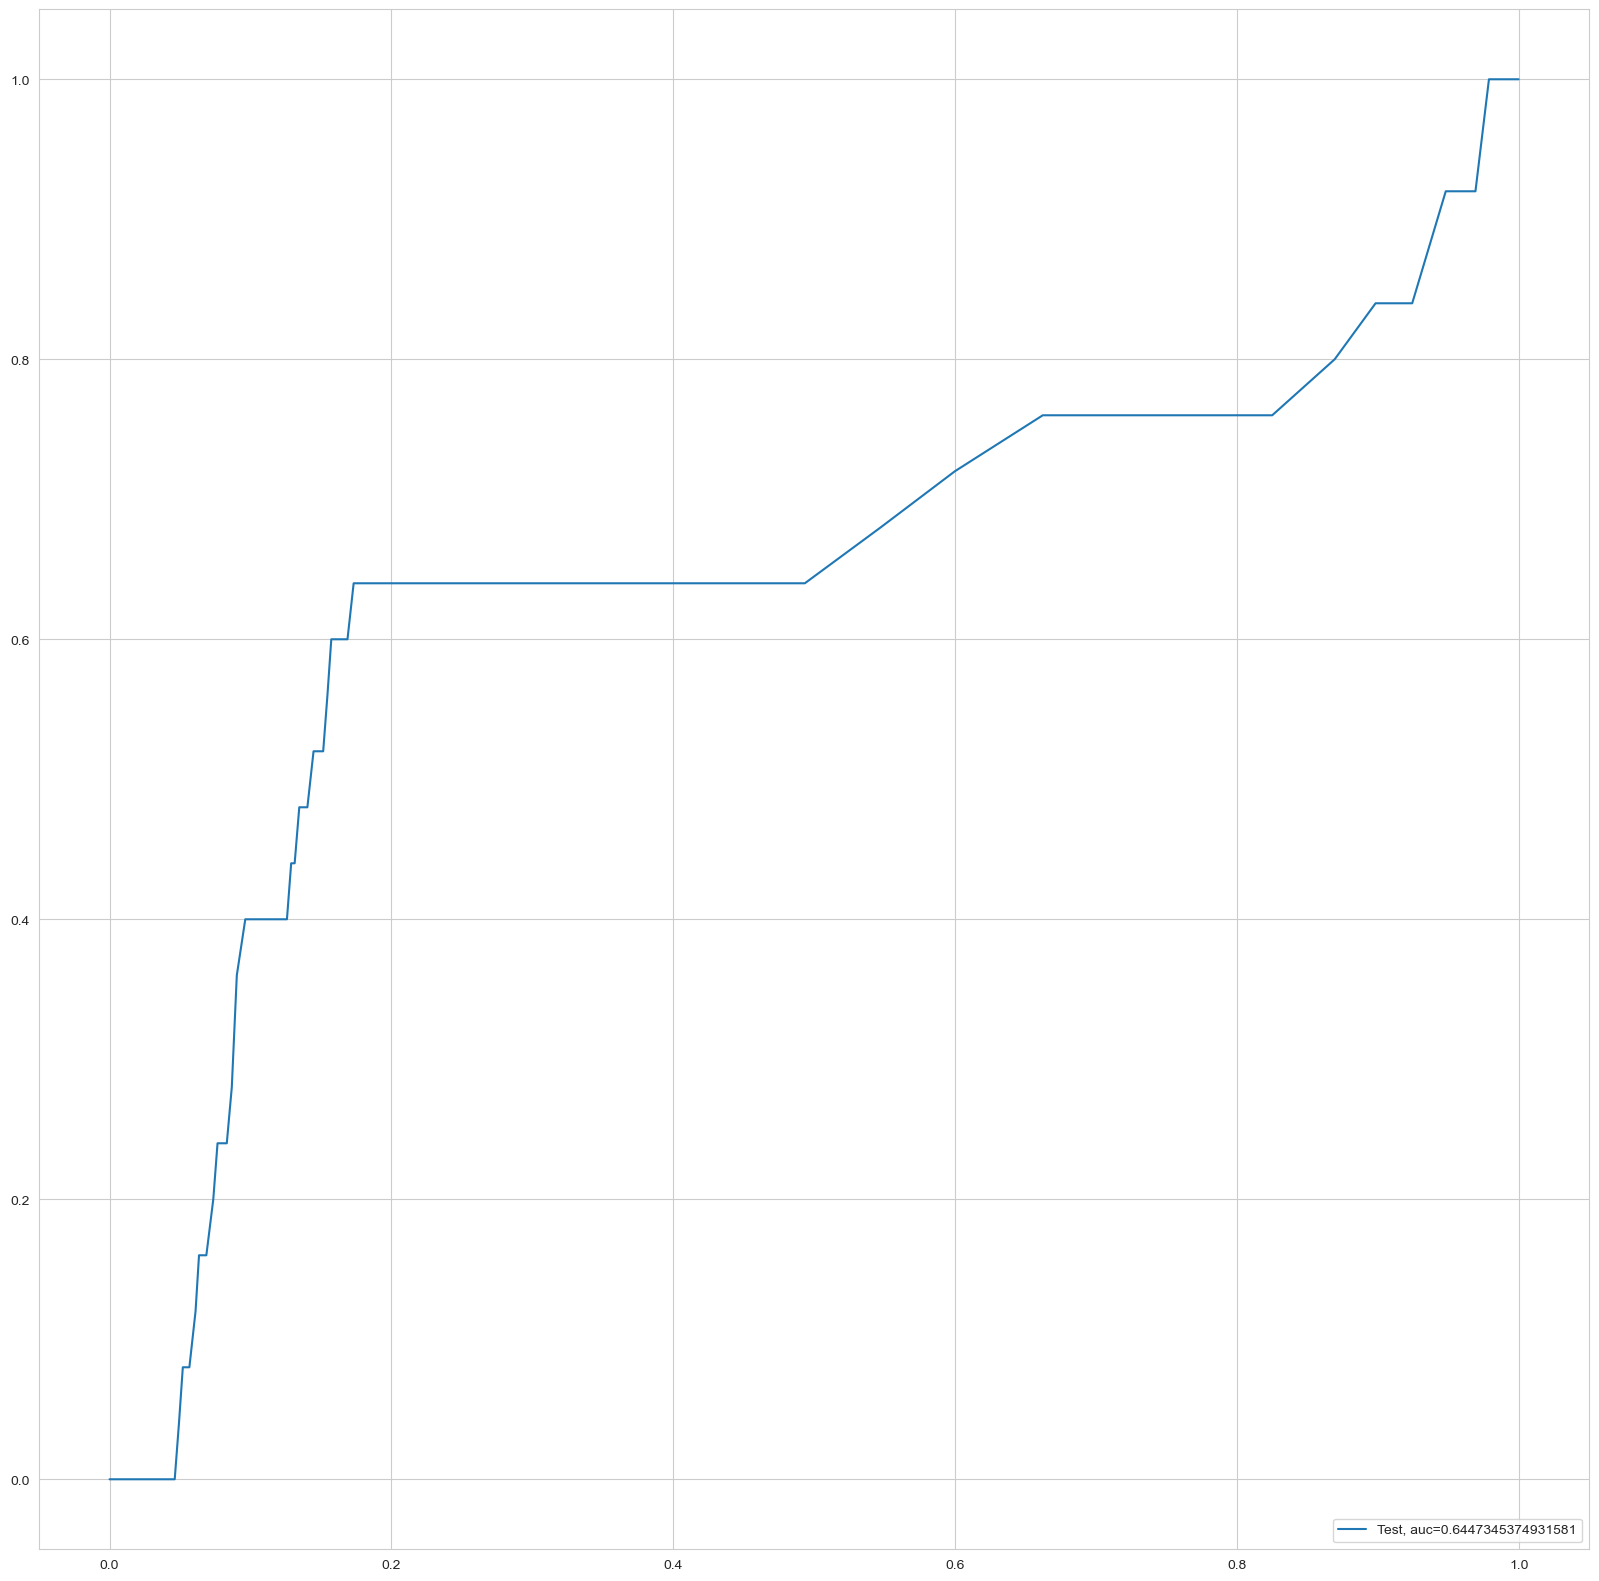

Time Taken by Model: --- 27.039741277694702 seconds ---
--------------------------------------------------------------------------------


In [71]:
#Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.8624626257135091
Confusion Matrix


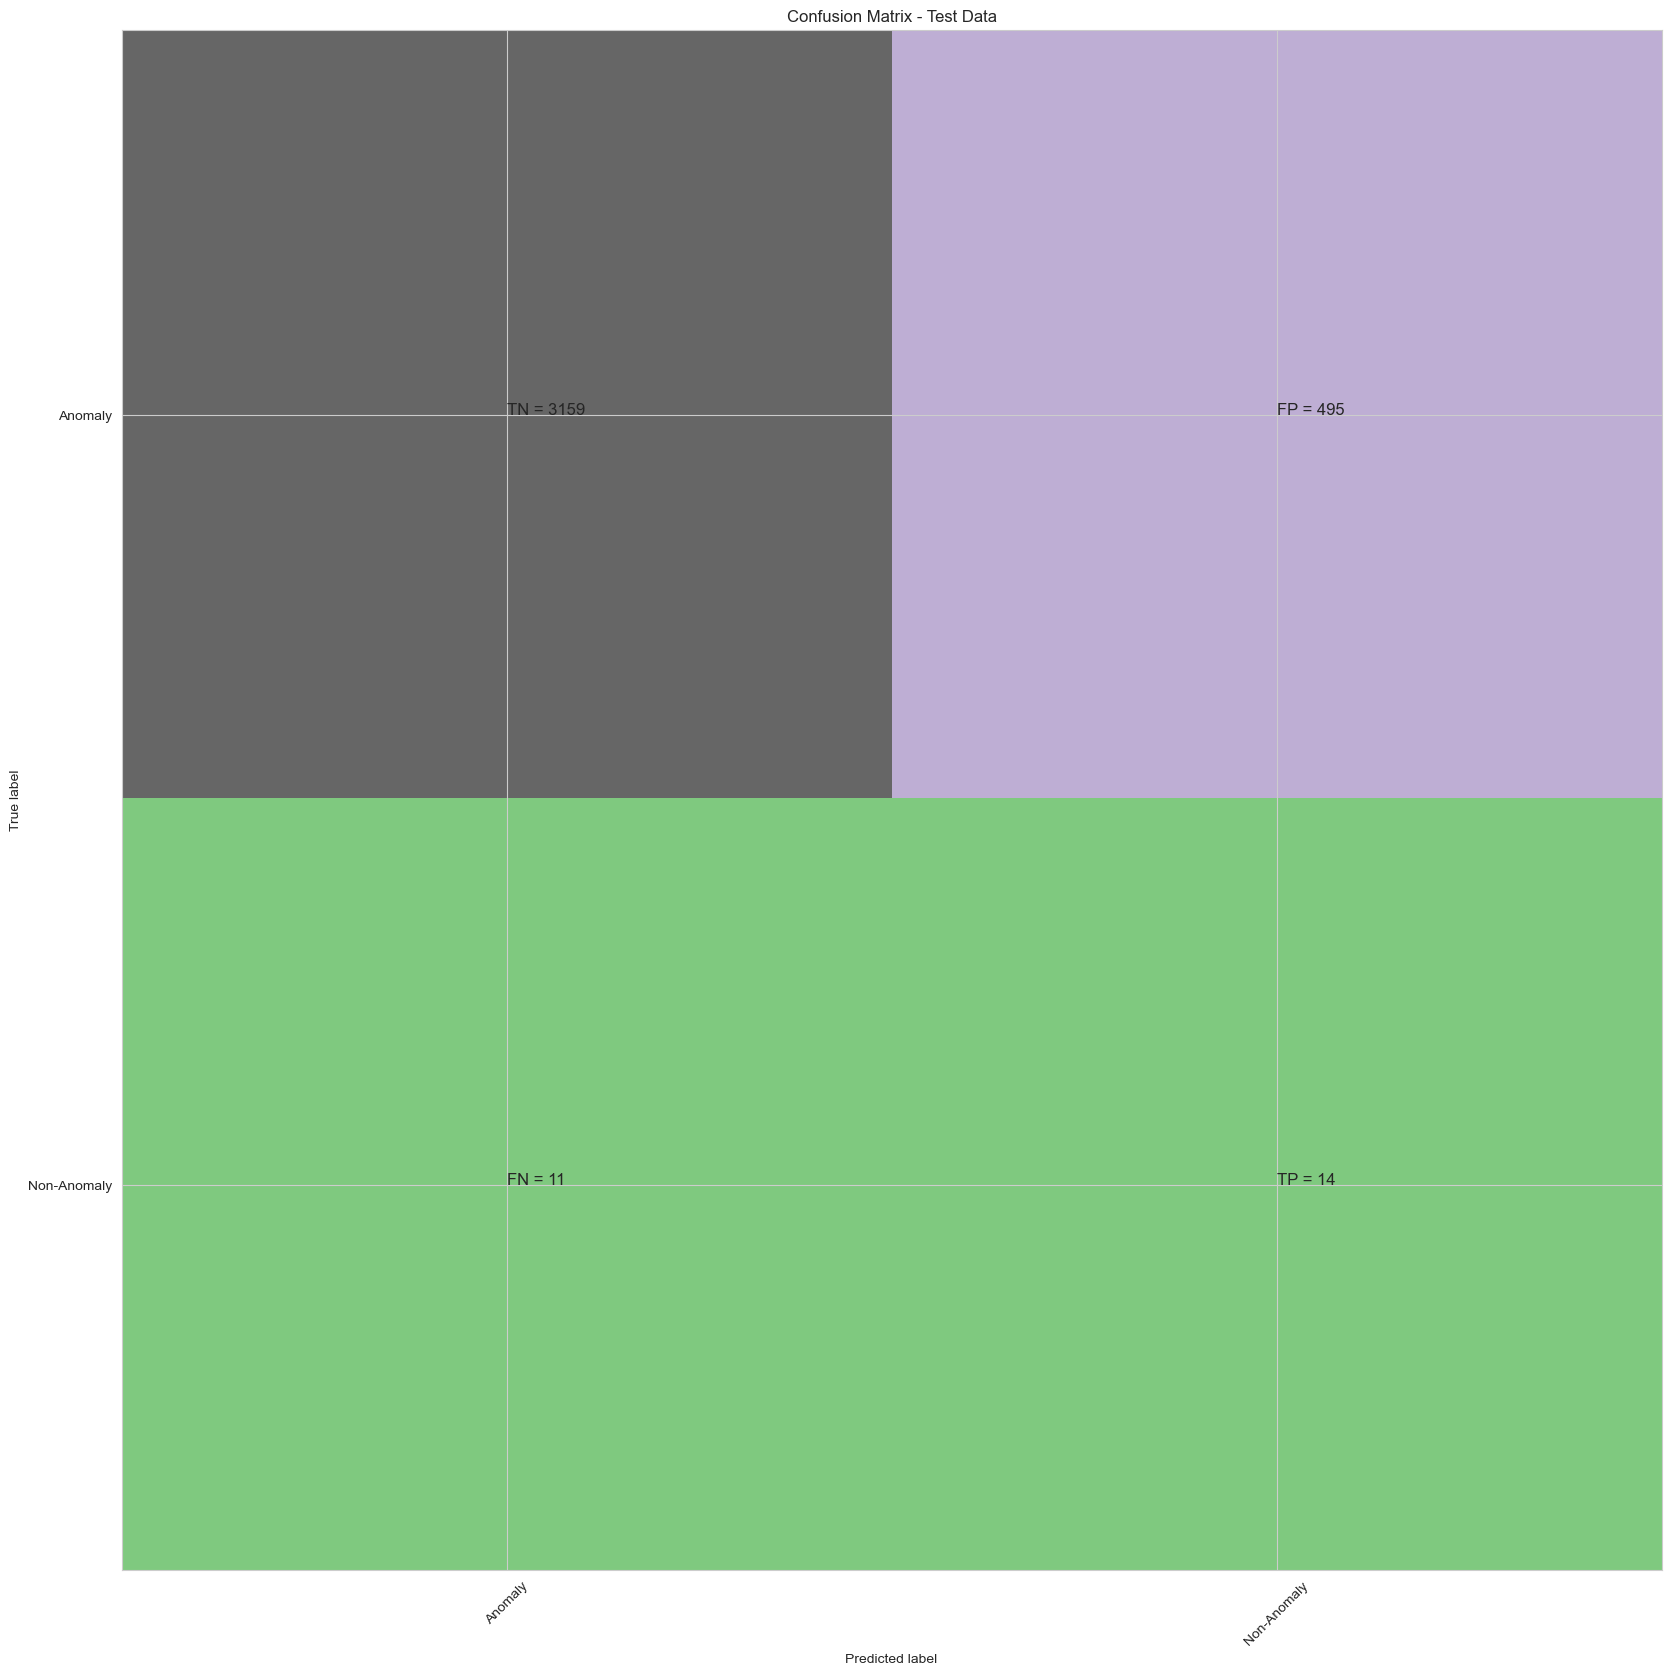

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      3654
           1       0.03      0.56      0.05        25

    accuracy                           0.86      3679
   macro avg       0.51      0.71      0.49      3679
weighted avg       0.99      0.86      0.92      3679

XGboost roc_value: 0.7422550629447181
XGBoost threshold: 0.6802641749382019
ROC for the test dataset 74.2%


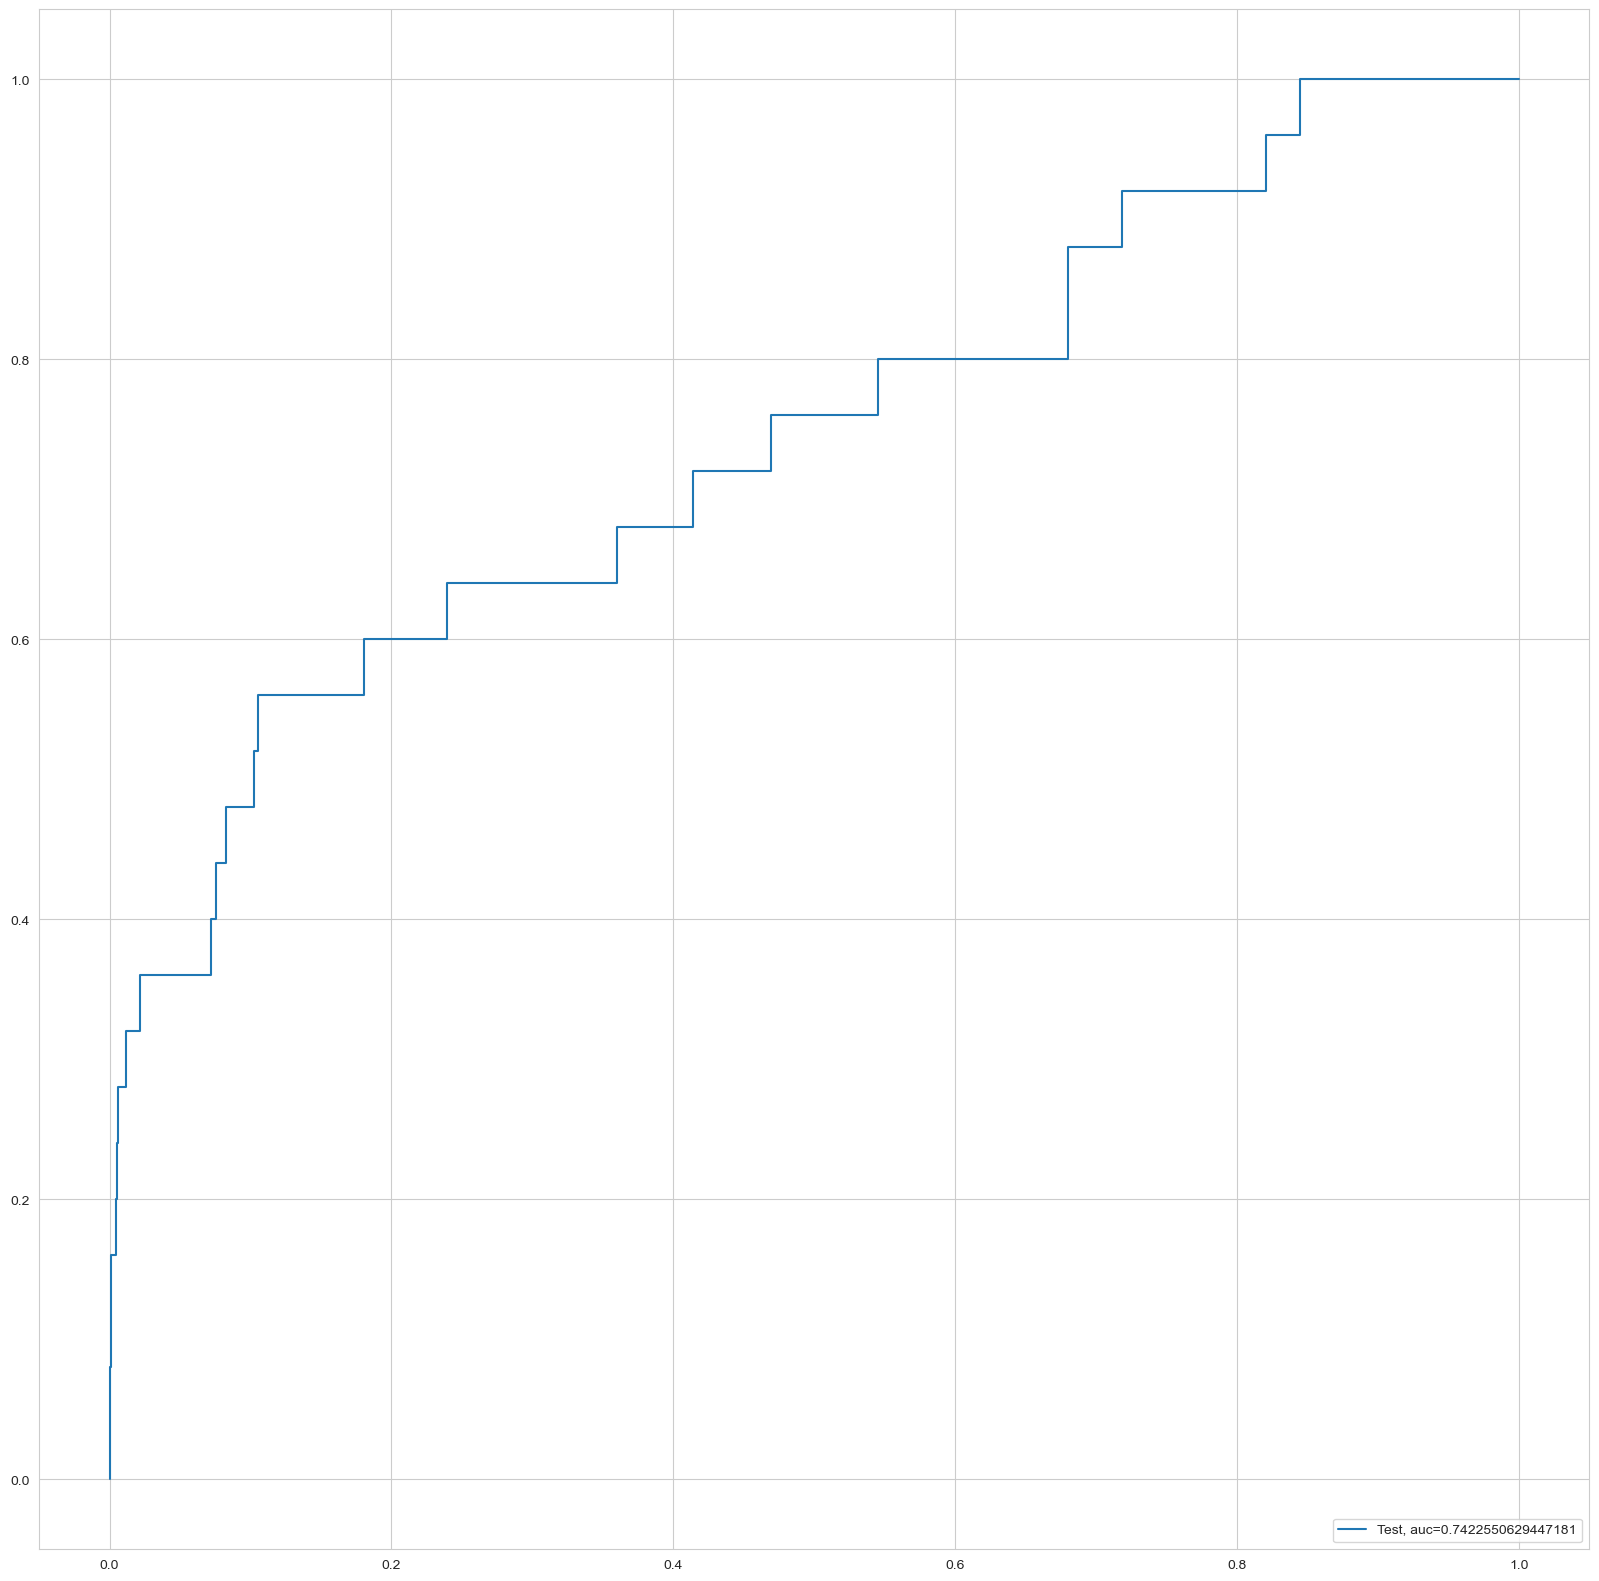

Time Taken by Model: --- 3.548405885696411 seconds ---
--------------------------------------------------------------------------------


In [72]:
#Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [73]:
df_Results


Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7              StratifiedKFold  Cross Validation   
8              StratifiedKFold  Cross Validation   
9              StratifiedKFold  Cross Validation   
10  Random Oversampling with StratifiedKFold CV    
11  Random Oversampling with StratifiedKFold CV    
12  Random Oversampling with StratifiedKFold CV    
13   SMOTE Oversampling with StratifiedKFold CV    
14   SMOTE Oversampling with StratifiedKFold CV    
15   SMOTE Oversampling with StratifiedKFold CV    
16   SMOTE Oversampling with StratifiedKFold CV    
17   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.994022   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.995380   0.895037   0.034348  
2                                    KNN MODEL  0.993205   0.531199   0.200000  
3                                   TREE MODEL  0.994020   0.718905   1.000000  
4                                   TREE MODEL  0.994020   0.758632   1.000000  
5                                Random Forest  0.995379   0.839803   0.060000  
6                                      XGBoost  0.996466   0.854855   0.002054  
7   Logistic Regression with L2 Regularisation  0.182387   0.548703   0.819339  
8   Logistic Regression with L1 Regularisation  0.993748   0.694209   0.108368  
9                                Random Forest  0.941017   0.785840   0.370000  
10                                  TREE MODEL  0.953520   0.619064   1.000000  
11                                  TREE MODEL  0.893449   0.608686   1.000000  
12                               Random Forest  0.933949   0.729907   0.340000  
13  Logistic Regression with L2 Regularisation  0.193803   0.611877   0.668191  
14  Logistic Regression with L1 Regularisation  0.993205   0.500000        inf  
15                                   KNN MODEL  0.701821   0.586136   1.000000  
16                               Random Forest  0.857026   0.644735   0.420000  
17                                     XGBoost  0.862463   0.742255   0.680264

In [74]:
#it seems that the RepeatedKFold Cross Validation XGBoost model performs the best among the options provided, 
#followed closely by the Power Transformer Logistic Regression with L1 Regularization and the RepeatedKFold Cross Validation 
#Random Forest models





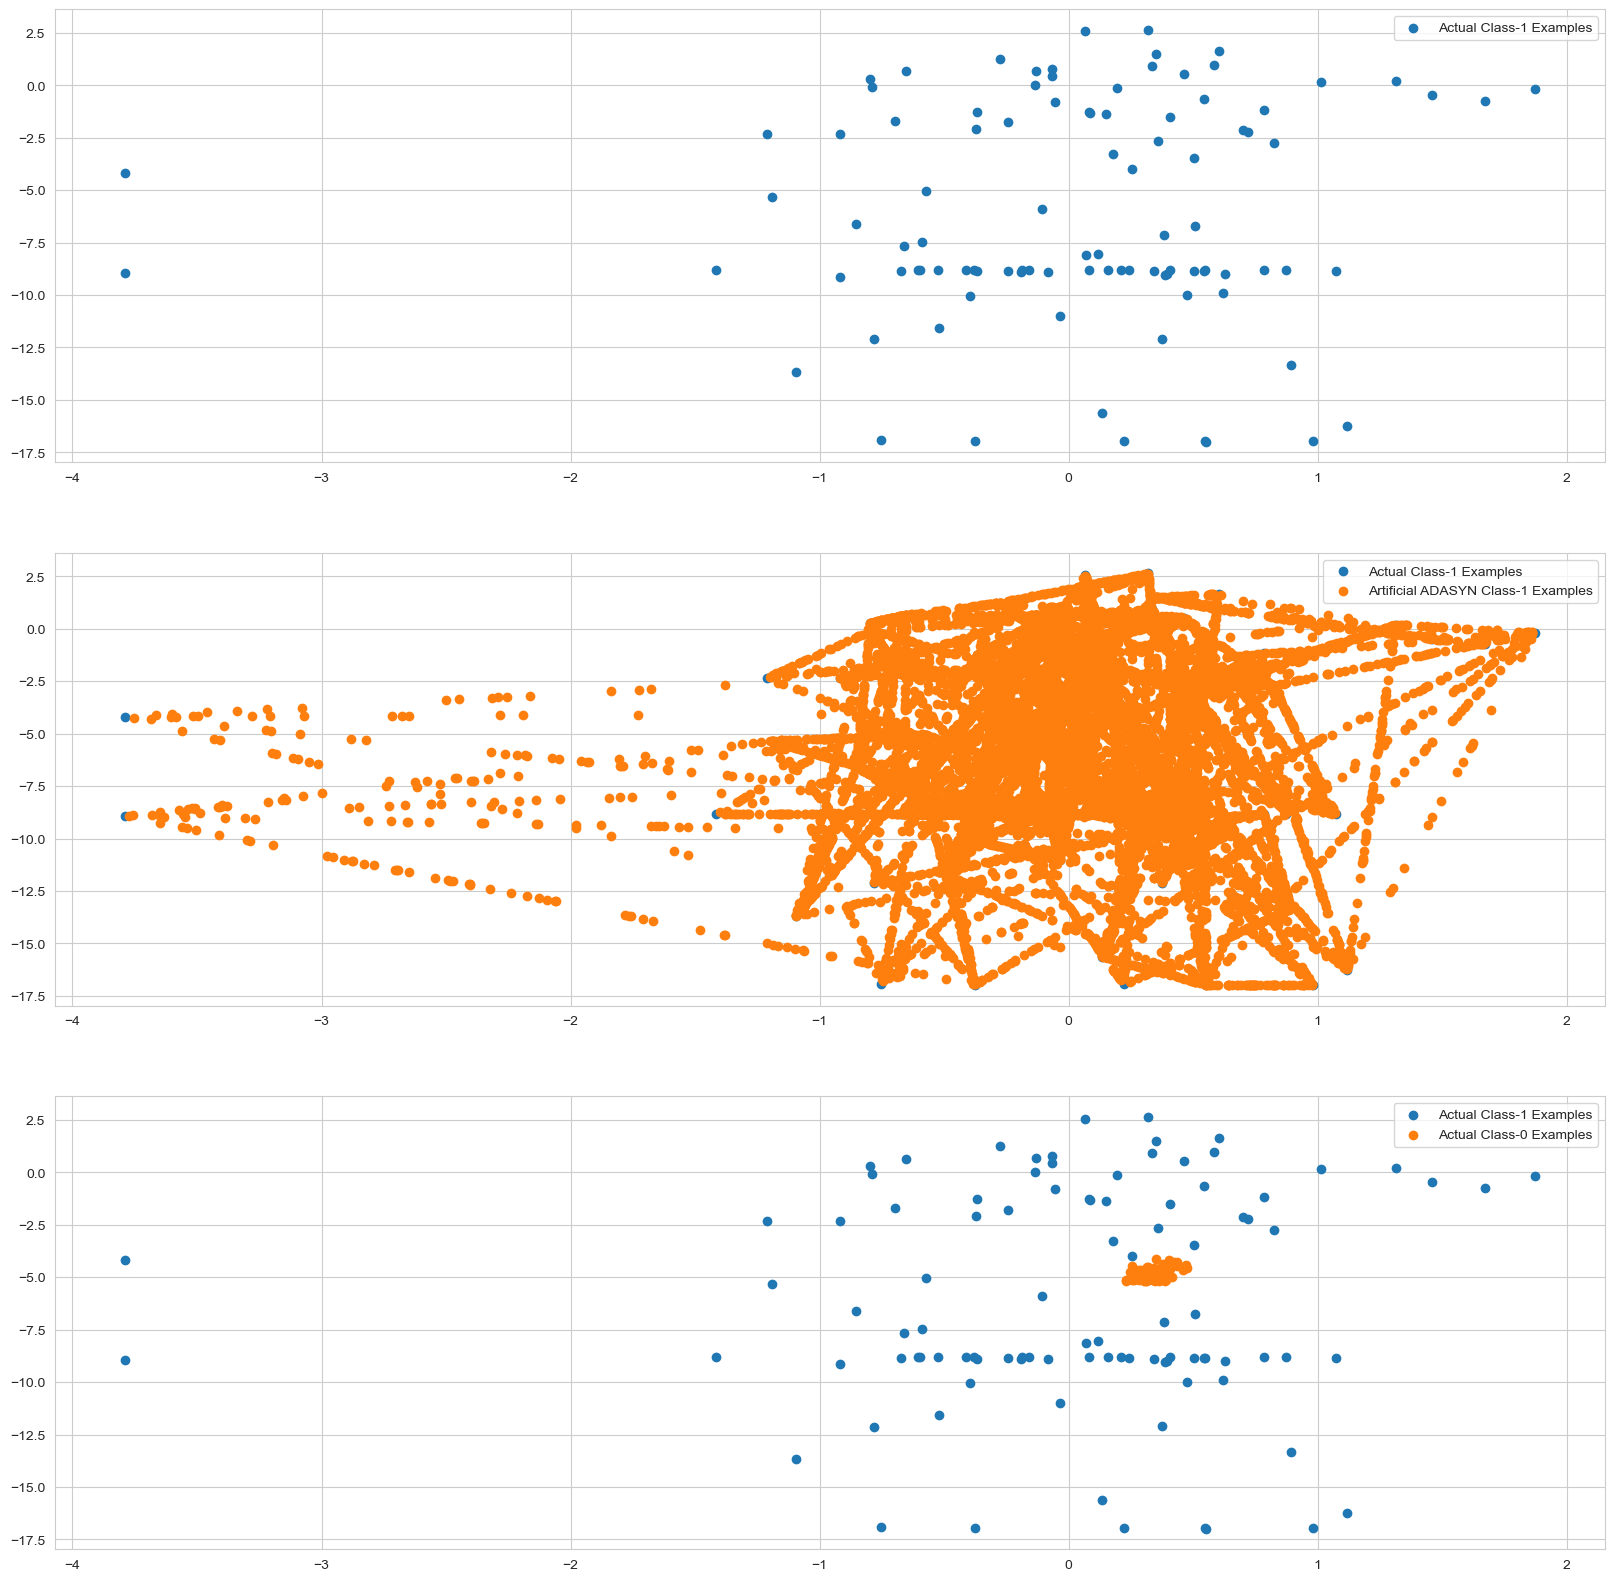

In [75]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np

ADASYN = ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

# Convert DataFrame to numpy arrays
X_train_adasyn_np = X_train_ADASYN.values
y_train_adasyn_np = y_train_ADASYN.values

# Extract artificial samples from ADASYN
X_train_adasyn_1 = X_train_adasyn_np[len(X_train):]

X_train_1 = X_train_np[np.where(y_train == 1.0)]
X_train_0 = X_train_np[np.where(y_train == 0.0)]

plt.rcParams['figure.figsize'] = [20, 20]

# Plotting
fig, axs = plt.subplots(3, 1)

# Plot Actual Class-1 Examples
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[0].legend()

# Plot Actual Class-1 and ADASYN
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[1].scatter(X_train_adasyn_1[:, 0], X_train_adasyn_1[:, 1], label='Artificial ADASYN Class-1 Examples')
axs[1].legend()

# Plot Actual Class-1 and Class-0 
axs[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axs[2].legend()

plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
  #Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.6784596710393337
Max auc_roc for l1: 0.5
Parameters for l2 regularizations
[[-1.20078150e-06 -2.01031346e-04 -2.89831250e-04  5.52828205e-04
  -1.08361516e-06 -4.58495197e-04  5.43942907e-07  2.64915125e-08
   1.33117547e-06  5.59945925e-07 -3.89660123e-05 -5.19201244e-06
  -3.56651511e-04 -7.88295588e-07  3.85659614e-07 -6.01986528e-06
  -4.51247712e-05 -5.30503511e-05 -1.19077193e-04  3.47449669e-07
  -1.88813809e-06 -7.26035576e-06  4.21351692e-05  1.78049192e-06
   7.60579480e-05 -1.34057107e-05 -4.34958225e-06 -8.00961765e-05
  -1.61521016e-03  8.22267058e-08 -1.04596929e-06  3.78946443e-05
  -1.13787396e-09 -8.31654629e-04 -1.20191268e-05 -1.85045107e-06
  -2.27806650e-06  6.04767253e-07  7.05613352e-07 -7.18346627e-06
   1.32744033e-05  5.18518244e-04 -2.21388488e-05 -5.54882791e-06
  -3.99660678e-06  1.22440588e-06 -5.43913876e-04  2.48343307e-06
   8.13314141e-04 -4.23738479e-05  1.86413082e-04 -8.84379956

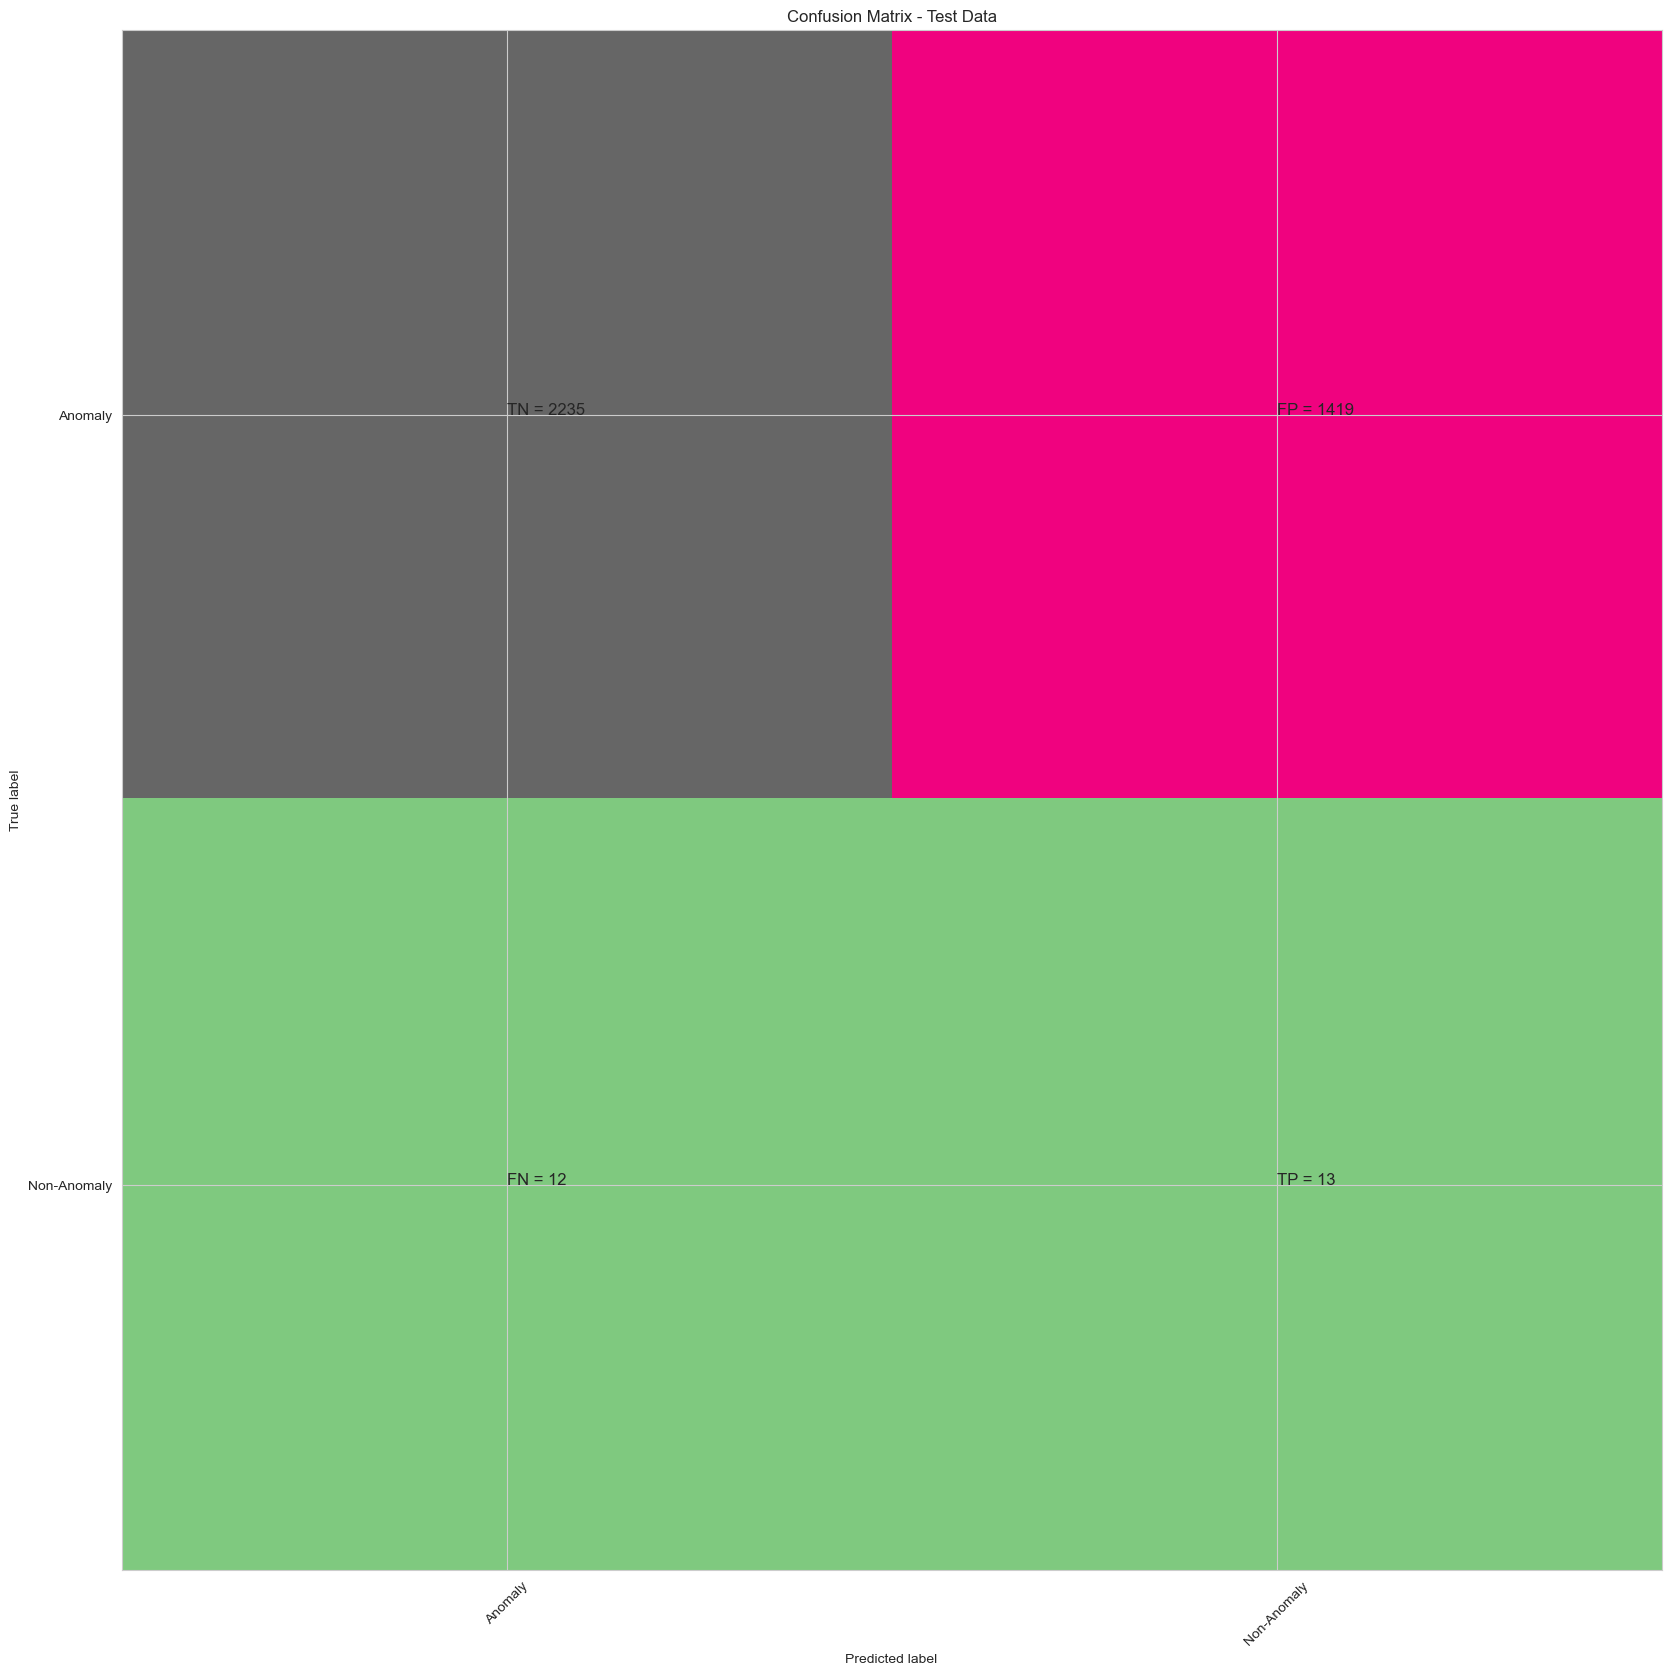

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.61      0.76      3654
           1       0.01      0.52      0.02        25

    accuracy                           0.61      3679
   macro avg       0.50      0.57      0.39      3679
weighted avg       0.99      0.61      0.75      3679

Accuracy of Logistic model with l1 regularization: 0.9932046751834738
Confusion Matrix


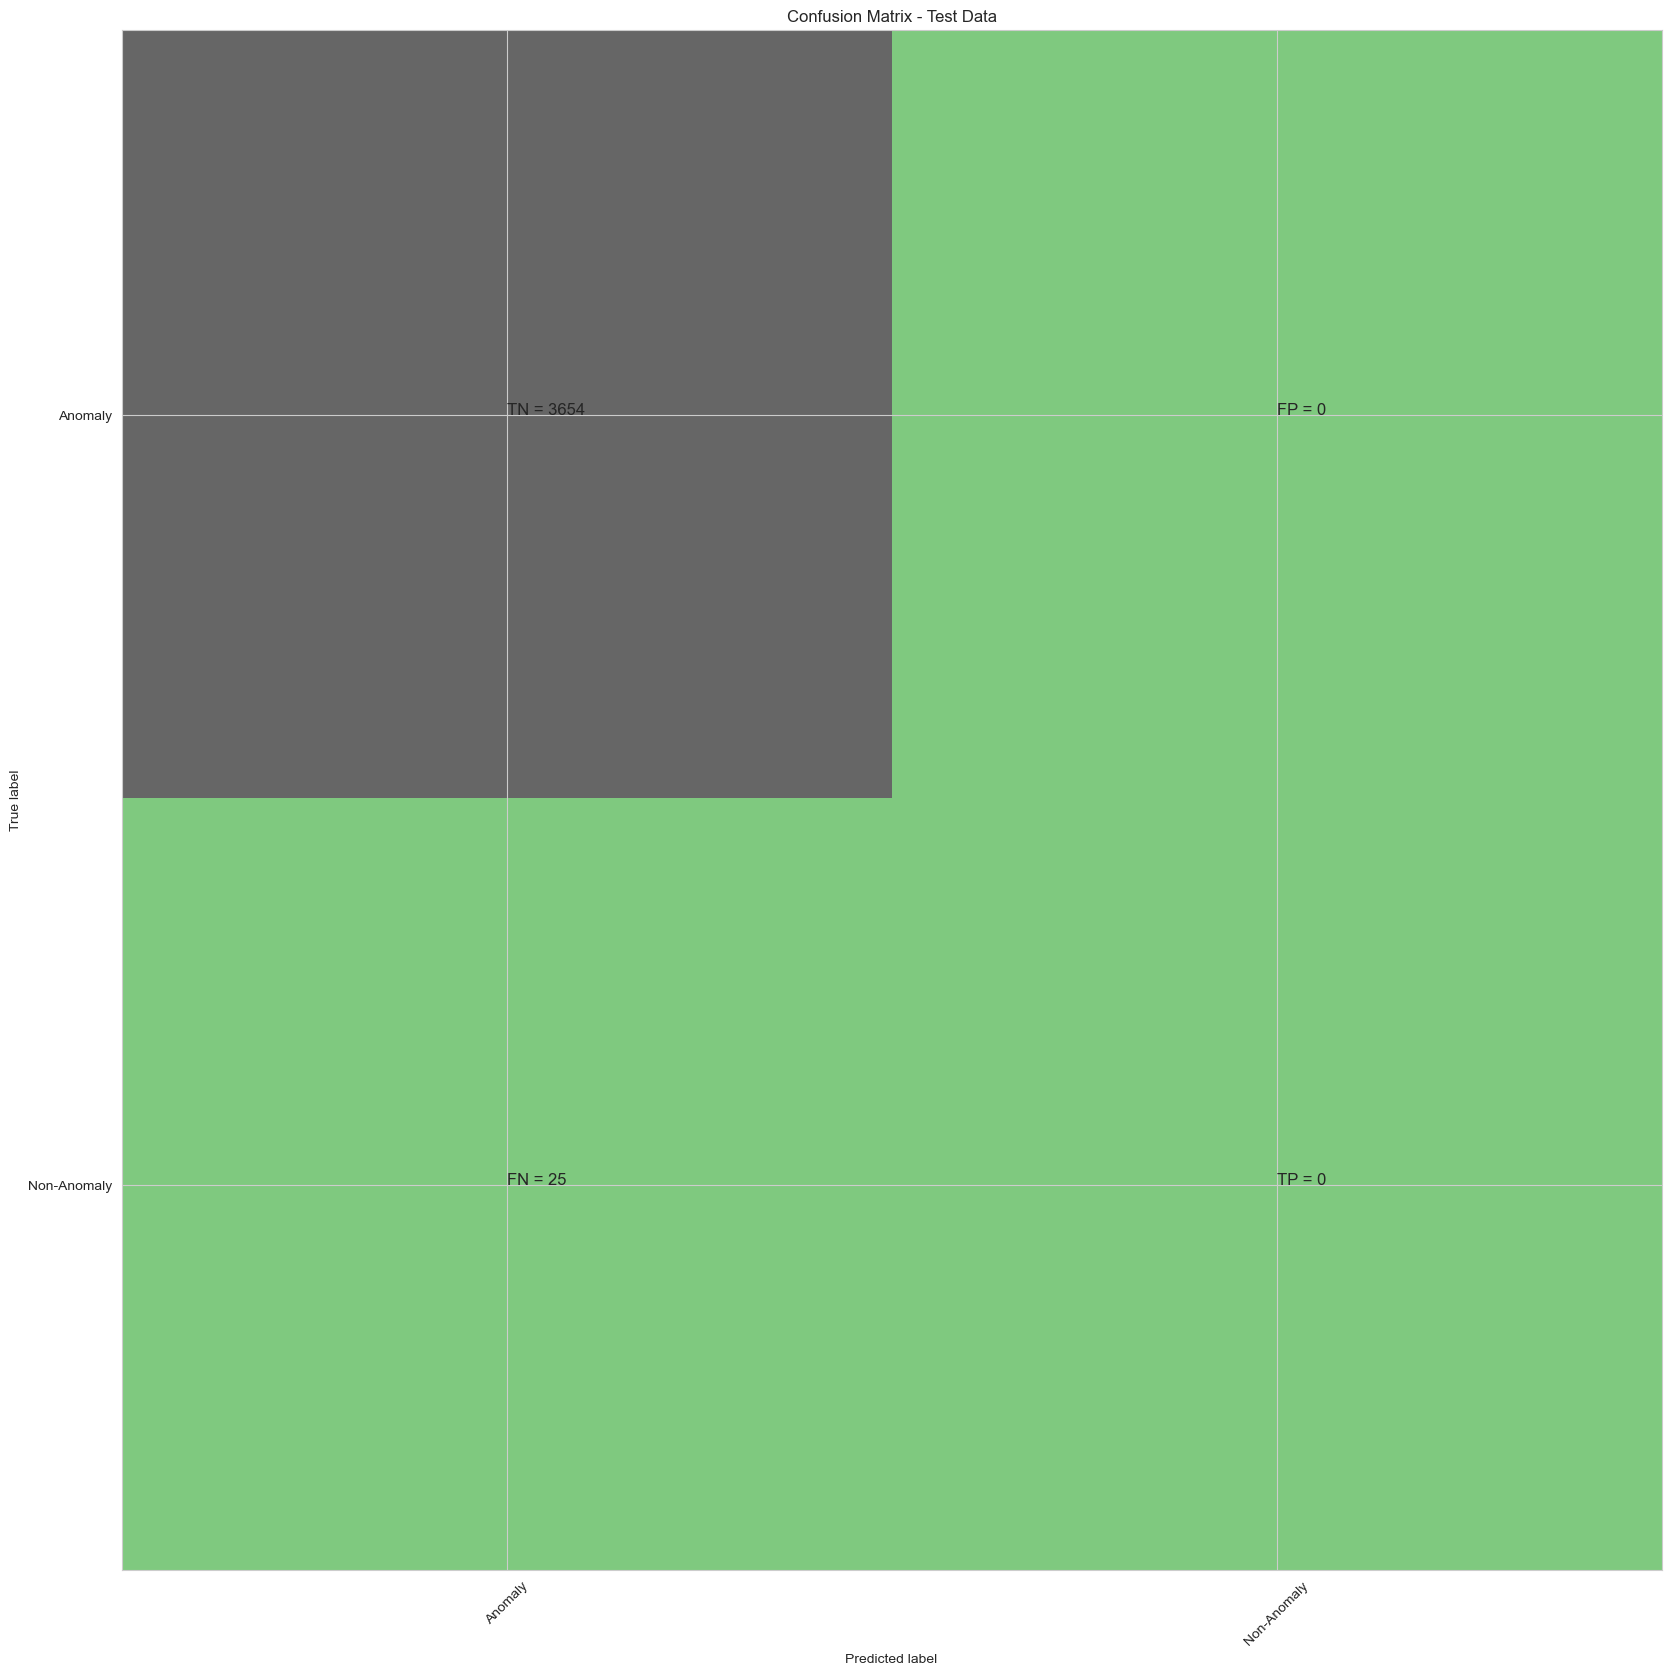

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3654
           1       0.00      0.00      0.00        25

    accuracy                           0.99      3679
   macro avg       0.50      0.50      0.50      3679
weighted avg       0.99      0.99      0.99      3679

l2 roc_value: 0.6086590038314176
l2 threshold: 0.6070968895838067
ROC for the test dataset: 60.9%


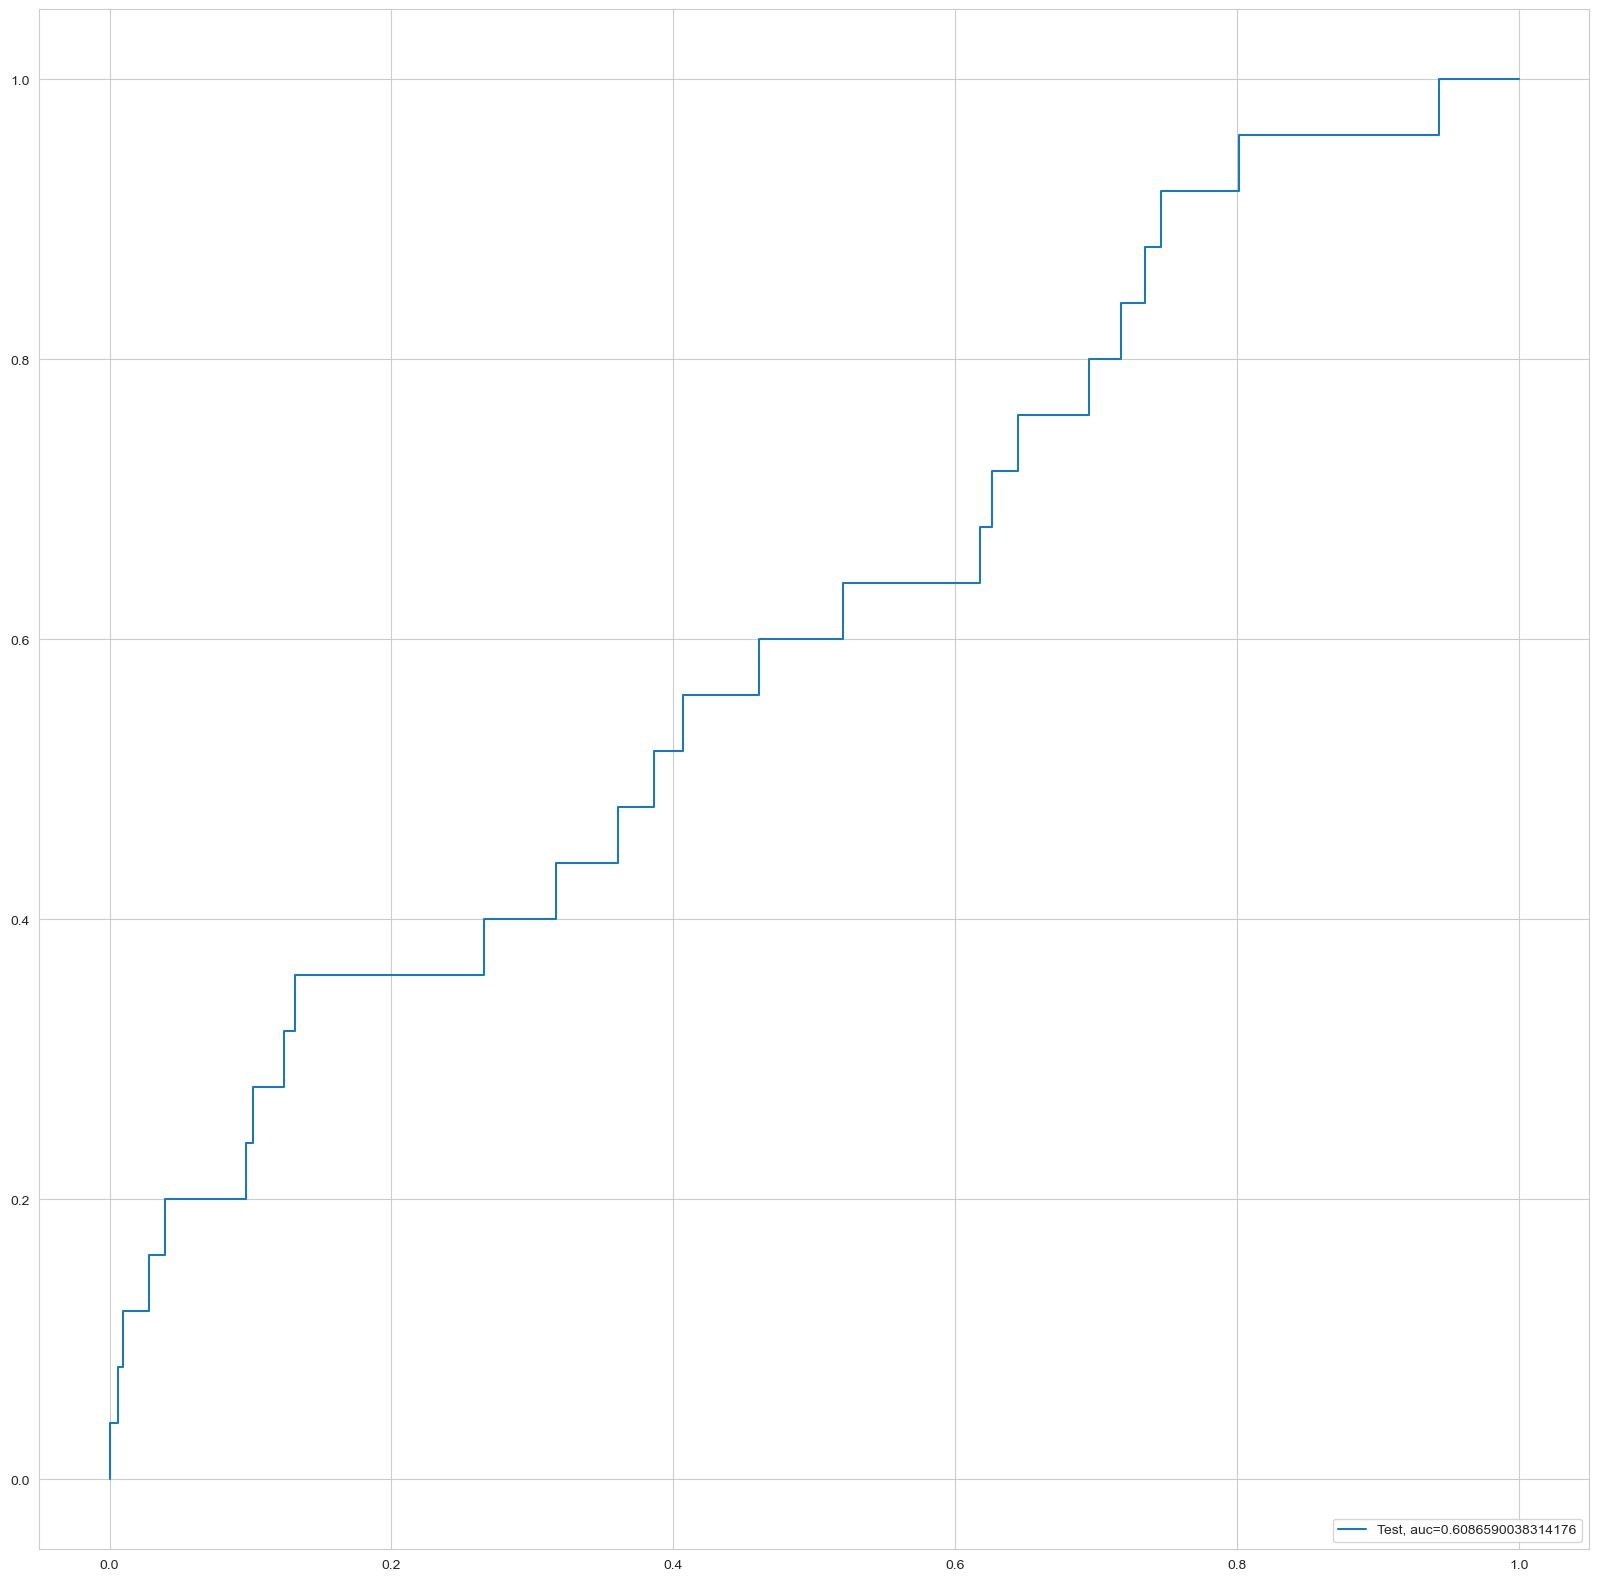

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset: 50.0%


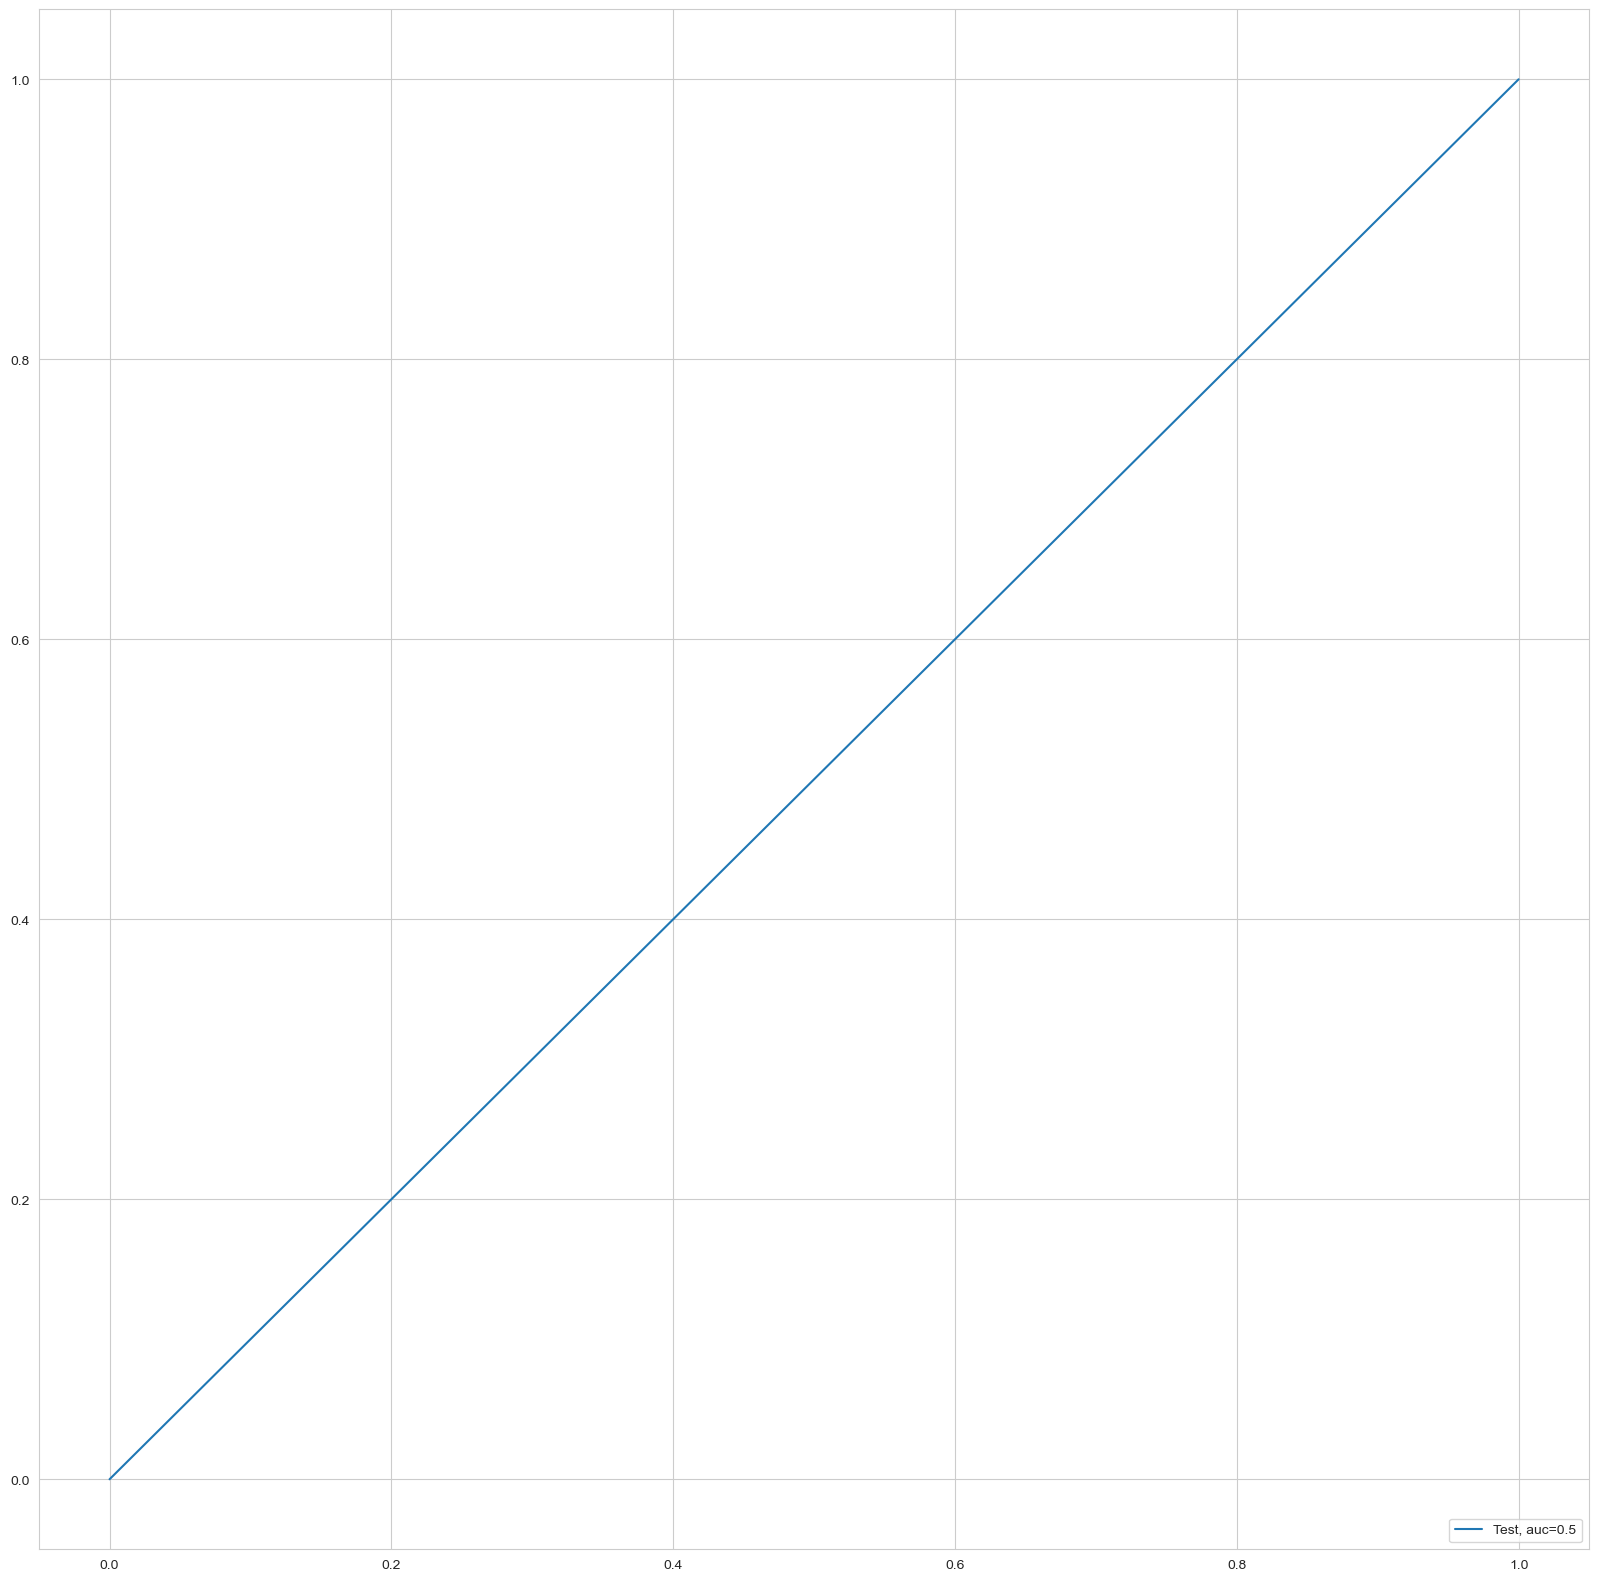

Time Taken by Model: --- 24.402644872665405 seconds ---
--------------------------------------------------------------------------------


In [77]:
Data_Imbalance_Handiling = "ADASYN Oversampling with StratifiedKFold CV "
#Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
Model score: 0.7023647730361511
Confusion Matrix


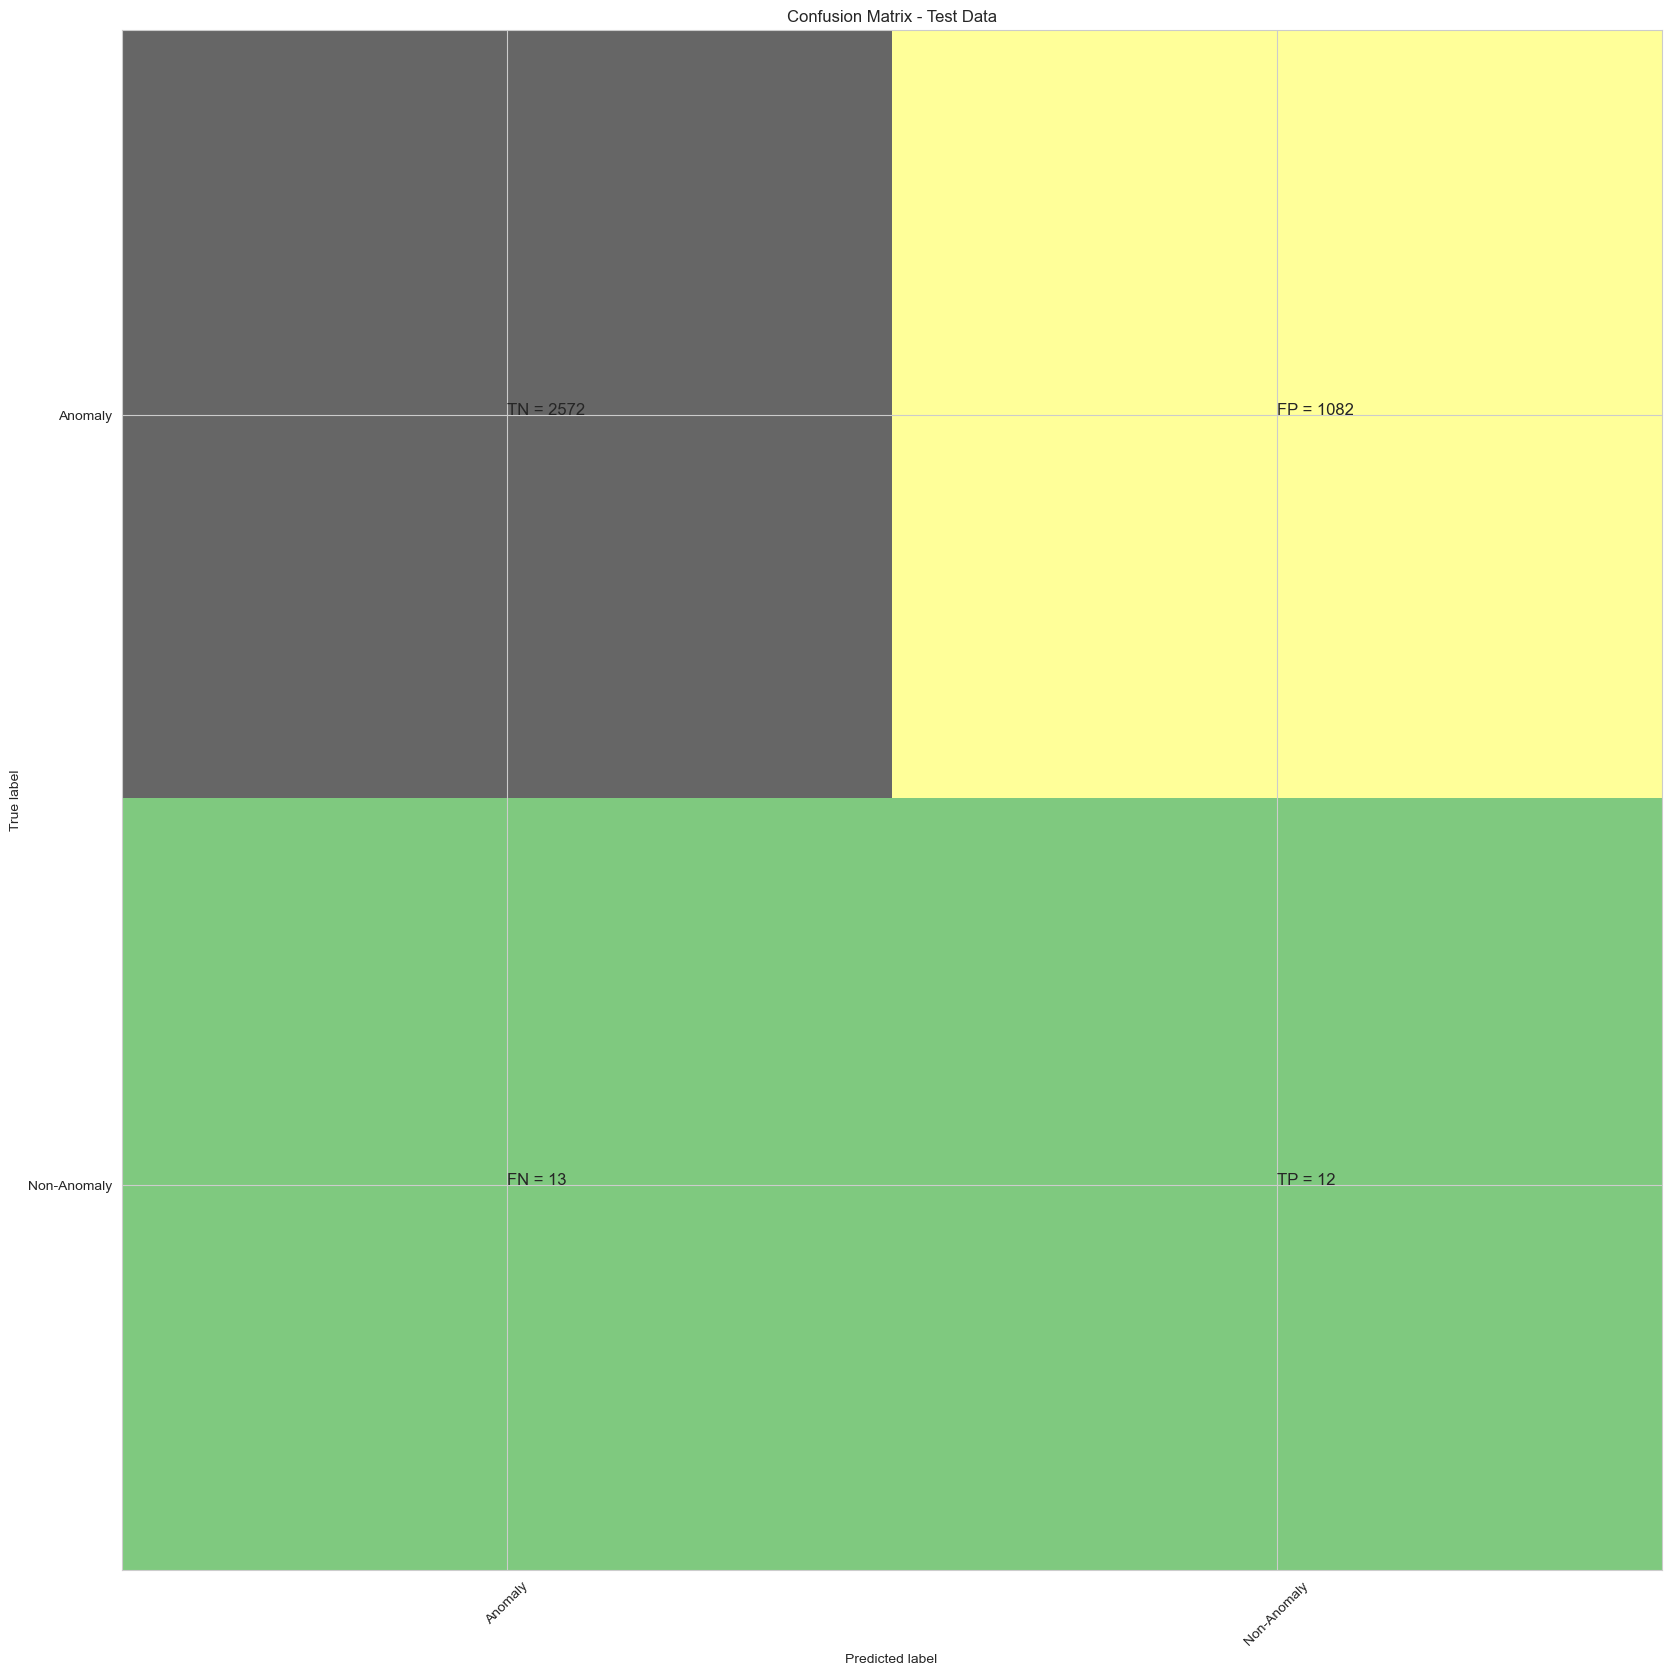

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      3654
           1       0.01      0.48      0.02        25

    accuracy                           0.70      3679
   macro avg       0.50      0.59      0.42      3679
weighted avg       0.99      0.70      0.82      3679

KNN roc_value: 0.5862014230979747
KNN threshold: 1.0
ROC for the test dataset 58.6%


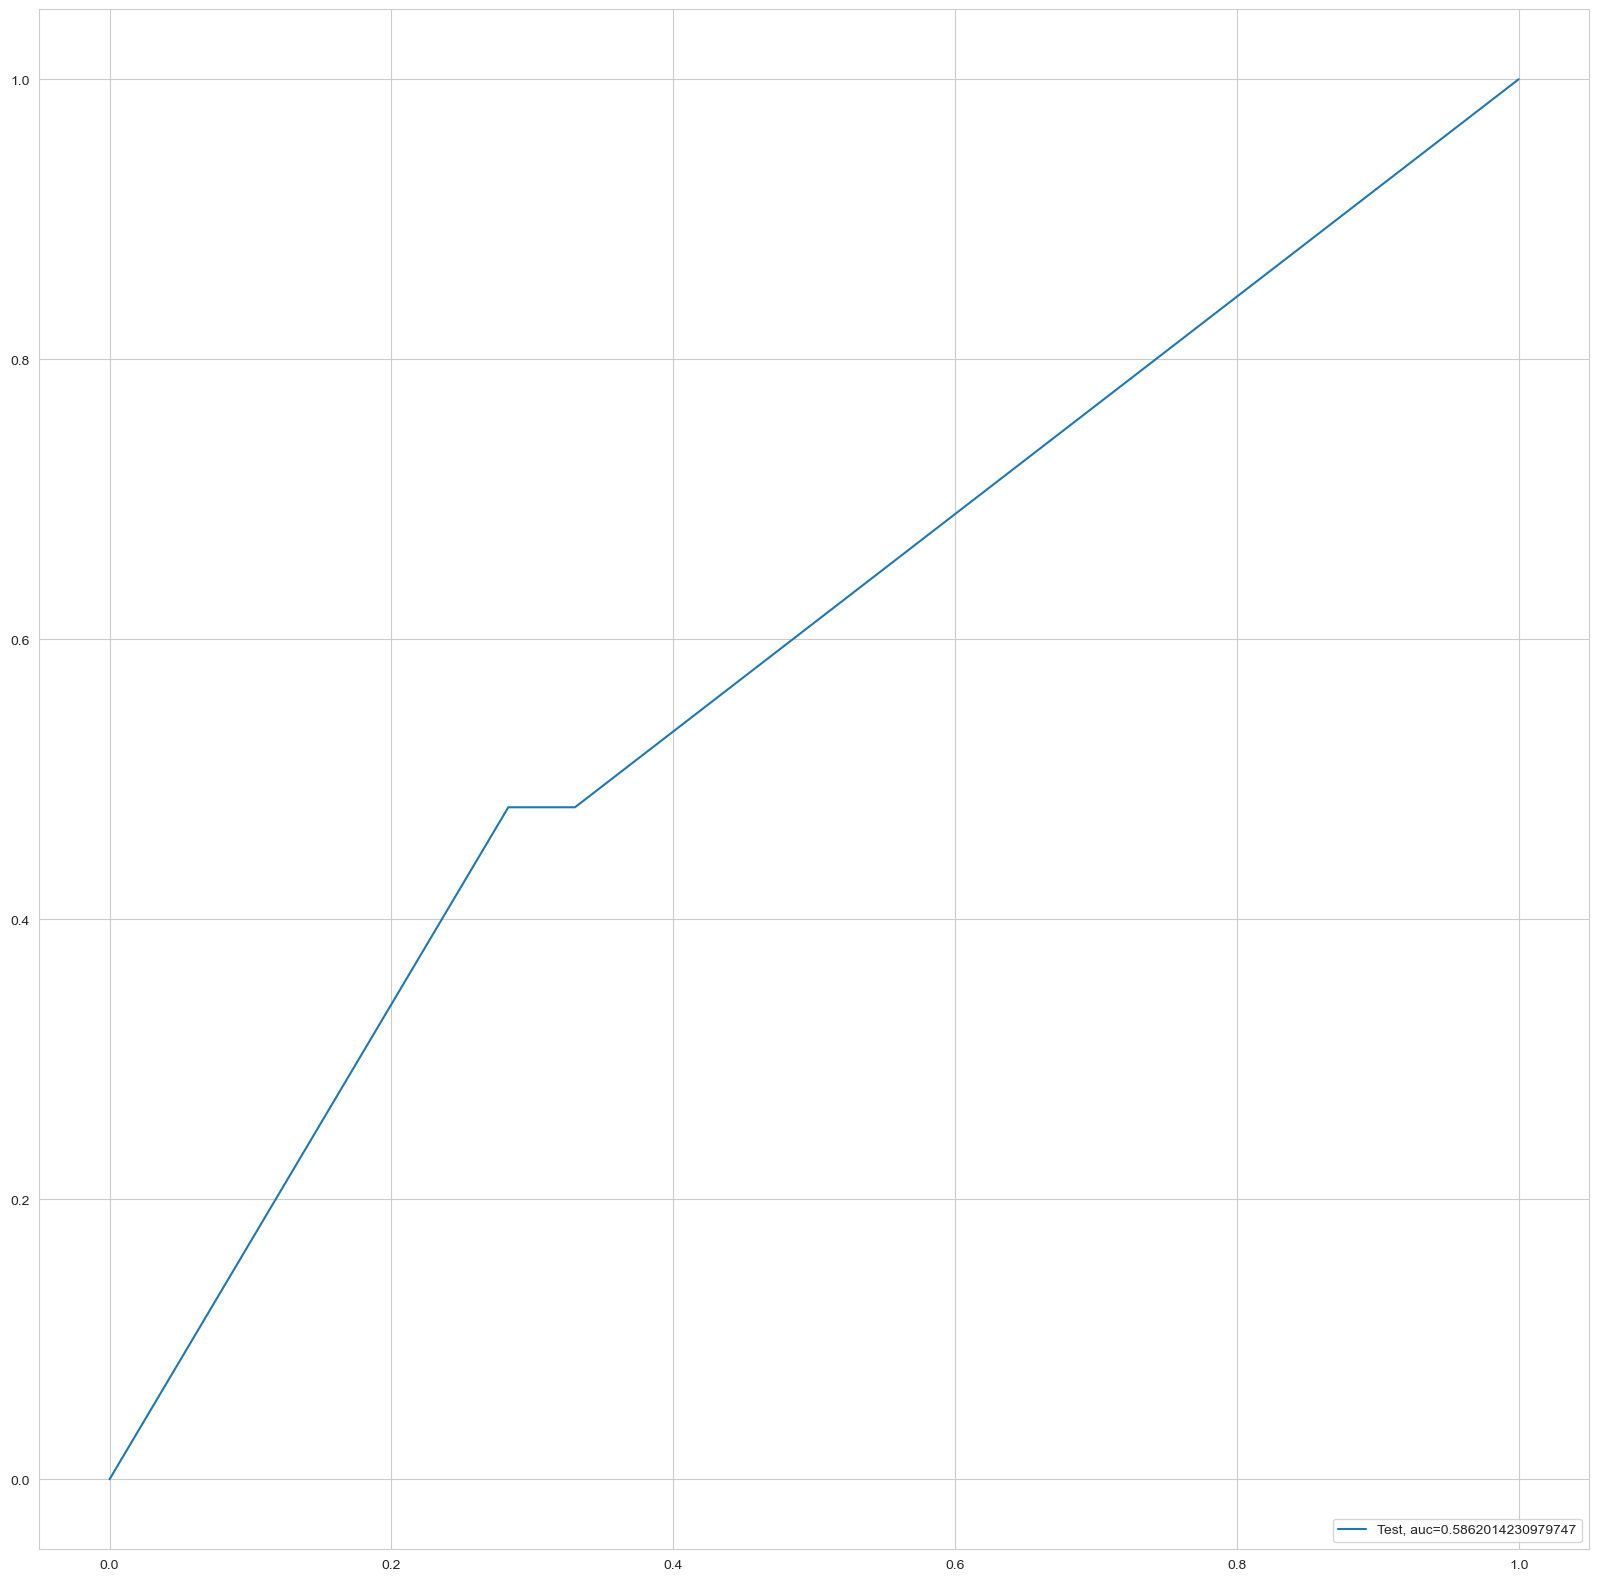

Time Taken by Model: --- 3.8502495288848877 seconds ---
--------------------------------------------------------------------------------


In [78]:
#Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8967110627888013
Confusion Matrix


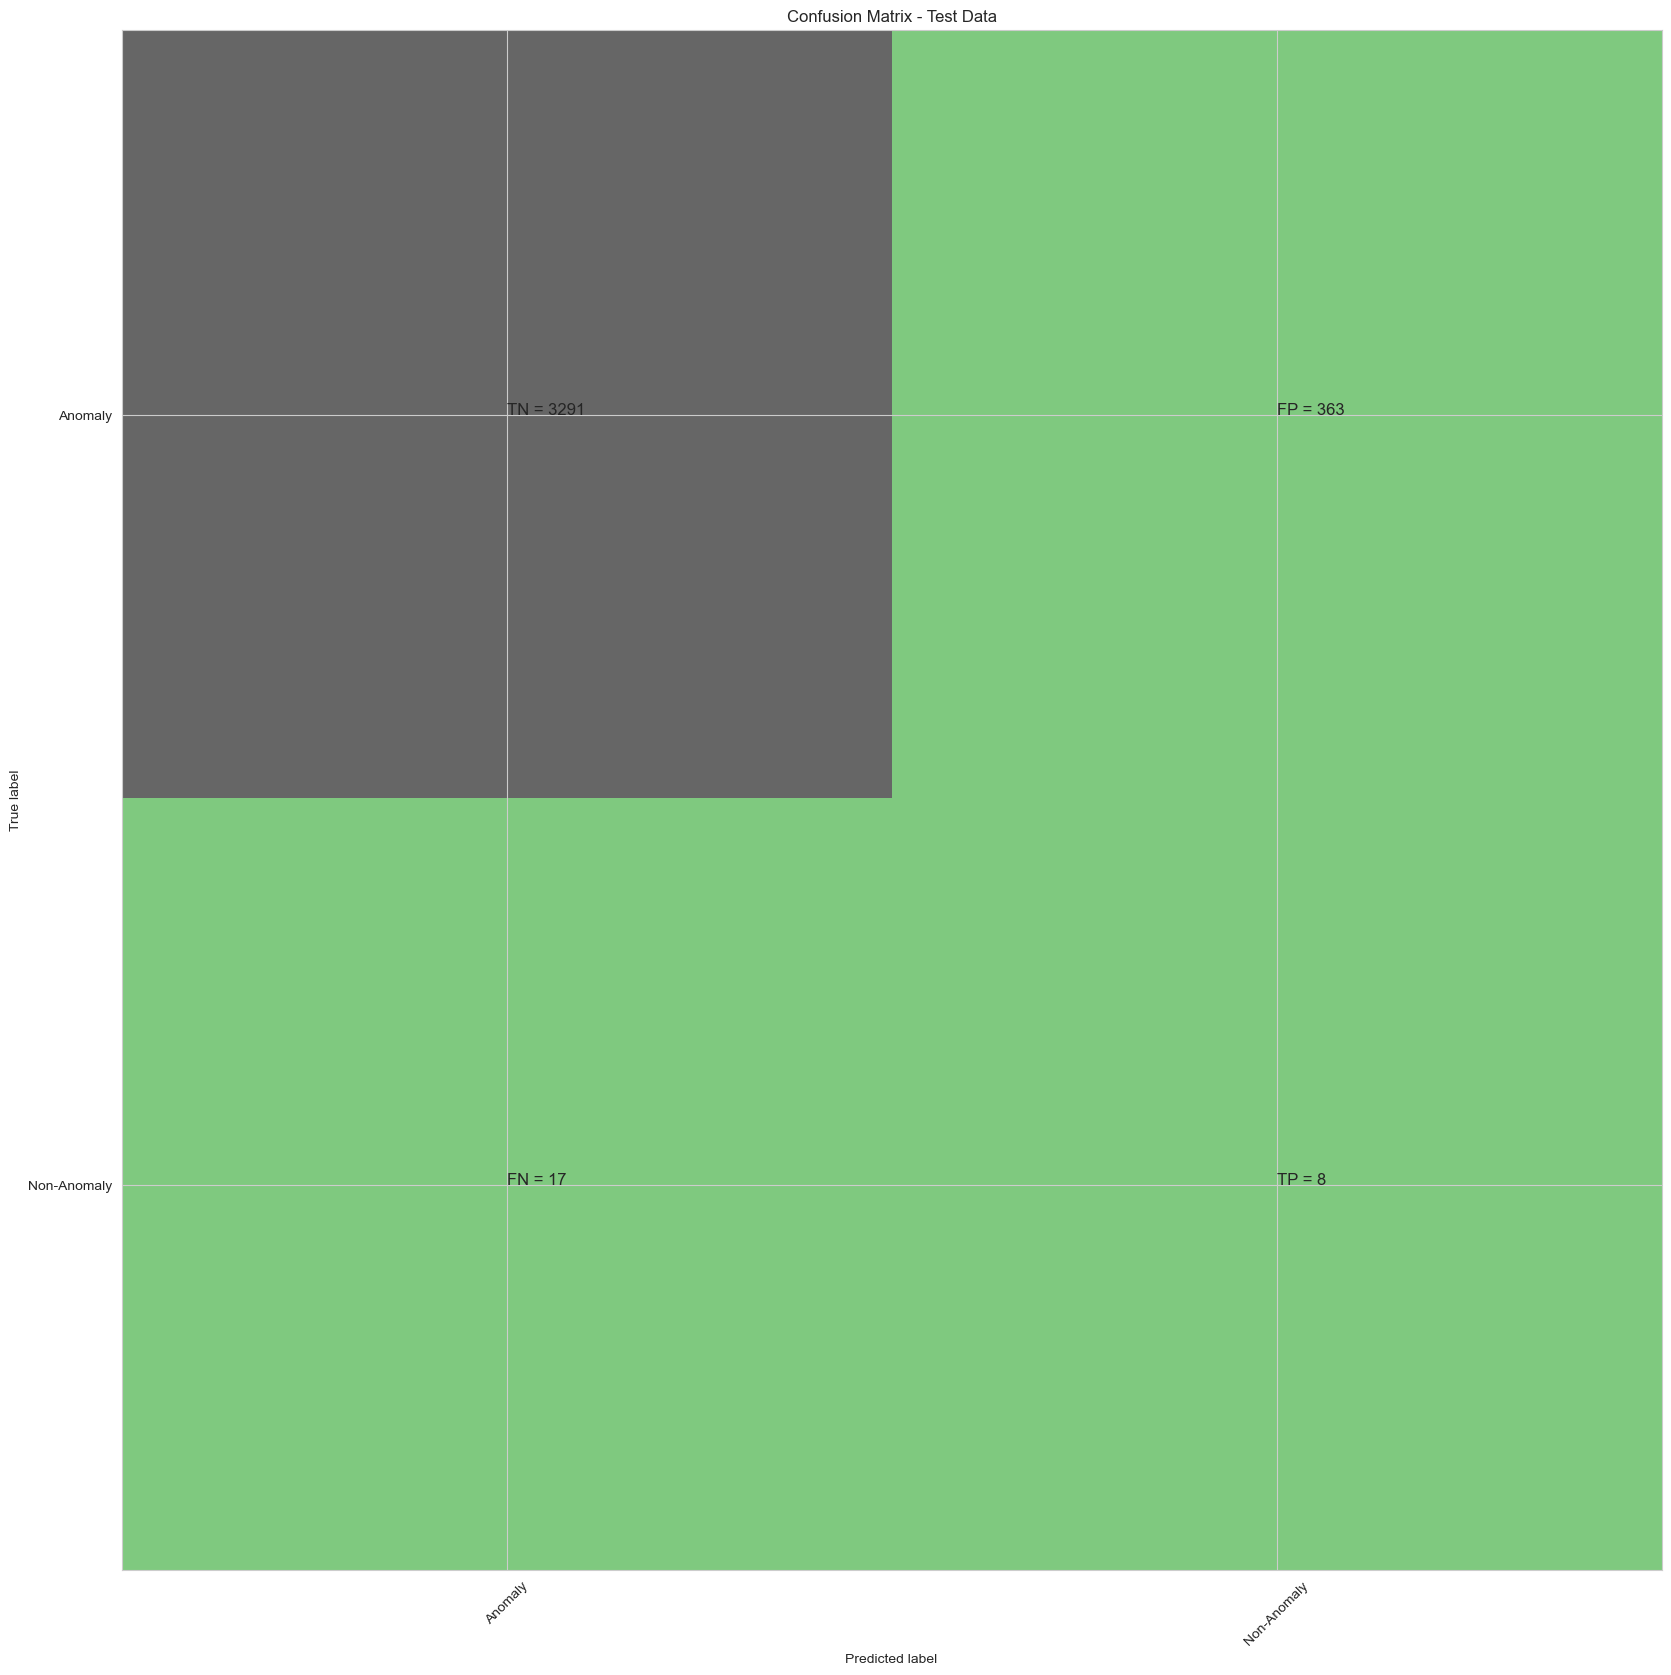

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      3654
           1       0.02      0.32      0.04        25

    accuracy                           0.90      3679
   macro avg       0.51      0.61      0.49      3679
weighted avg       0.99      0.90      0.94      3679

gini tree_roc_value: 0.610328407224959
Tree threshold: 1.0
ROC for the test dataset 61.0%


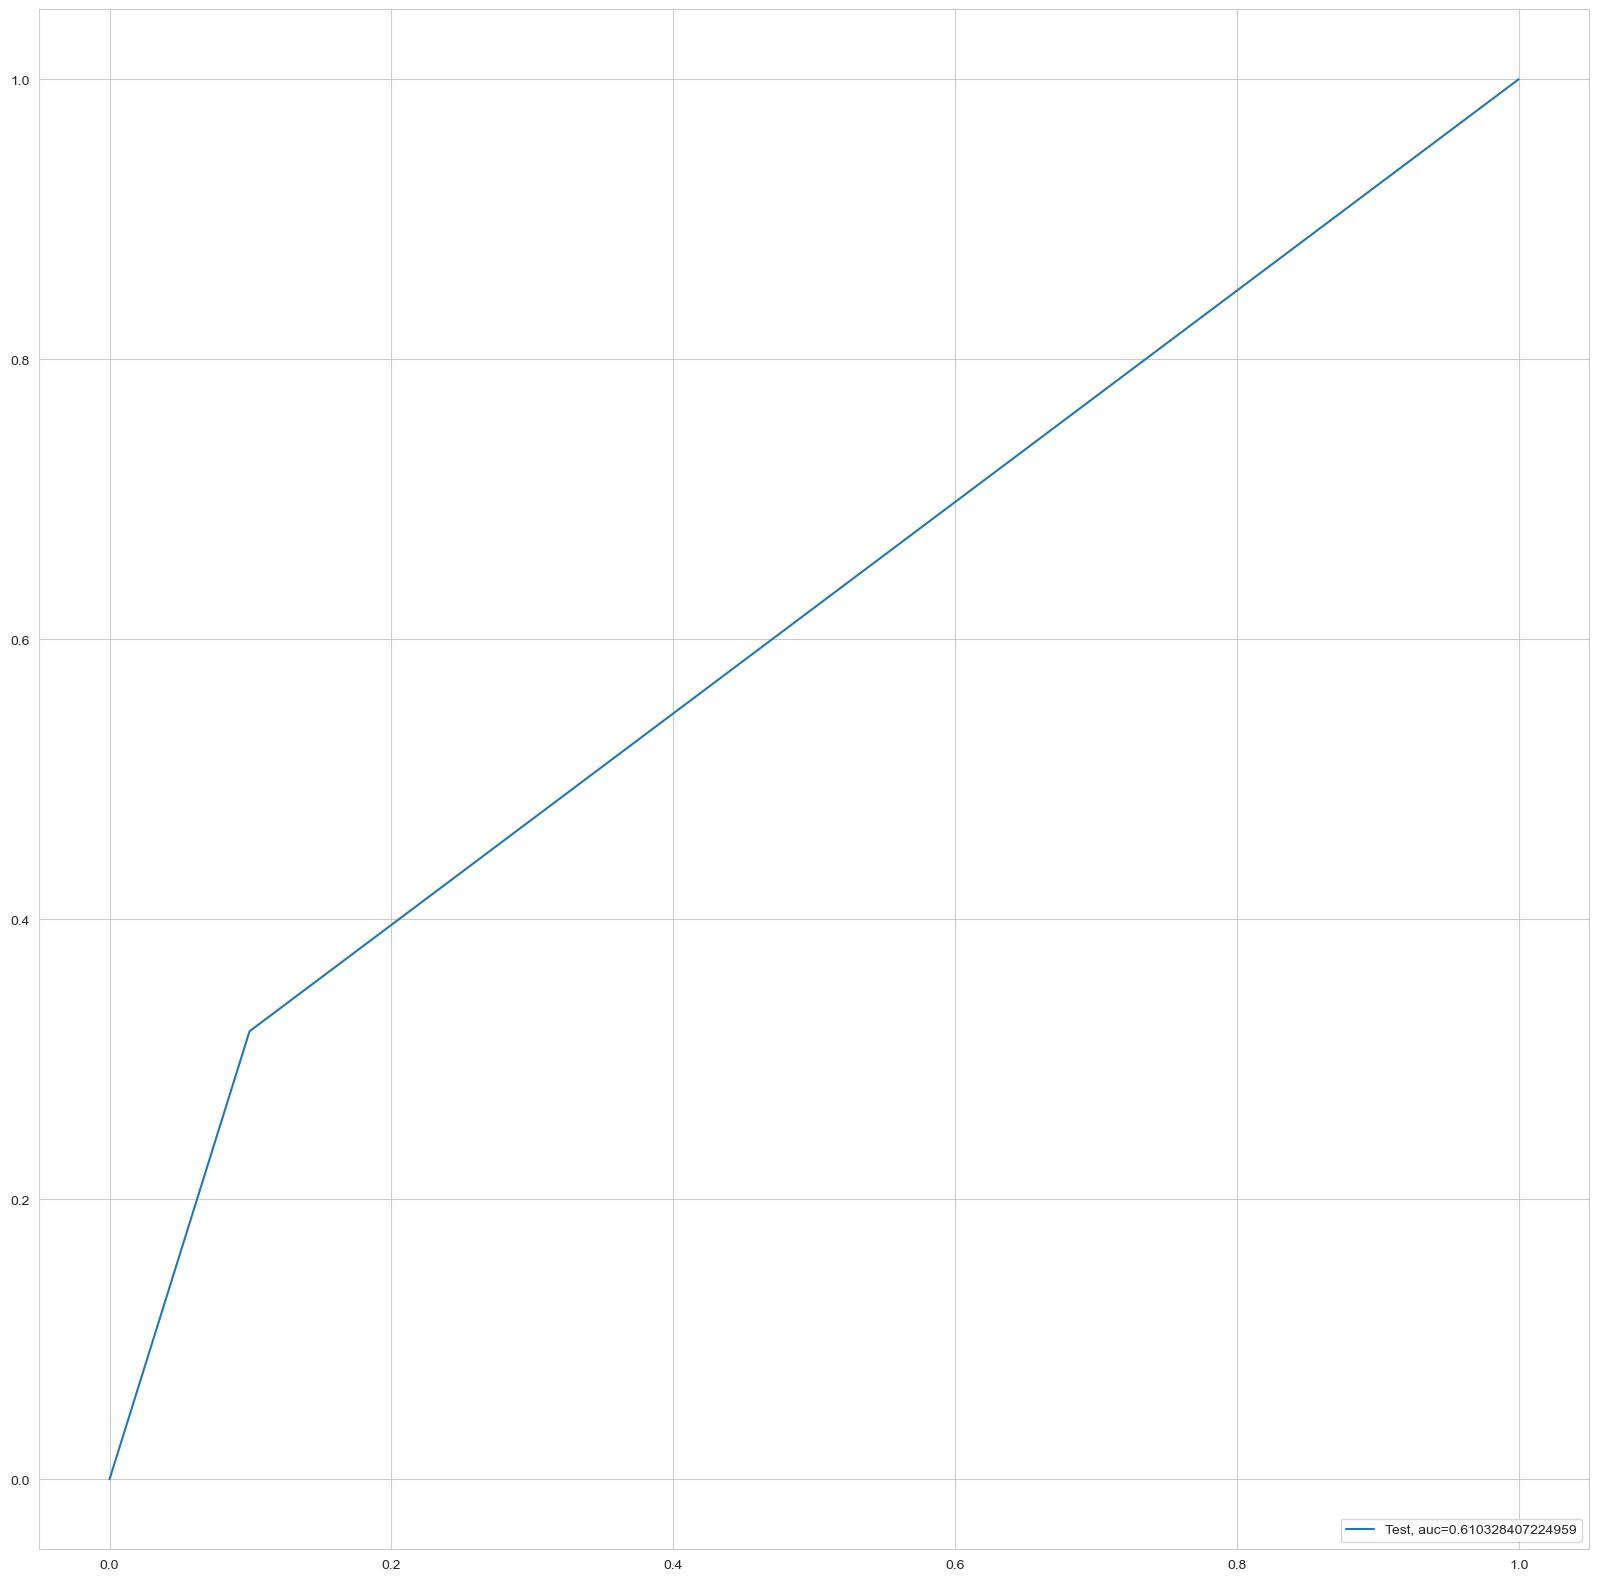

entropy score: 0.795596629518891
Confusion Matrix


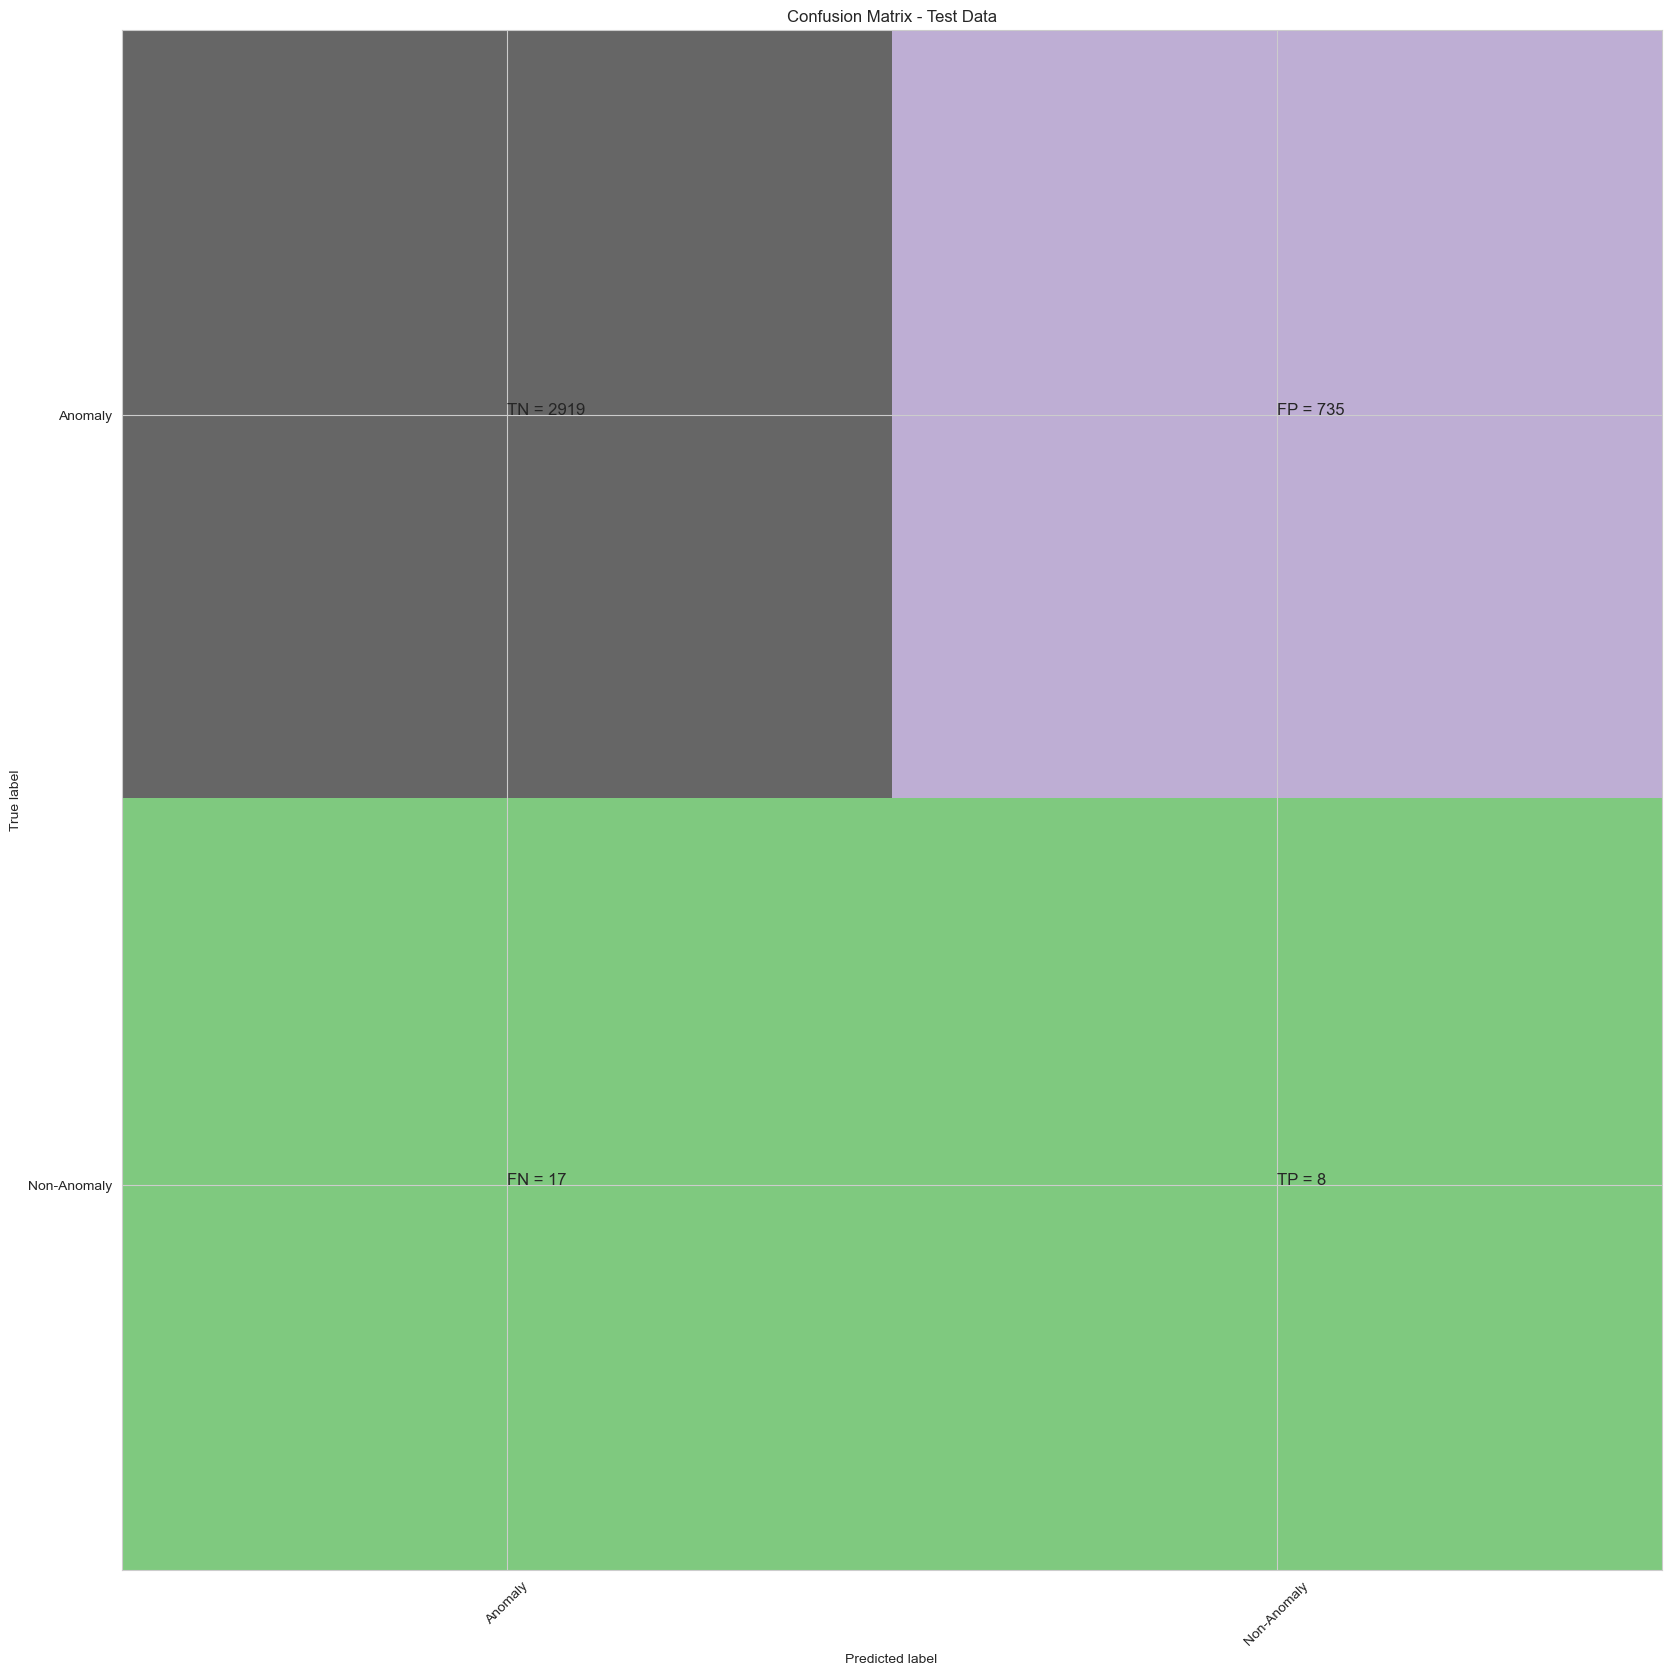

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      3654
           1       0.01      0.32      0.02        25

    accuracy                           0.80      3679
   macro avg       0.50      0.56      0.45      3679
weighted avg       0.99      0.80      0.88      3679

entropy tree_roc_value: 0.5594252873563219
Tree threshold: 1.0
ROC for the test dataset 55.9%


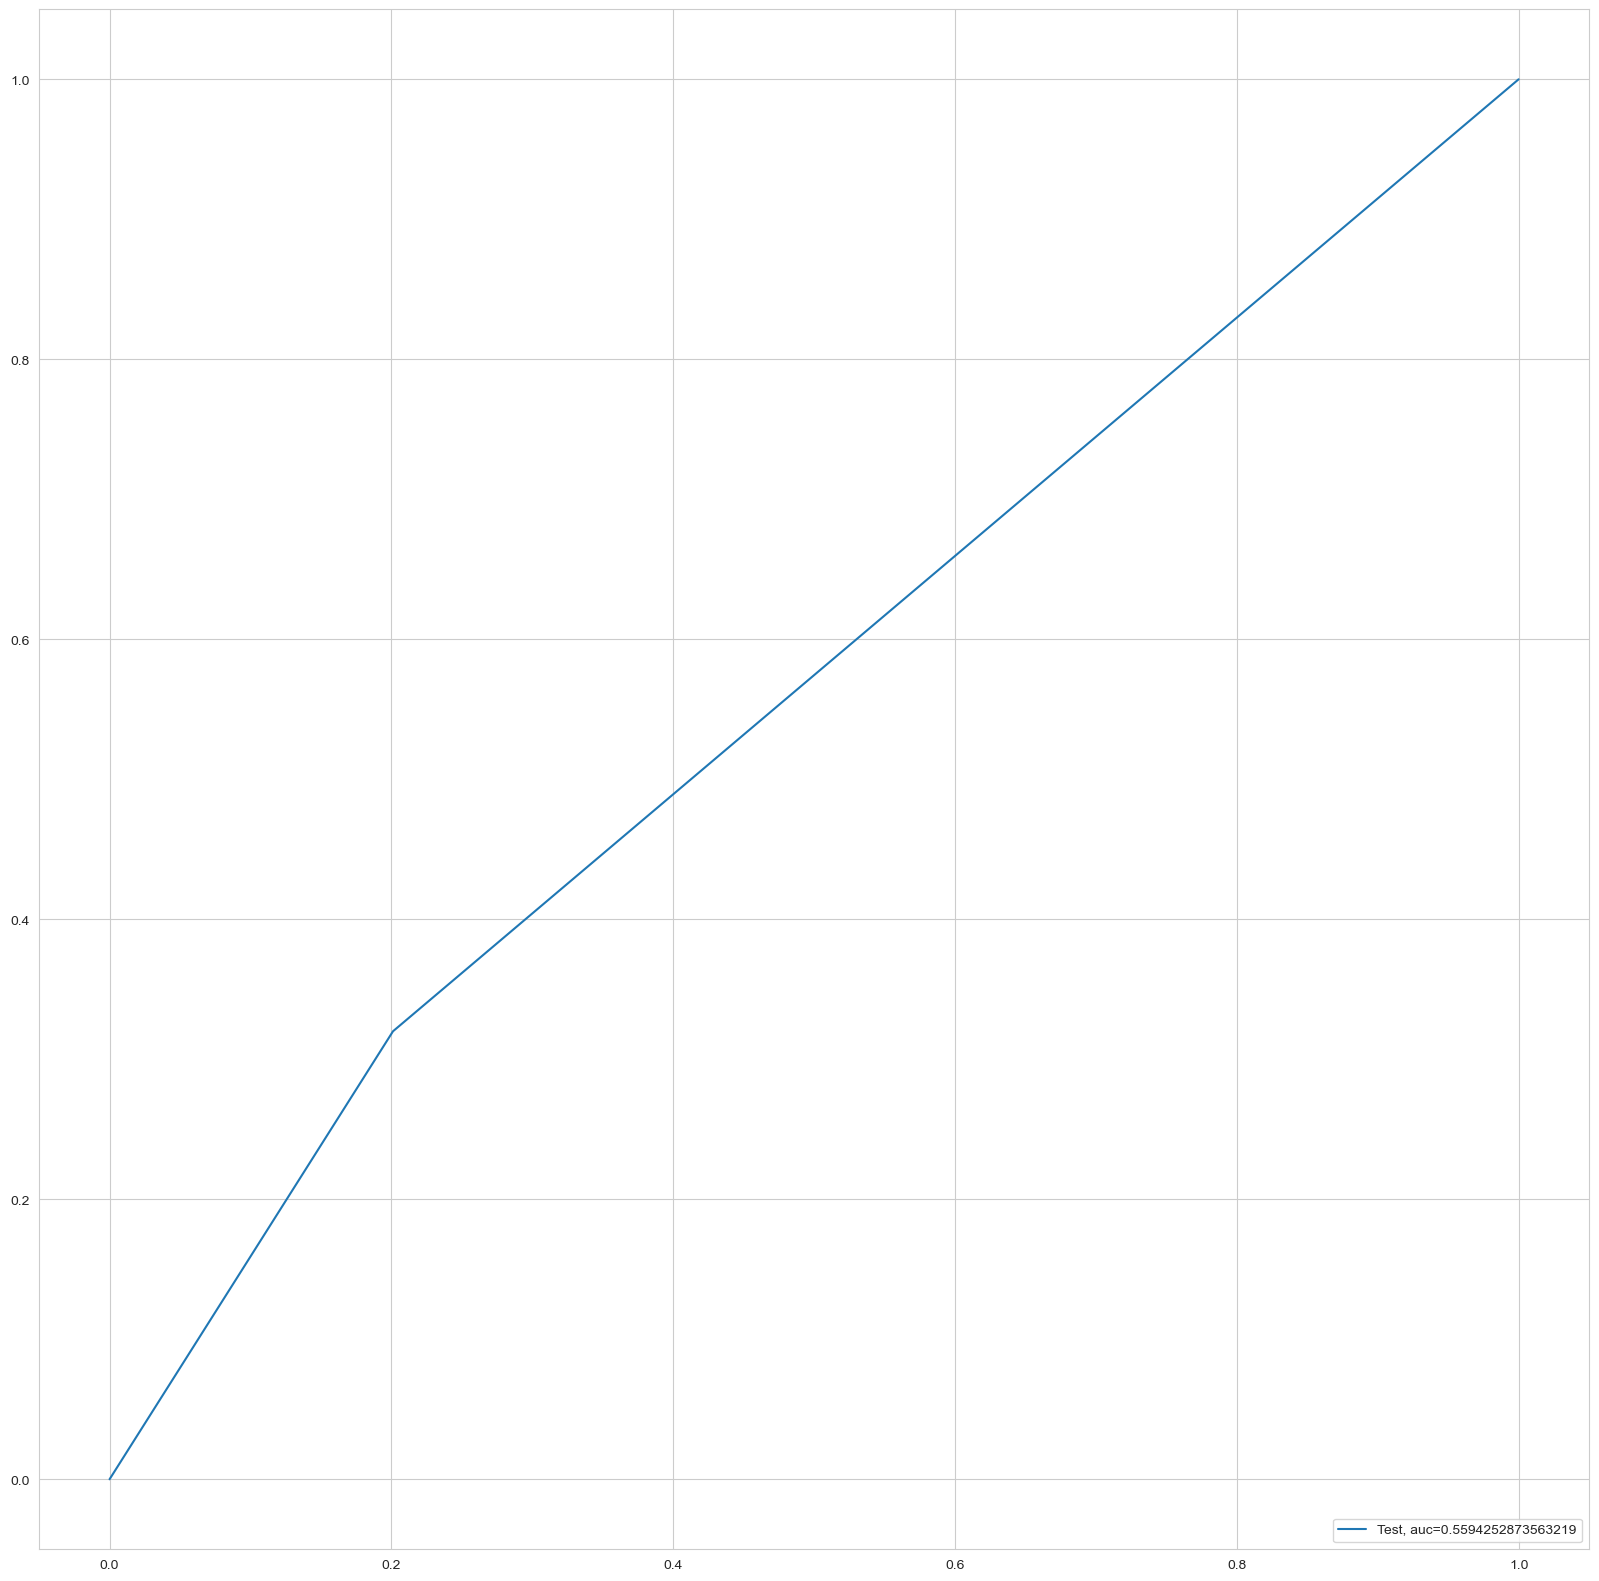

Time Taken by Model: --- 11.217150688171387 seconds ---
--------------------------------------------------------------------------------


In [79]:
#Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.8722478934493069
Confusion Matrix


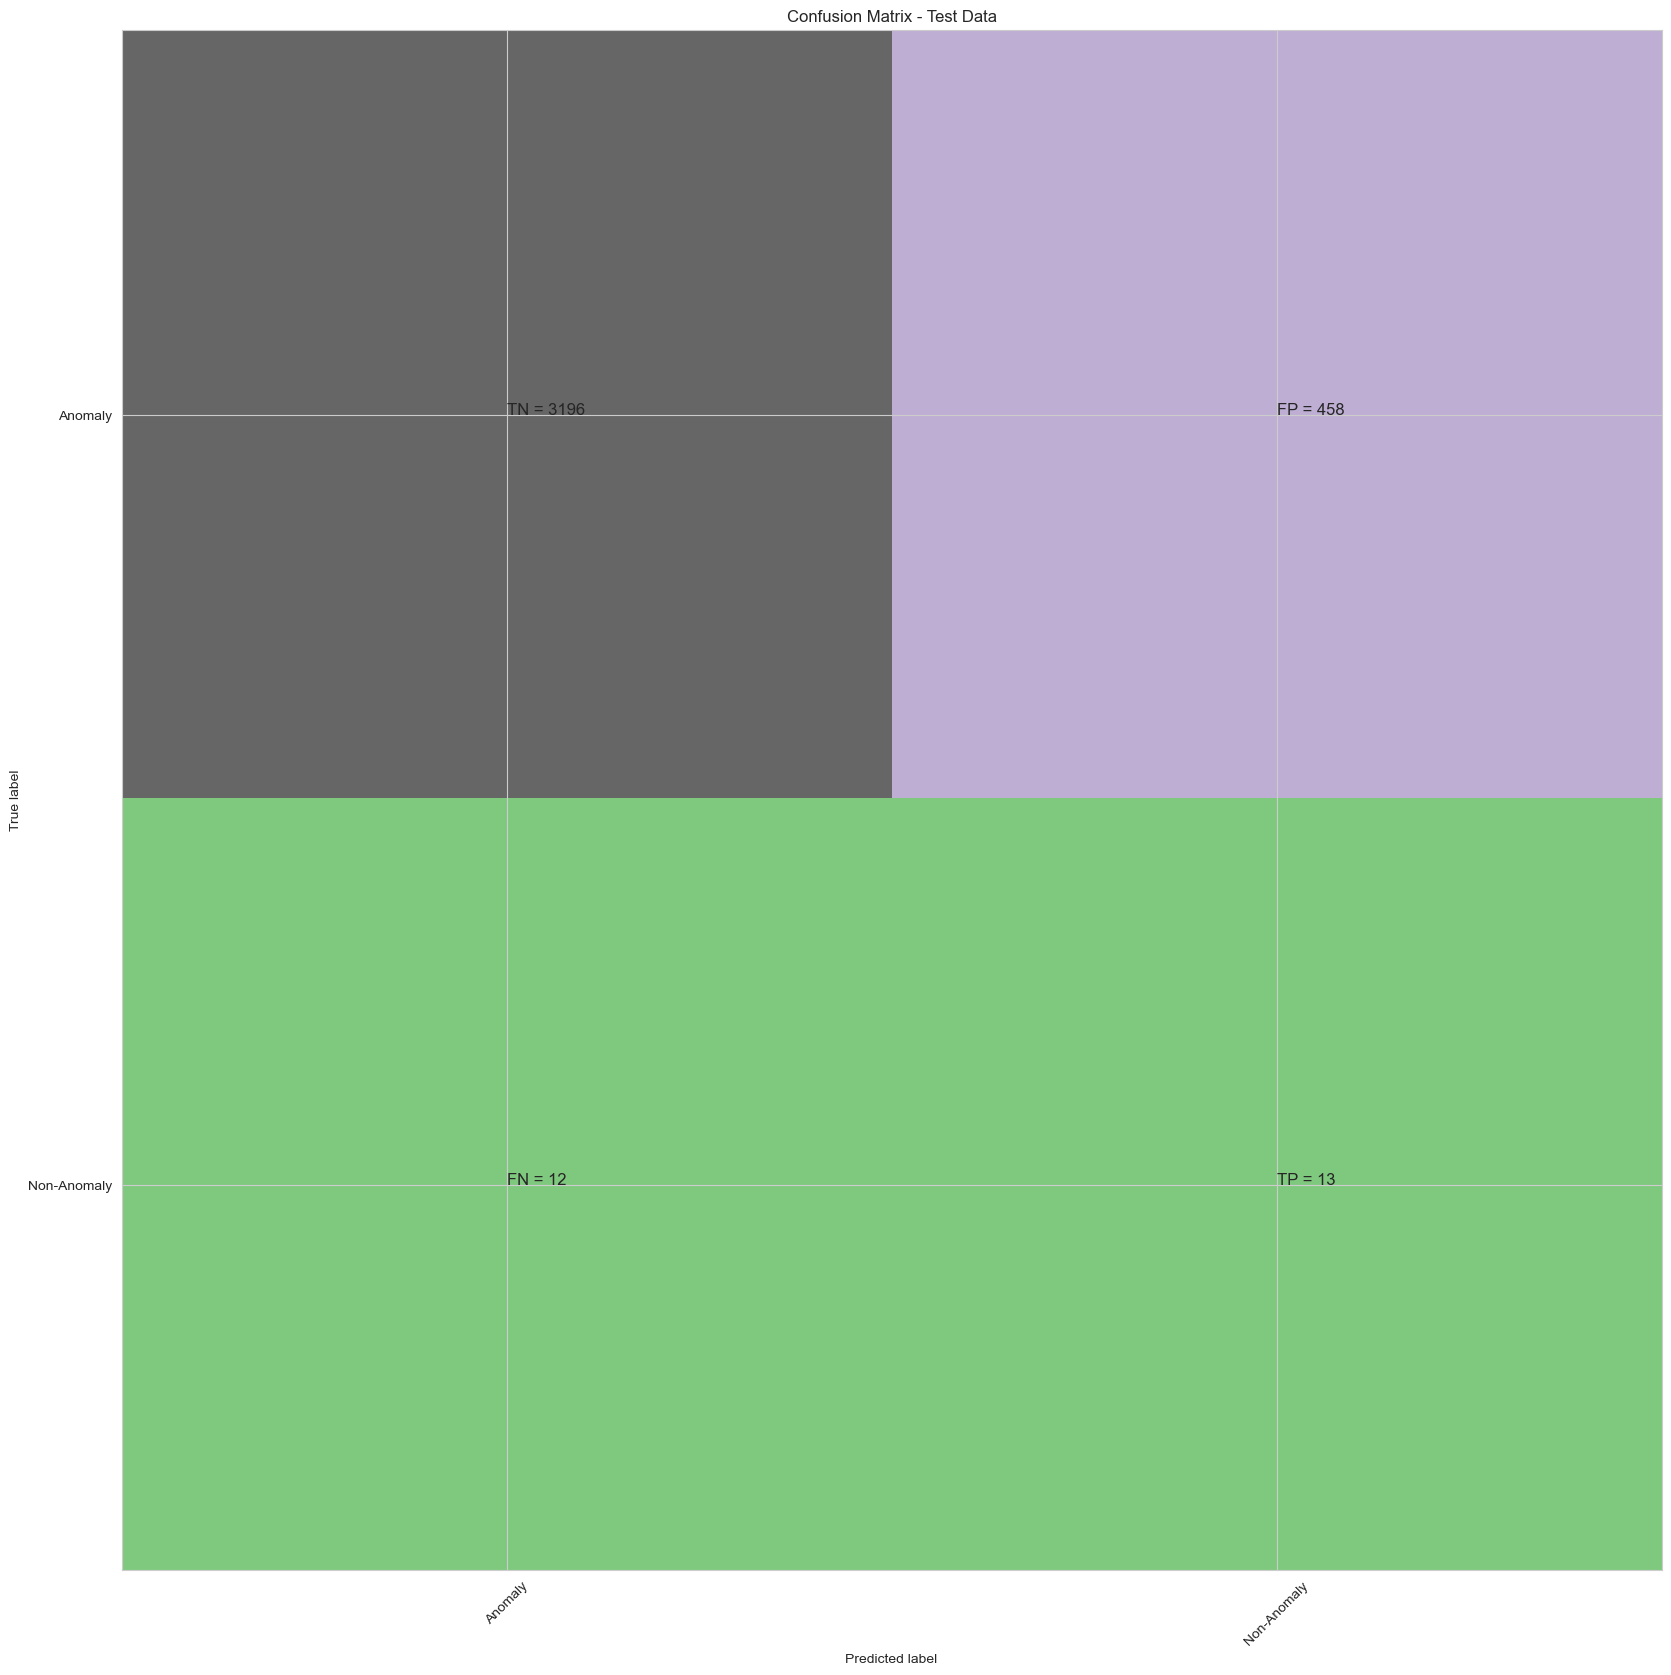

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3654
           1       0.03      0.52      0.05        25

    accuracy                           0.87      3679
   macro avg       0.51      0.70      0.49      3679
weighted avg       0.99      0.87      0.93      3679

XGboost roc_value: 0.7253749315818282
XGBoost threshold: 0.668714702129364
ROC for the test dataset 72.5%


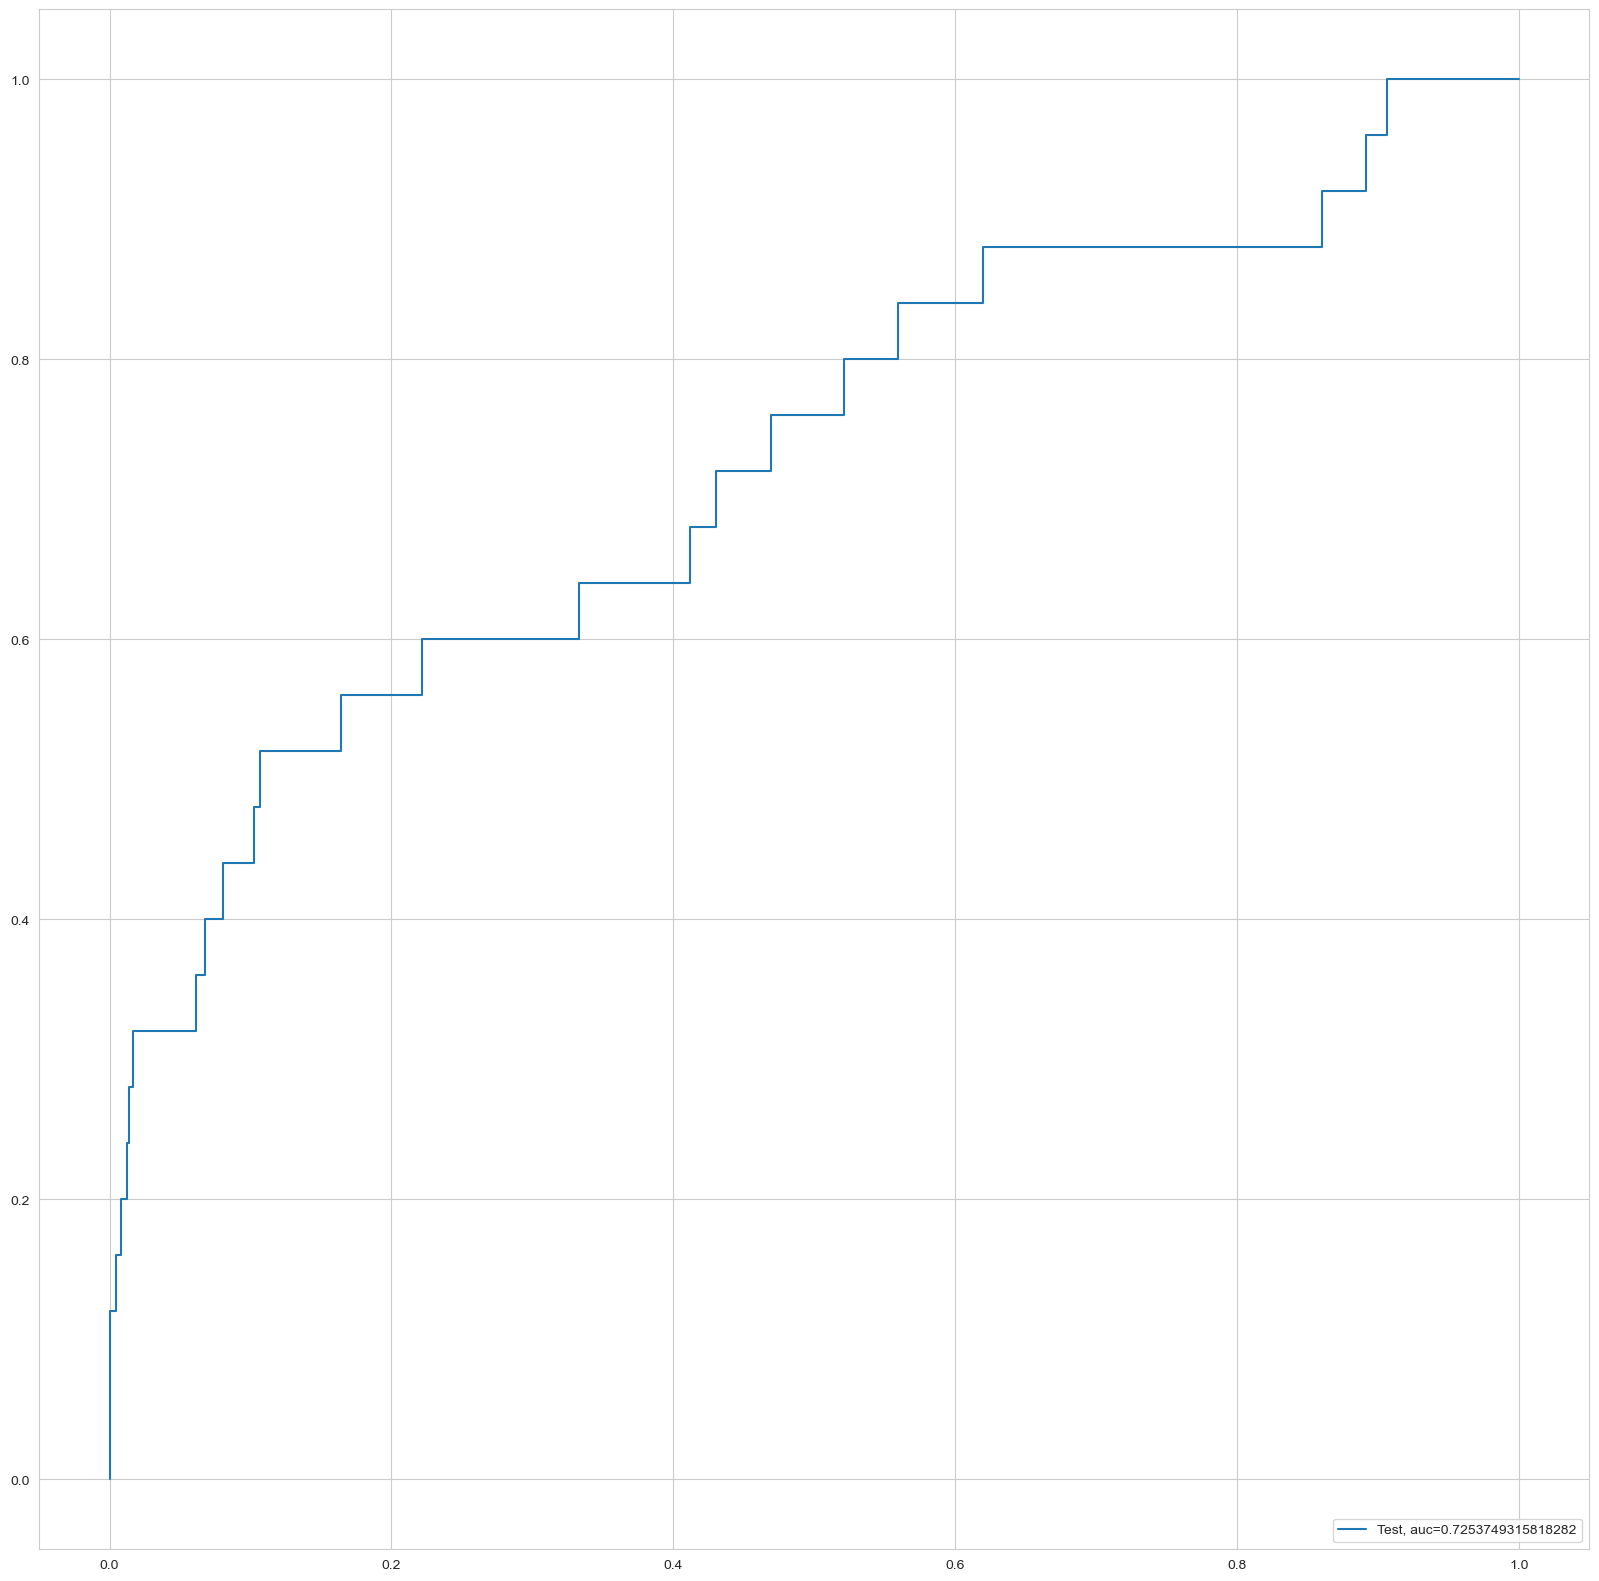

Time Taken by Model: --- 3.490511894226074 seconds ---
--------------------------------------------------------------------------------


In [80]:
#Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [81]:
df_Results


Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7              StratifiedKFold  Cross Validation   
8              StratifiedKFold  Cross Validation   
9              StratifiedKFold  Cross Validation   
10  Random Oversampling with StratifiedKFold CV    
11  Random Oversampling with StratifiedKFold CV    
12  Random Oversampling with StratifiedKFold CV    
13   SMOTE Oversampling with StratifiedKFold CV    
14   SMOTE Oversampling with StratifiedKFold CV    
15   SMOTE Oversampling with StratifiedKFold CV    
16   SMOTE Oversampling with StratifiedKFold CV    
17   SMOTE Oversampling with StratifiedKFold CV    
18  ADASYN Oversampling with StratifiedKFold CV    
19  ADASYN Oversampling with StratifiedKFold CV    
20  ADASYN Oversampling with StratifiedKFold CV    
21  ADASYN Oversampling with StratifiedKFold CV    
22  ADASYN Oversampling with StratifiedKFold CV    
23  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.994022   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.995380   0.895037   0.034348  
2                                    KNN MODEL  0.993205   0.531199   0.200000  
3                                   TREE MODEL  0.994020   0.718905   1.000000  
4                                   TREE MODEL  0.994020   0.758632   1.000000  
5                                Random Forest  0.995379   0.839803   0.060000  
6                                      XGBoost  0.996466   0.854855   0.002054  
7   Logistic Regression with L2 Regularisation  0.182387   0.548703   0.819339  
8   Logistic Regression with L1 Regularisation  0.993748   0.694209   0.108368  
9                                Random Forest  0.941017   0.785840   0.370000  
10                                  TREE MODEL  0.953520   0.619064   1.000000  
11                                  TREE MODEL  0.893449   0.608686   1.000000  
12                               Random Forest  0.933949   0.729907   0.340000  
13  Logistic Regression with L2 Regularisation  0.193803   0.611877   0.668191  
14  Logistic Regression with L1 Regularisation  0.993205   0.500000        inf  
15                                   KNN MODEL  0.701821   0.586136   1.000000  
16                               Random Forest  0.857026   0.644735   0.420000  
17                                     XGBoost  0.862463   0.742255   0.680264  
18  Logistic Regression with L2 Regularisation  0.611036   0.608659   0.607097  
19  Logistic Regression with L1 Regularisation  0.993205   0.500000        inf  
20                                   KNN MODEL  0.702365   0.586201   1.000000  
21                                  TREE MODEL  0.896711   0.610328   1.000000  
22                                  TREE MODEL  0.795597   0.559425   1.000000  
23                                     XGBoost  0.872248   0.725375   0.668715

In [ ]:
#After analyzing the results of  models trained on the oversampled data, 
#it appears that the XGBoost model trained with RepeatedKFold Cross Validation, which achieved an accuracy of 0.996466. .
#Therefore, we can focus on fine-tuning the hyperparameters of this model to further enhance its performance.

In [ ]:
#fine-tuning the hyperparameters

In [143]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        verbosity=1
    ), 
    param_distributions=param_test, 
    scoring='roc_auc', 
    n_jobs=4, 
    cv=5
)

gsearch1.fit(X_over, y_over)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='roc_auc')

In [144]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# Define the classifier
clf = XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=1, 
    gamma=0.1,
    learning_rate=0.2, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=4, 
    missing=-999,  # Provide a numeric value for missing
    n_estimators=60, 
    n_jobs=1,
    objective='binary:logistic', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=1, 
    verbosity=1
)

# Fit the classifier on the balanced dataset
clf.fit(X_over, y_over)

# Score on test data
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost ROC AUC: {0}".format(XGB_roc_value))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost optimal threshold: {0}".format(optimal_threshold))

Model Accuracy: 0.8787714052731721
XGBoost ROC AUC: 0.7900821018062398
XGBoost optimal threshold: 0.17373105883598328


In [ ]:
#In conclusion, based on the performance evaluation on oversampled data,the XGBoost model, especially with random oversampling and 
#stratified k-fold cross-validation emerges as the top-performing model.when considering all models,
#theLogistic Regression with L1 Regularization demonstrated comparable performance as well.

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        verbosity=1
    ), 
    param_grid=param_grid, 
    scoring='roc_auc', 
    n_jobs=4, 
    cv=5
)

grid_search.fit(X_over, y_over)

# After fitting, we can access the best estimator and its parameters:
print(grid_search.best_estimator_)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [147]:

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print('ROC AUC for the test dataset: {0:.1%}'.format(XGB_roc_value))



ROC AUC for the test dataset: 79.0%


In [ ]:
#With the fine-tuned XGBoost model, the ROC AUC for the test dataset is 79.0%. This indicates a good level of discrimination
#ability of the model in distinguishing between the positive and negative classes.

In [149]:

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)


Top var = 3
2nd Top var = 38
3rd Top var = 46


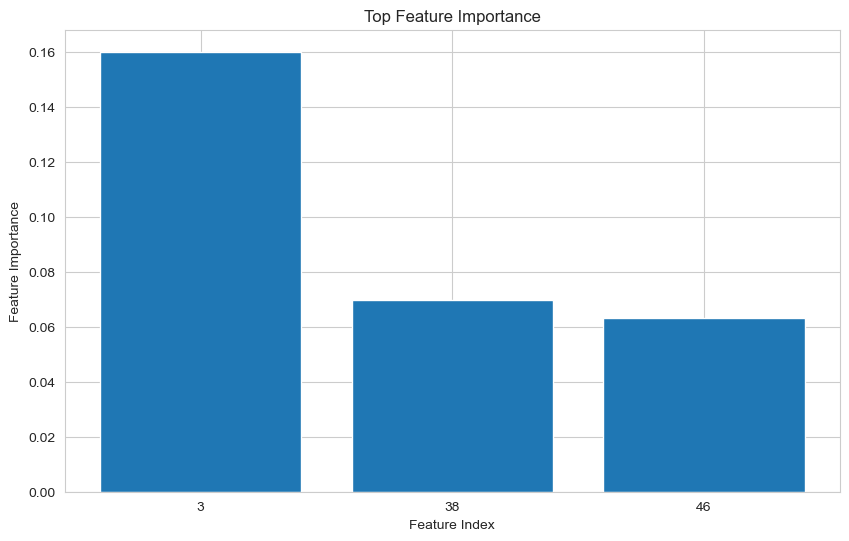

In [150]:

# Define the top features
top_features = [3, 38, 46]
feature_importance = [clf.feature_importances_[i-1] for i in top_features]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), feature_importance, tick_label=top_features)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance')
plt.show()


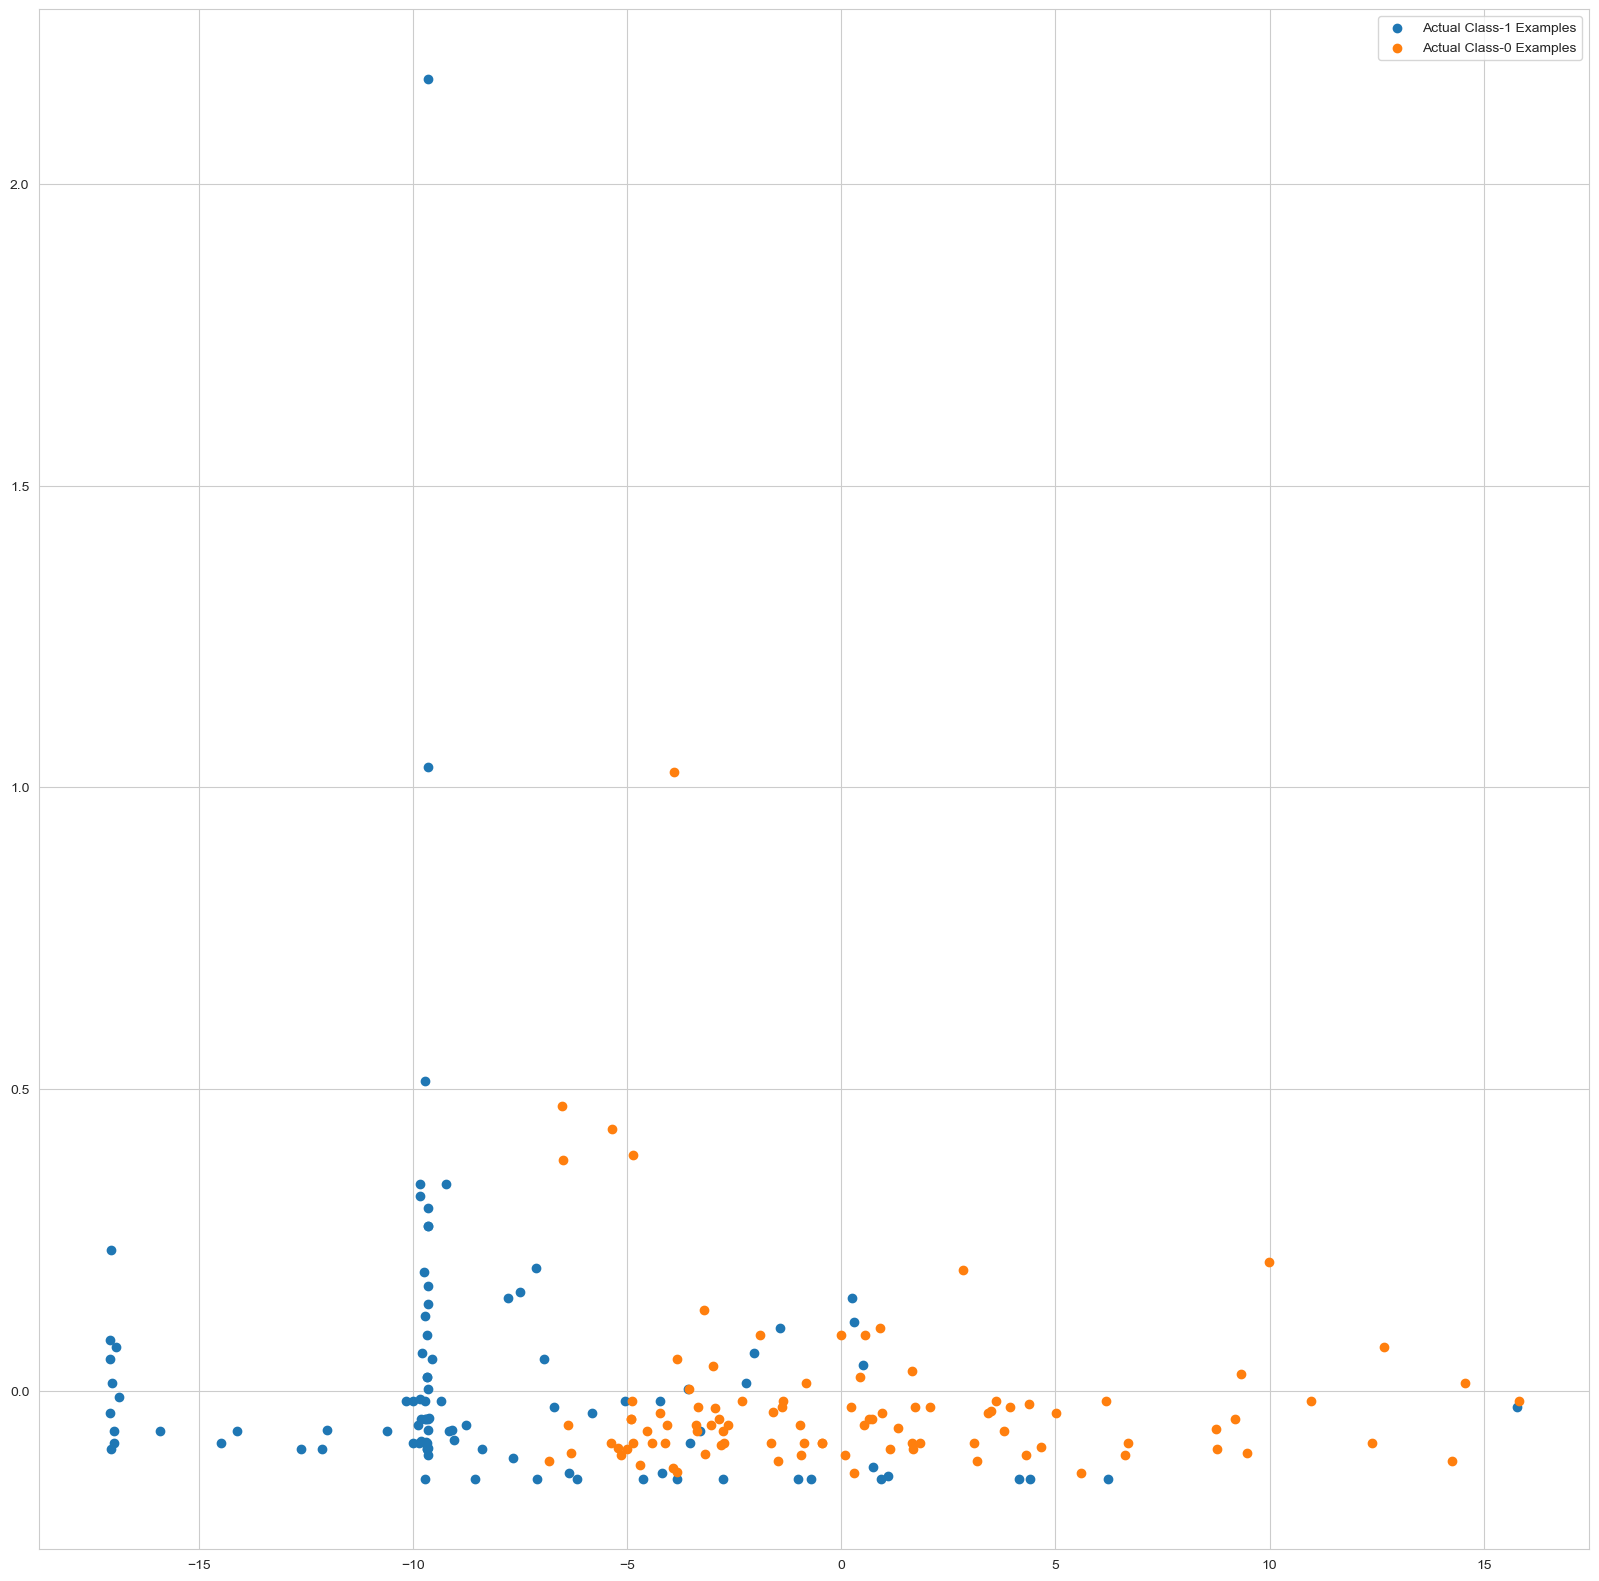

In [151]:
# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#In conclusion, based on the performance evaluation on oversampled data,the XGBoost model, especially with random oversampling and 
#stratified k-fold cross-validation emerges as the top-performing model.when considering all models,
#theLogistic Regression with L1 Regularization demonstrated comparable performance as well.